In [1]:
import sys
sys.path.append('..')

In [2]:
from data_aquisition import twitter_data
import datetime as dt
import pandas as pd
import seaborn as sns
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_rows = 10000
pd.set_option('display.max_colwidth', 150)
pd.options.display.max_columns = 10000

In [4]:
start_date = dt.date(year=2021, month=3, day=21)
end_date = dt.date(year=2021, month=3, day=24)

In [8]:
# test_df = twitter_data.generate_df(['DLPN'], start_date, None)
# Parquet isn't working with nested features
# test_df = pd.read_parquet('DLPN_2021_3_19_to_2021_3_24.parquet')
# Reading from pickle file
# test_df = pd.read_pickle('DLPN_2021_03_20_to_2021_03_28.pkl')
# Correct pickle file
test_df = pd.read_pickle('../data_aquisition/twitter_raw_data/clean_data/DLPN_2021_03_21_to_2021_03_30.pkl')

In [9]:
test_df.index.min()

Timestamp('2021-03-21 22:59:54+0000', tz='UTC')

In [12]:
test_df.index.max()

Timestamp('2021-03-30 01:31:56+0000', tz='UTC')

In [13]:
test_df.head()

id               id_str  \
created_at                                                            
2021-03-30 01:31:56+00:00  1376708742553726976  1376708742553726976   
2021-03-30 01:28:14+00:00  1376707809845243905  1376707809845243905   
2021-03-30 01:28:04+00:00  1376707766698434562  1376707766698434562   
2021-03-30 01:24:23+00:00  1376706839480573961  1376706839480573961   
2021-03-30 01:22:40+00:00  1376706408893267973  1376706408893267973   

                                                              text  truncated  \
created_at                                                                      
2021-03-30 01:31:56+00:00  RT @TraderJ95886811: $PSWW big money...      False   
2021-03-30 01:28:14+00:00  RT @StocksToTrade: Another amazing c...      False   
2021-03-30 01:28:04+00:00  RT @timothysykes: Retweet/favorite t...      False   
2021-03-30 01:24:23+00:00  RT @dtradehunter: $ZOM 🚀🚀🚀\nEventual...      False   
2021-03-30 01:22:40+00:00  What is #BACKSIDE_script? It is an a...       True   

                                                            source  \
created_at                                                           
2021-03-30 01:31:56+00:00  <a href="https://mobile.twitter.com"...   
2021-03-30 01:28:14+00:00  <a href="http://twitter.com/download...   
2021-03-30 01:28:04+00:00  <a href="http://twitter.com/download...   
2021-03-30 01:24:23+00:00  <a href="http://twitter.com/download...   
2021-03-30 01:22:40+00:00  <a href="http://twitter.com/download...   

                           in_reply_to_status_id in_reply_to_status_id_str  \
created_at                                                                   
2021-03-30 01:31:56+00:00                    NaN                      None   
2021-03-30 01:28:14+00:00                    NaN                      None   
2021-03-30 01:28:04+00:00                    NaN                      None   
2021-03-30 01:24:23+00:00                    NaN                      None   
2021-03-30 01:22:40+00:00                    NaN                      None   

                           in_reply_to_user_id in_reply_to_user_id_str  \
created_at                                                               
2021-03-30 01:31:56+00:00                  NaN                    None   
2021-03-30 01:28:14+00:00                  NaN                    None   
2021-03-30 01:28:04+00:00                  NaN                    None   
2021-03-30 01:24:23+00:00                  NaN                    None   
2021-03-30 01:22:40+00:00                  NaN                    None   

                          in_reply_to_screen_name   geo coordinates  place  \
created_at                                                                   
2021-03-30 01:31:56+00:00                    None  None        None    NaN   
2021-03-30 01:28:14+00:00                    None  None        None    NaN   
2021-03-30 01:28:04+00:00                    None  None        None    NaN   
2021-03-30 01:24:23+00:00                    None  None        None    NaN   
2021-03-30 01:22:40+00:00                    None  None        None    NaN   

                          contributors  is_quote_status  quoted_status_id  \
created_at                                                                  
2021-03-30 01:31:56+00:00         None             True      1.376601e+18   
2021-03-30 01:28:14+00:00         None            False               NaN   
2021-03-30 01:28:04+00:00         None            False               NaN   
2021-03-30 01:24:23+00:00         None            False               NaN   
2021-03-30 01:22:40+00:00         None            False               NaN   

                          quoted_status_id_str  retweet_count  favorite_count  \
created_at                                                                      
2021-03-30 01:31:56+00:00  1376600771593113603              2               0   
2021-03-30 01:28:14+00:00                  NaN             19               0   
2021-03-30

In [14]:
print(test_df.shape)

(9881, 320)


In [15]:
test_df['stock'].head()

created_at
2021-03-30 01:31:56+00:00    DLPN
2021-03-30 01:28:14+00:00    DLPN
2021-03-30 01:28:04+00:00    DLPN
2021-03-30 01:24:23+00:00    DLPN
2021-03-30 01:22:40+00:00    DLPN
Name: stock, dtype: object

In [7]:
# Filter to ints and bool
test_df = test_df.select_dtypes(include=['float64', 'int64', 'bool'])

In [ ]:
test_df.dtypes

In [ ]:
# Drop nulls
test_df.dropna(inplace=True)

In [ ]:
# First look at retweets
plt.figure(figsize=(30,10))
sns.scatterplot(data=test_df, x=test_df.index, y="retweet_count")

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
sns.scatterplot(data=test_df, x=test_df.index, y="user.followers_count", s=120)
ax.set_xlim('2021-03-20','2021-03-28')
ax.set_title("user.followers_count",fontsize=20)
ax.set_xlabel("Time",fontsize=20)
ax.set_ylabel("user.followers_count",fontsize=20)
ax.tick_params(labelsize=20)
fig.show()

In [8]:
# Functionizing this
def plot_vs_time(col, start_date, end_date):
    fig, ax = plt.subplots(figsize=(30,10))
    sns.scatterplot(data=test_df, x=test_df.index, y=col, s=120)
    ax.set_xlim(start_date, end_date)
    ax.set_title(col,fontsize=20)
    ax.set_xlabel("Time",fontsize=20)
    ax.set_ylabel(col,fontsize=20)
    ax.tick_params(labelsize=20)
    fig.show()

In [9]:
test_df_num = test_df.select_dtypes(include=['float64', 'int64'])

In [ ]:
for col in test_df_num.columns:
    plot_vs_time(col, '2021-03-20', '2021-03-28')

# Combining with price data

In [16]:
import yfinance as yf

In [20]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        #tickers = "XSPA GNUS NKLA IBIO GME"
        tickers = "DLPN",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        #period = "5d",
        start = "2021-03-21",
        end = "2021-03-28",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [21]:
data.head()

Open  High   Low  Close  Volume
Datetime                                                  
2021-03-22 08:00:00-04:00  5.69  5.70  5.69   5.69       0
2021-03-22 08:03:00-04:00  5.69  5.69  5.69   5.69       0
2021-03-22 08:05:00-04:00  5.70  5.70  5.70   5.70       0
2021-03-22 08:14:00-04:00  5.70  5.70  5.70   5.70       0
2021-03-22 08:19:00-04:00  5.70  5.70  5.70   5.70       0

In [13]:
# Twitter data before tz convert
test_df.sort_index().head()

favorite_count  favorited                   id  \
created_at                                                                  
2021-03-20 18:30:27+00:00               6      False  1373341180516315136   
2021-03-20 18:31:41+00:00               0      False  1373341491326816256   
2021-03-20 18:37:10+00:00               0      False  1373342870560776195   
2021-03-20 18:44:42+00:00               0      False  1373344767396827136   
2021-03-20 18:48:05+00:00               0      False  1373345618614226951   

                           in_reply_to_status_id  in_reply_to_user_id  \
created_at                                                              
2021-03-20 18:30:27+00:00           1.373341e+18         1.296950e+18   
2021-03-20 18:31:41+00:00           1.373340e+18         2.499229e+09   
2021-03-20 18:37:10+00:00                    NaN                  NaN   
2021-03-20 18:44:42+00:00                    NaN                  NaN   
2021-03-20 18:48:05+00:00                    NaN                  NaN   

                           is_quote_status  quoted_status.contributors  \
created_at                                                               
2021-03-20 18:30:27+00:00            False                         NaN   
2021-03-20 18:31:41+00:00            False                         NaN   
2021-03-20 18:37:10+00:00            False                         NaN   
2021-03-20 18:44:42+00:00            False                         NaN   
2021-03-20 18:48:05+00:00            False                         NaN   

                           quoted_status.coordinates  \
created_at                                             
2021-03-20 18:30:27+00:00                        NaN   
2021-03-20 18:31:41+00:00                        NaN   
2021-03-20 18:37:10+00:00                        NaN   
2021-03-20 18:44:42+00:00                        NaN   
2021-03-20 18:48:05+00:00                        NaN   

                           quoted_status.favorite_count  quoted_status.geo  \
created_at                                                                   
2021-03-20 18:30:27+00:00                           NaN                NaN   
2021-03-20 18:31:41+00:00                           NaN                NaN   
2021-03-20 18:37:10+00:00                           NaN                NaN   
2021-03-20 18:44:42+00:00                           NaN                NaN   
2021-03-20 18:48:05+00:00                           NaN                NaN   

                           quoted_status.id  \
created_at                                    
2021-03-20 18:30:27+00:00               NaN   
2021-03-20 18:31:41+00:00               NaN   
2021-03-20 18:37:10+00:00               NaN   
2021-03-20 18:44:42+00:00               NaN   
2021-03-20 18:48:05+00:00               NaN   

                           quoted_status.in_reply_to_status_id  \
created_at                                                       
2021-03-20 18:30:27+00:00                                  NaN   
2021-03-20 18:31:41+00:00                                  NaN   
2021-03-20 18:37:10+00:00                                  NaN   
2021-03-20 18:44:42+00:00                                  NaN   
2021-03-20 18:48:05+00:00                                  NaN   

                           quoted_status.in_reply_to_user_id  \
created_at                                                     
2021-03-20 18:30:27+00:00                                NaN   
2021-03-20 18:31:41+00:00                                NaN   
2021-03-20 18:37:10+00:00                                NaN   
2021-03-20 18:44:42+00:00                                NaN   
2021-03-20 18:48:05+00:00                                NaN   

                           quoted_status.place  \
created_at                                       
2021-03-20 18:30:27+00:00                  NaN   
2021-03-20 18:31:41+00:00                  NaN   
2021-03-20 18:37:10+00:00                  NaN   
2021-03-20 18:44:42+00:0

In [22]:
test_df['Datetime'] = test_df.index
twitter = test_df.set_index('Datetime')
twitter.sort_index(inplace=True)

In [23]:
import pytz
eastern = pytz.timezone('US/Eastern')
twitter.index = twitter.index.tz_convert(eastern)

In [24]:
twitter.head()

id               id_str  \
Datetime                                                              
2021-03-21 18:59:54-04:00  1373771375626784768  1373771375626784768   
2021-03-21 20:55:27-04:00  1373800458729320448  1373800458729320448   
2021-03-21 22:43:14-04:00  1373827582358122497  1373827582358122497   
2021-03-21 23:13:50-04:00  1373835281875488769  1373835281875488769   
2021-03-22 05:16:55-04:00  1373926656939724800  1373926656939724800   

                                                              text  truncated  \
Datetime                                                                        
2021-03-21 18:59:54-04:00  Entries &amp; exits Daily! \nDiscord...       True   
2021-03-21 20:55:27-04:00   @LEADER_TRADING $mict $atif $dlpn $spy      False   
2021-03-21 22:43:14-04:00  $DLPN when they report st end of Mar...       True   
2021-03-21 23:13:50-04:00  RT @SemcoRealEstate: $DLPN when they...      False   
2021-03-22 05:16:55-04:00  Entries &amp; exits Daily!! \nDiscor...       True   

                                                            source  \
Datetime                                                             
2021-03-21 18:59:54-04:00  <a href="http://twitter.com/download...   
2021-03-21 20:55:27-04:00  <a href="http://twitter.com/download...   
2021-03-21 22:43:14-04:00  <a href="http://twitter.com/download...   
2021-03-21 23:13:50-04:00  <a href="https://gambiste.com" rel="...   
2021-03-22 05:16:55-04:00  <a href="http://twitter.com/download...   

                           in_reply_to_status_id in_reply_to_status_id_str  \
Datetime                                                                     
2021-03-21 18:59:54-04:00                    NaN                      None   
2021-03-21 20:55:27-04:00           1.373797e+18       1373797075637448707   
2021-03-21 22:43:14-04:00                    NaN                      None   
2021-03-21 23:13:50-04:00                    NaN                      None   
2021-03-22 05:16:55-04:00                    NaN                      None   

                           in_reply_to_user_id in_reply_to_user_id_str  \
Datetime                                                                 
2021-03-21 18:59:54-04:00                  NaN                    None   
2021-03-21 20:55:27-04:00         1.263553e+18     1263552816452427780   
2021-03-21 22:43:14-04:00                  NaN                    None   
2021-03-21 23:13:50-04:00                  NaN                    None   
2021-03-22 05:16:55-04:00                  NaN                    None   

                          in_reply_to_screen_name   geo coordinates  place  \
Datetime                                                                     
2021-03-21 18:59:54-04:00                    None  None        None    NaN   
2021-03-21 20:55:27-04:00          LEADER_TRADING  None        None    NaN   
2021-03-21 22:43:14-04:00                    None  None        None    NaN   
2021-03-21 23:13:50-04:00                    None  None        None    NaN   
2021-03-22 05:16:55-04:00                    None  None        None    NaN   

                          contributors  is_quote_status  quoted_status_id  \
Datetime                                                                    
2021-03-21 18:59:54-04:00         None            False               NaN   
2021-03-21 20:55:27-04:00         None            False               NaN   
2021-03-21 22:43:14-04:00         None            False               NaN   
2021-03-21 23:13:50-04:00         None            False               NaN   
2021-03-22 05:16:55-04:00         None            False               NaN   

                          quoted_status_id_str  retweet_count  favorite_count  \
Datetime                                                                        
2021-03-21 18:59:54-04:00                  NaN              0               0   
2021-03-21 20:55:27-04:00                  NaN              0               0   
2021-03-21

In [25]:
data['Datetime'] = pd.to_datetime(data.index)
data = data.set_index('Datetime')
data.index = data.index.tz_convert(eastern)
data.head()

Open  High   Low  Close  Volume
Datetime                                                  
2021-03-22 08:00:00-04:00  5.69  5.70  5.69   5.69       0
2021-03-22 08:03:00-04:00  5.69  5.69  5.69   5.69       0
2021-03-22 08:05:00-04:00  5.70  5.70  5.70   5.70       0
2021-03-22 08:14:00-04:00  5.70  5.70  5.70   5.70       0
2021-03-22 08:19:00-04:00  5.70  5.70  5.70   5.70       0

In [26]:
twitter_stonks = pd.merge_asof(twitter, data, on="Datetime", direction="nearest")

In [27]:
twitter_stonks.head()

Datetime                   id               id_str  \
0 2021-03-21 18:59:54-04:00  1373771375626784768  1373771375626784768   
1 2021-03-21 20:55:27-04:00  1373800458729320448  1373800458729320448   
2 2021-03-21 22:43:14-04:00  1373827582358122497  1373827582358122497   
3 2021-03-21 23:13:50-04:00  1373835281875488769  1373835281875488769   
4 2021-03-22 05:16:55-04:00  1373926656939724800  1373926656939724800   

                                      text  truncated  \
0  Entries &amp; exits Daily! \nDiscord...       True   
1   @LEADER_TRADING $mict $atif $dlpn $spy      False   
2  $DLPN when they report st end of Mar...       True   
3  RT @SemcoRealEstate: $DLPN when they...      False   
4  Entries &amp; exits Daily!! \nDiscor...       True   

                                    source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download...                    NaN   
1  <a href="http://twitter.com/download...           1.373797e+18   
2  <a href="http://twitter.com/download...                    NaN   
3  <a href="https://gambiste.com" rel="...                    NaN   
4  <a href="http://twitter.com/download...                    NaN   

  in_reply_to_status_id_str  in_reply_to_user_id in_reply_to_user_id_str  \
0                      None                  NaN                    None   
1       1373797075637448707         1.263553e+18     1263552816452427780   
2                      None                  NaN                    None   
3                      None                  NaN                    None   
4                      None                  NaN                    None   

  in_reply_to_screen_name   geo coordinates  place contributors  \
0                    None  None        None    NaN         None   
1          LEADER_TRADING  None        None    NaN         None   
2                    None  None        None    NaN         None   
3                    None  None        None    NaN         None   
4                    None  None        None    NaN         None   

   is_quote_status  quoted_status_id quoted_status_id_str  retweet_count  \
0            False               NaN                  NaN              0   
1            False               NaN                  NaN              0   
2            False               NaN                  NaN              1   
3            False               NaN                  NaN              1   
4            False               NaN                  NaN              0   

   favorite_count  favorited  retweeted lang entities.hashtags  \
0               0      False      False   in                []   
1               0      False      False   in                []   
2               0      False      False   en                []   
3               0      False      False   en                []   
4               0      False      False   in                []   

                          entities.symbols  \
0  [{'text': 'APT', 'indices': [49, 53]...   
1  [{'text': 'mict', 'indices': [16, 21...   
2    [{'text': 'DLPN', 'indices': [0, 5]}]   
3  [{'text': 'DLPN', 'indices': [21, 26]}]   
4  [{'text': 'APT', 'indices': [73, 77]...   

                    entities.user_mentions  \
0                                       []   
1  [{'screen_name': 'LEADER_TRADING', '...   
2                                       []   
3  [{'screen_name': 'SemcoRealEstate', ...   
4                                       []   

                             entities.urls metadata.iso_language_code  \
0  [{'url': 'https://t.co/wq1SIDc5yP', ...                         in   
1                                       []                         in   
2  [{'url': 'https://t.co/1yKiPYI2jo', ...                         en   
3                                       []                         en   
4  [{'url': 'https://t.co/vJoicseAPO', ...                         in   

  metadata.result_type              user.id          user.id_str  \
0               recent  1353211811638751234  13

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Ana

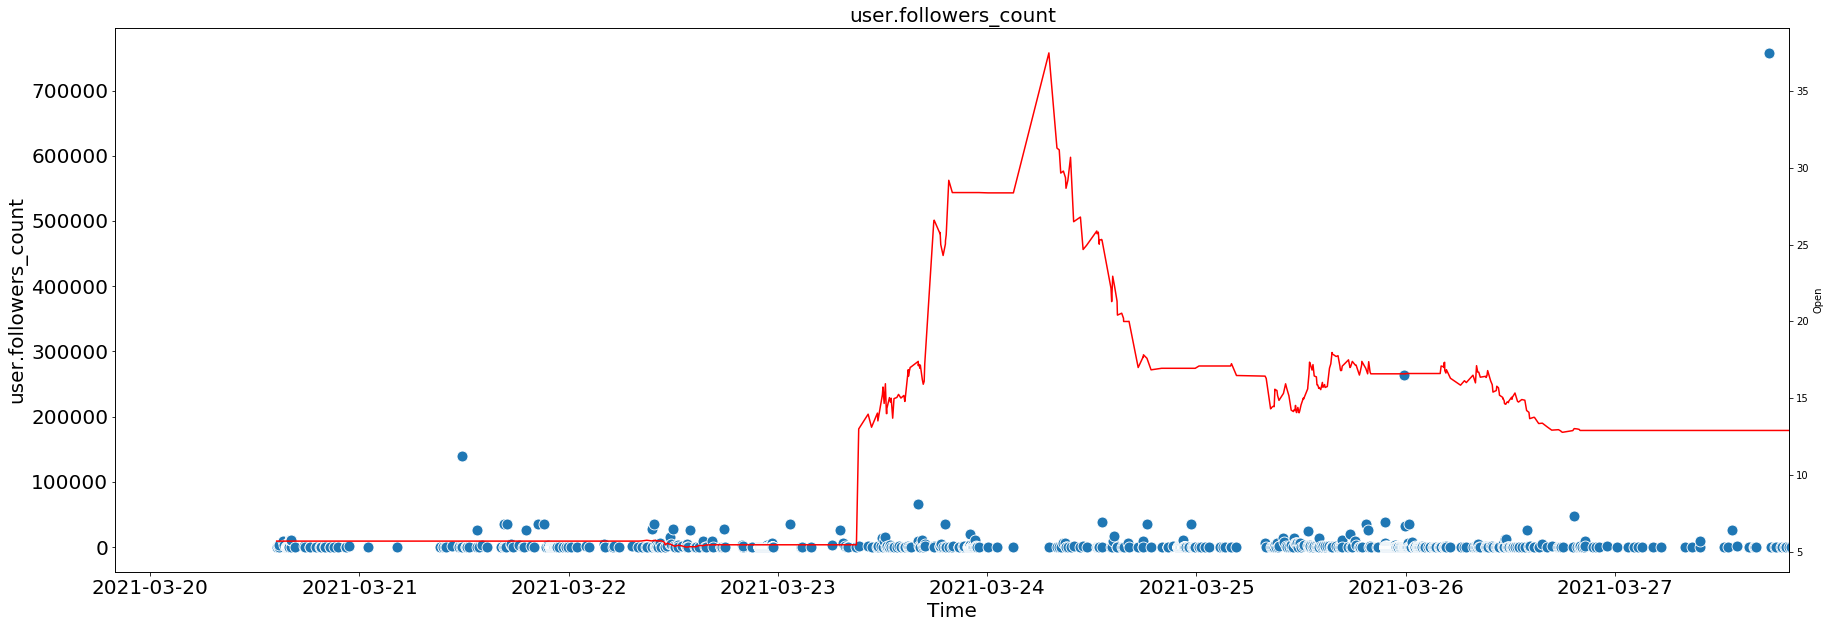

In [19]:
# First look at retweets
fig, ax1 = plt.subplots(figsize=(30,10))
ax1 = sns.scatterplot(data=twitter_stonks, x=twitter_stonks['Datetime'], y="user.followers_count", s=120)
ax1.set_xlim('2021-03-20','2021-03-28')
ax1.set_title("user.followers_count",fontsize=20)
ax1.set_xlabel("Time",fontsize=20)
ax1.set_ylabel("user.followers_count",fontsize=20)
ax1.tick_params(labelsize=20)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=twitter_stonks, x=twitter_stonks['Datetime'], y="Open", color='red')
fig.show()

In [28]:
# functionize plot
def plot_vs_price(df, col, start, end):
    fig, ax1 = plt.subplots(figsize=(30,10))
    ax1 = sns.scatterplot(data=twitter_stonks, x=df['Datetime'], y=col, s=120)
    ax1.set_xlim(start, end)
    ax1.set_title(col,fontsize=20)
    ax1.set_xlabel("Time",fontsize=20)
    ax1.set_ylabel(col,fontsize=20)
    ax1.tick_params(labelsize=20)
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(data=df, x=df['Datetime'], y="Open", color='red')
    ax2.set_ylabel("Price",fontsize=20)
    ax2.tick_params(labelsize=20)
    fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Ana

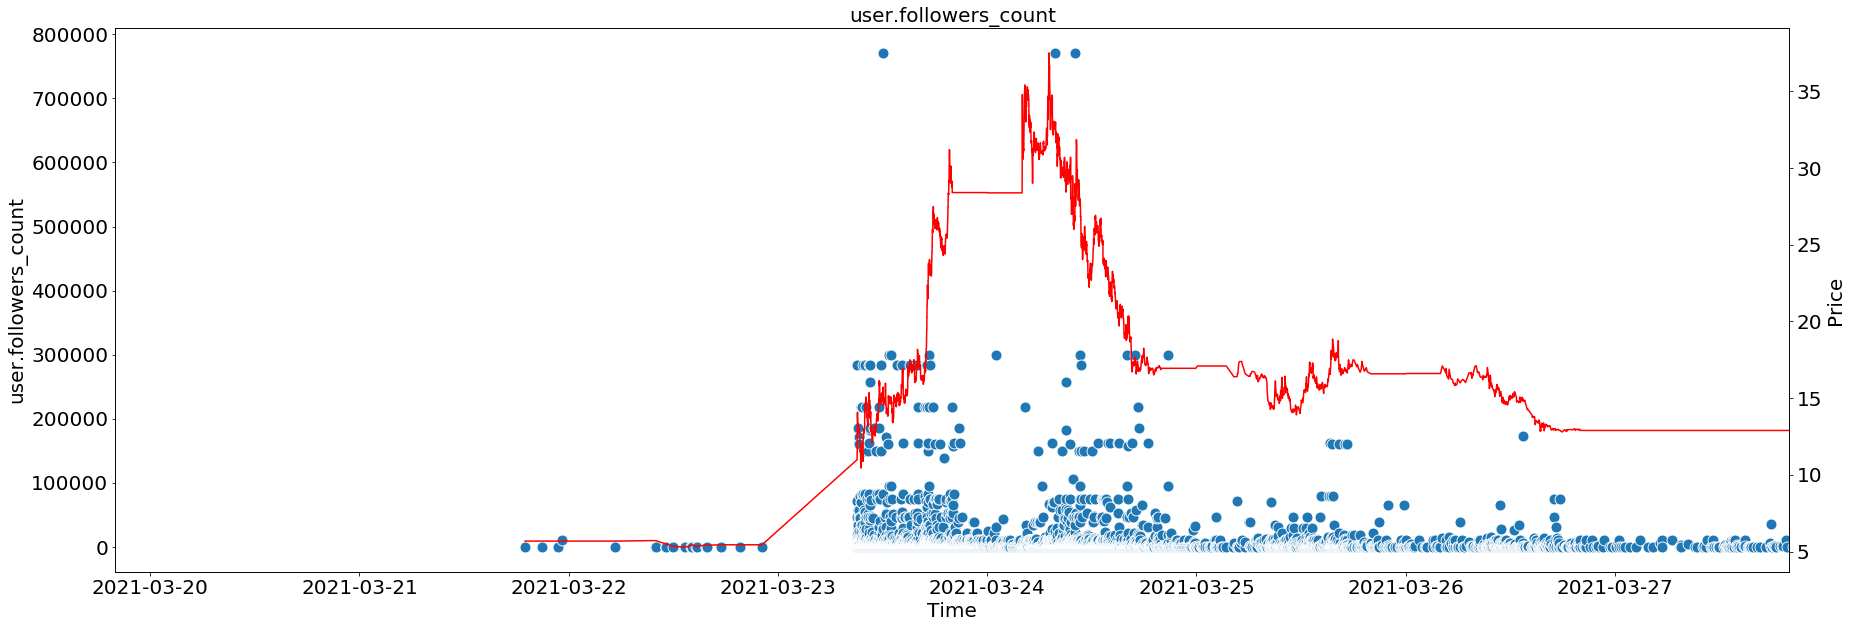

In [29]:
# Test function 
plot_vs_price(twitter_stonks, 'user.followers_count', '2021-03-20', '2021-03-28')

In [31]:
twitter_stonks_num = twitter_stonks.select_dtypes(include=['float64', 'int64'])

In [23]:
twitter_stonks_num.dtypes

favorite_count                                                int64
id                                                            int64
in_reply_to_status_id                                       float64
in_reply_to_user_id                                         float64
quoted_status.contributors                                  float64
quoted_status.coordinates                                   float64
quoted_status.favorite_count                                float64
quoted_status.geo                                           float64
quoted_status.id                                            float64
quoted_status.in_reply_to_status_id                         float64
quoted_status.in_reply_to_user_id                           float64
quoted_status.place                                         float64
quoted_status.quoted_status_id                              float64
quoted_status.retweet_count                                 float64
quoted_status.user.favourites_count             

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Conve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

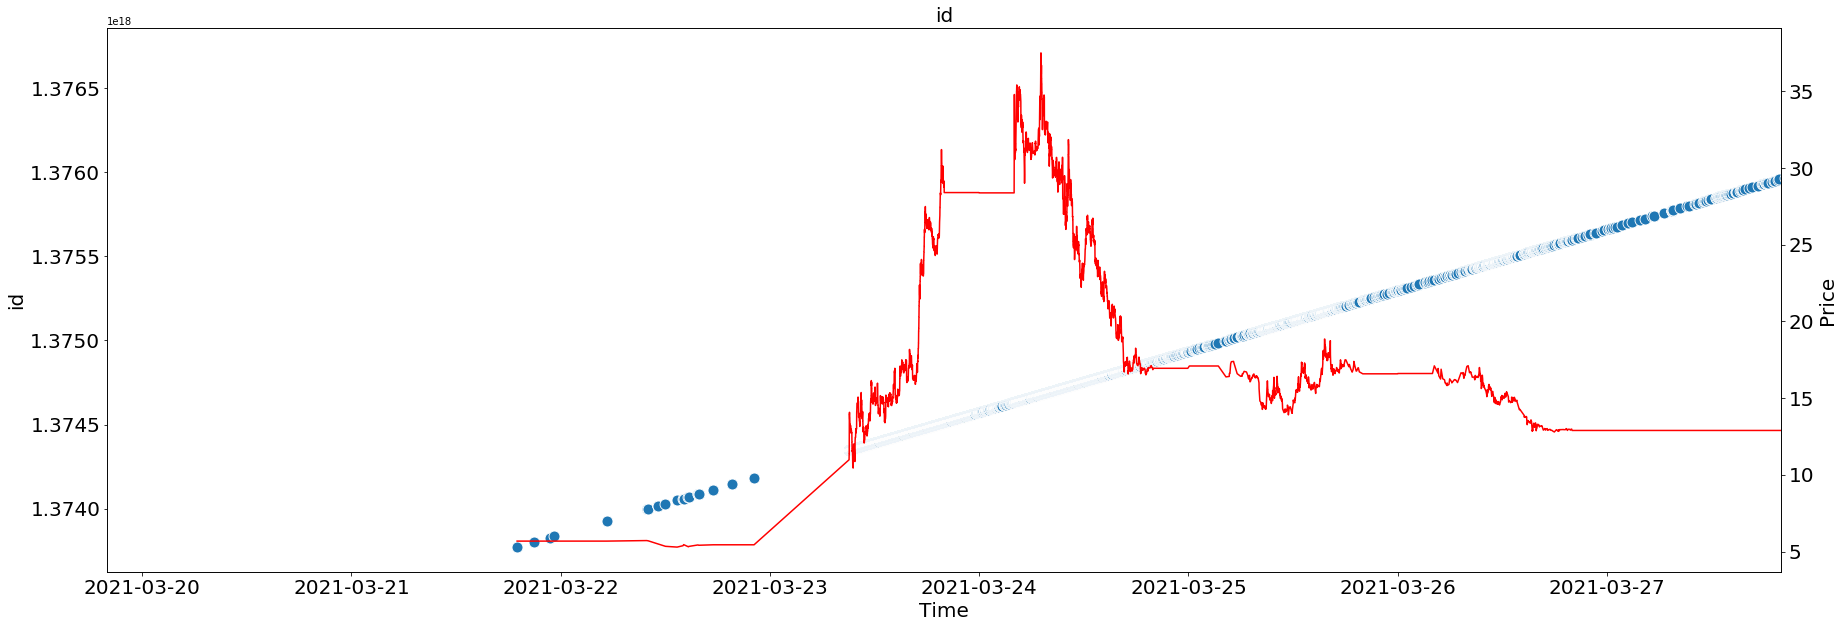

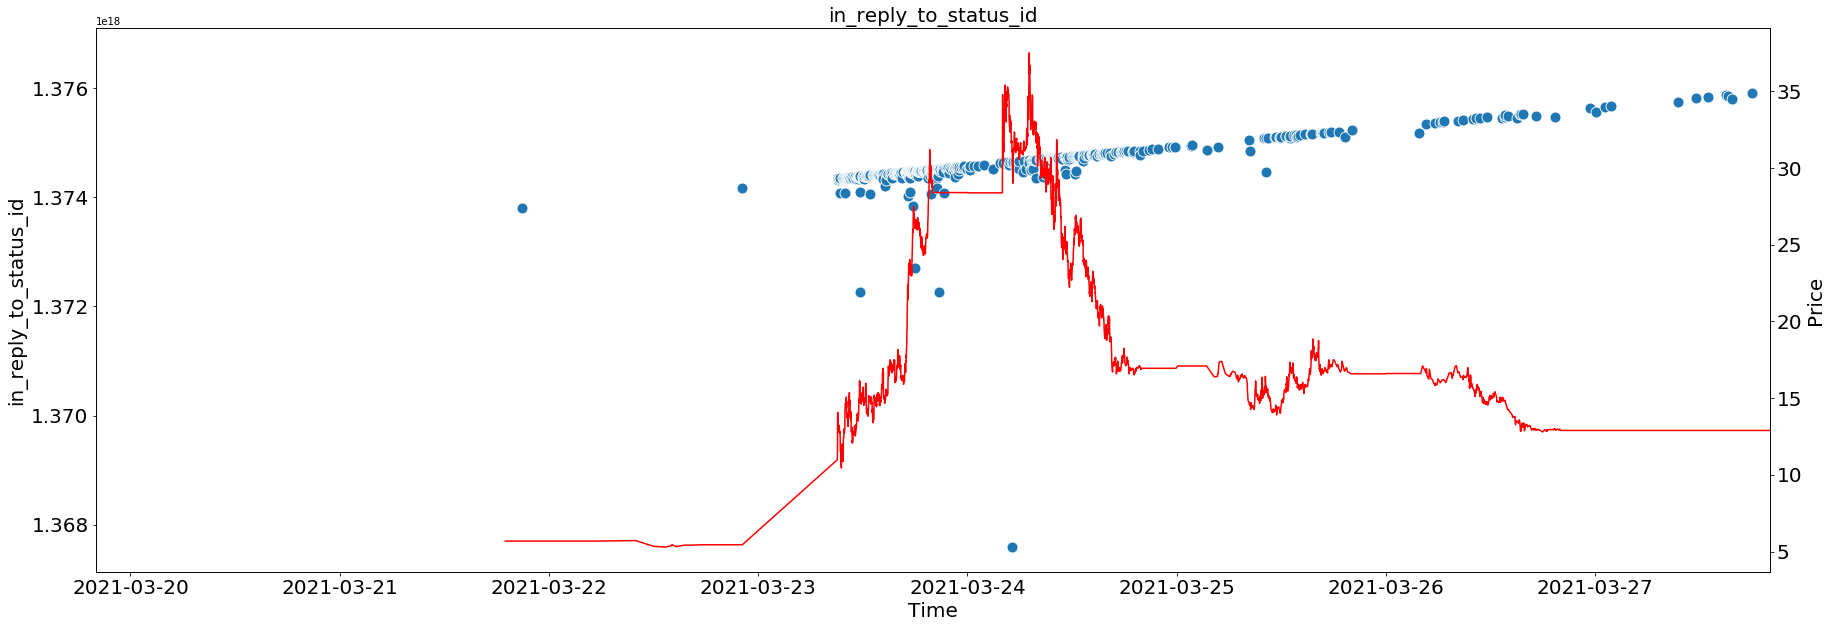

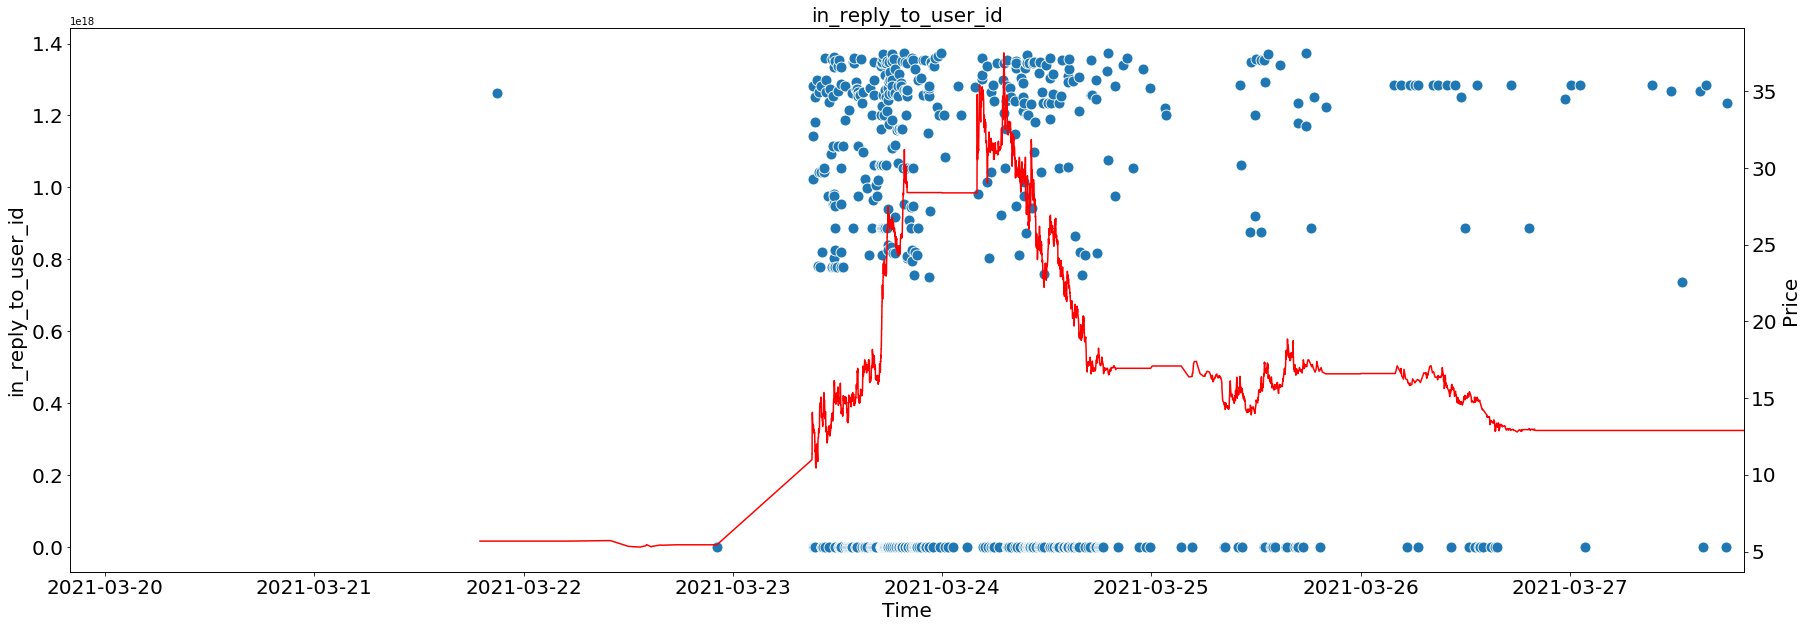

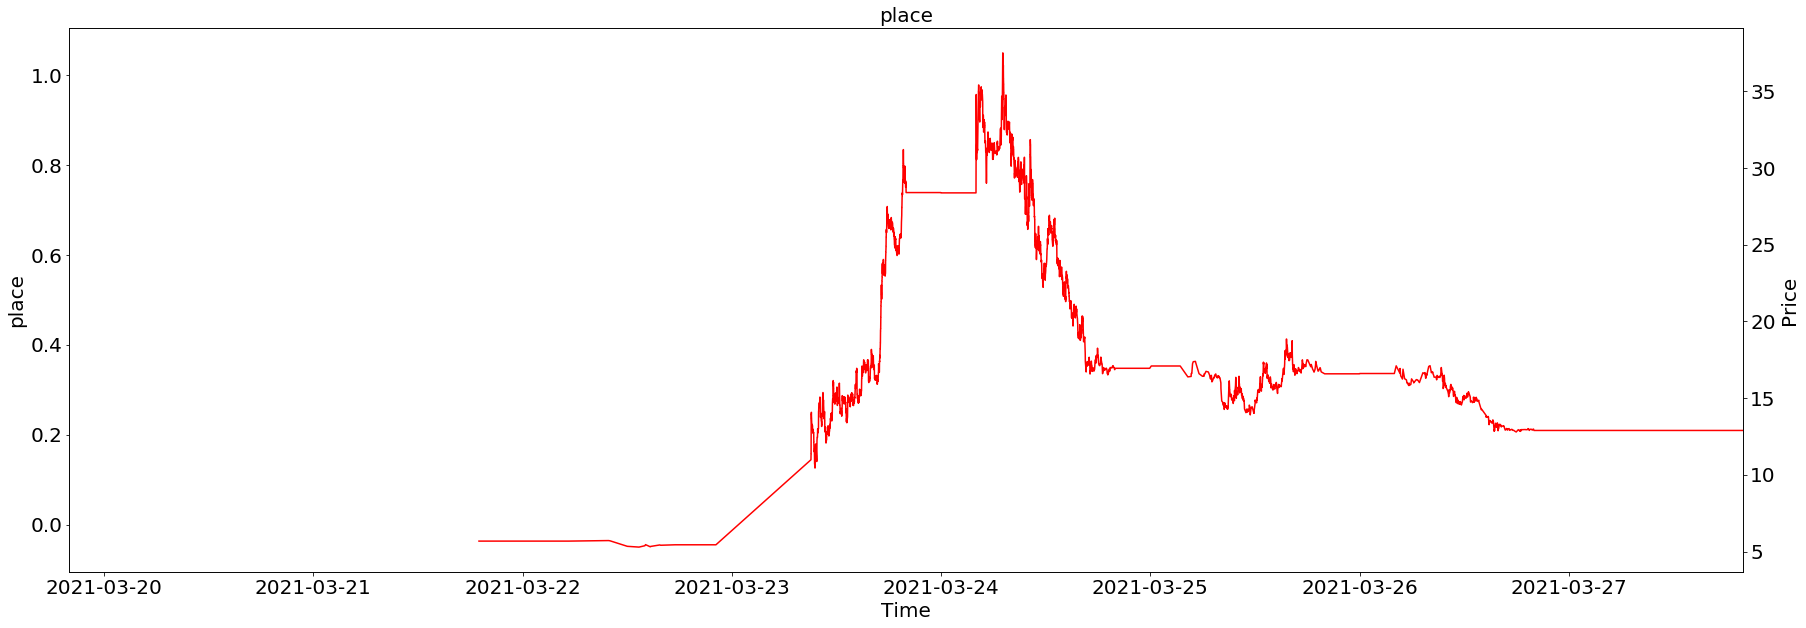

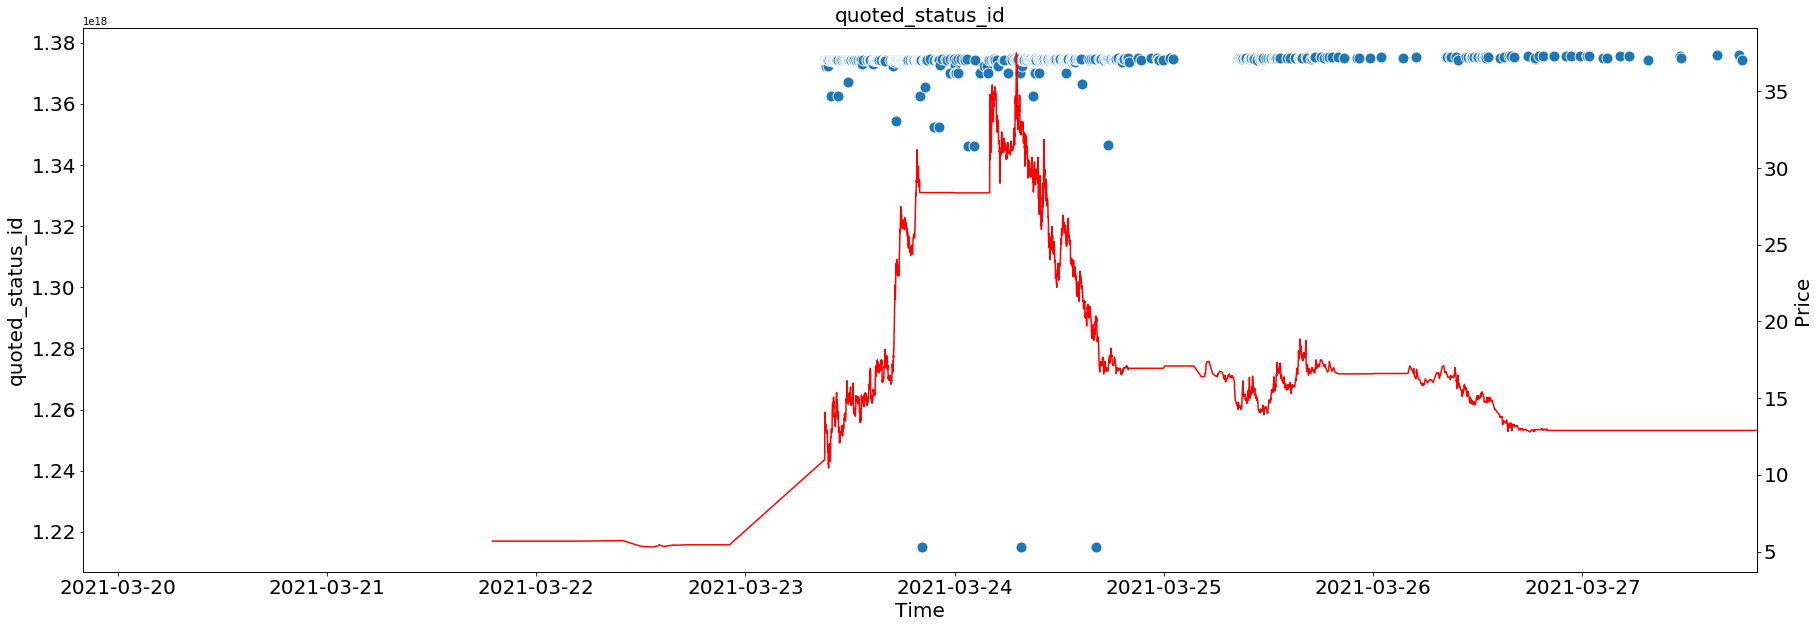

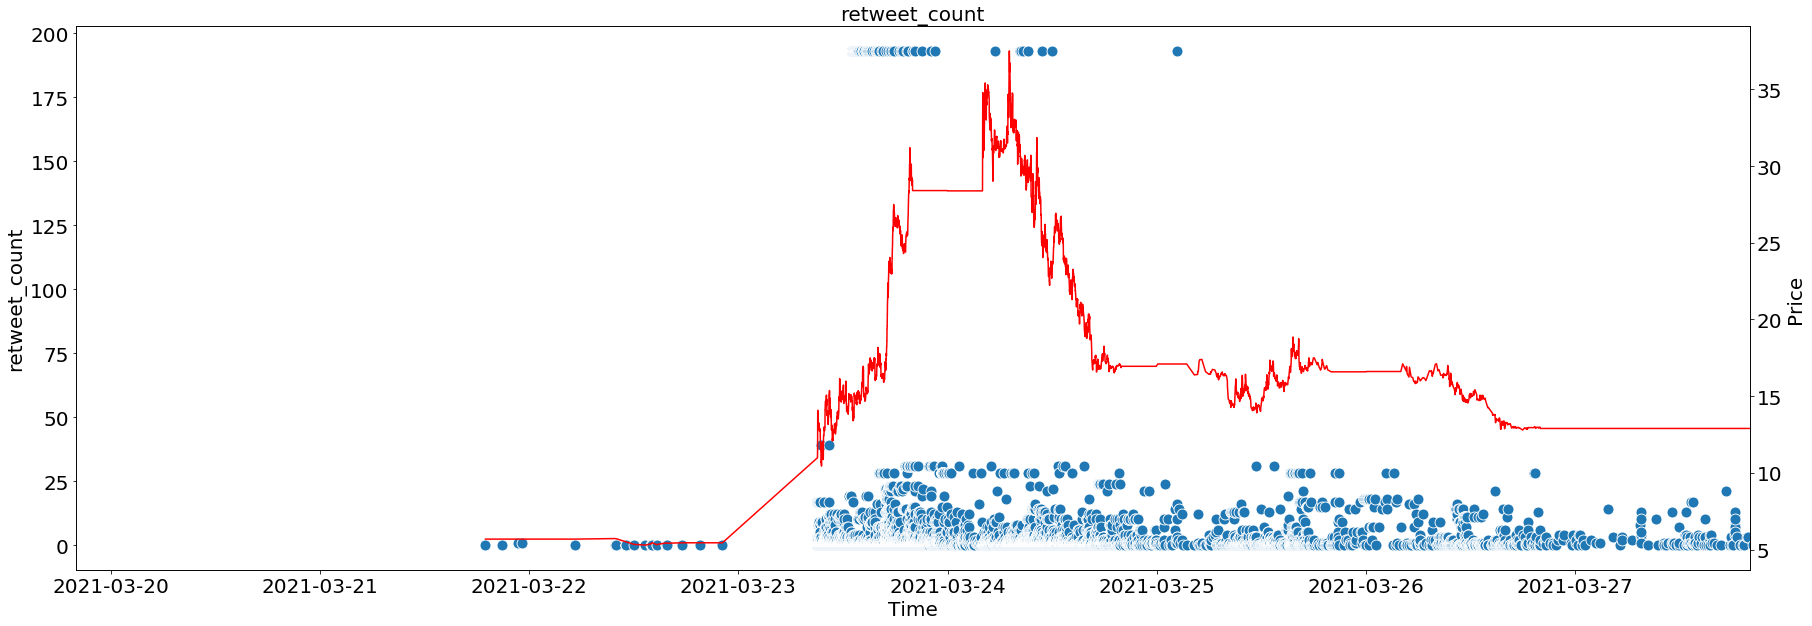

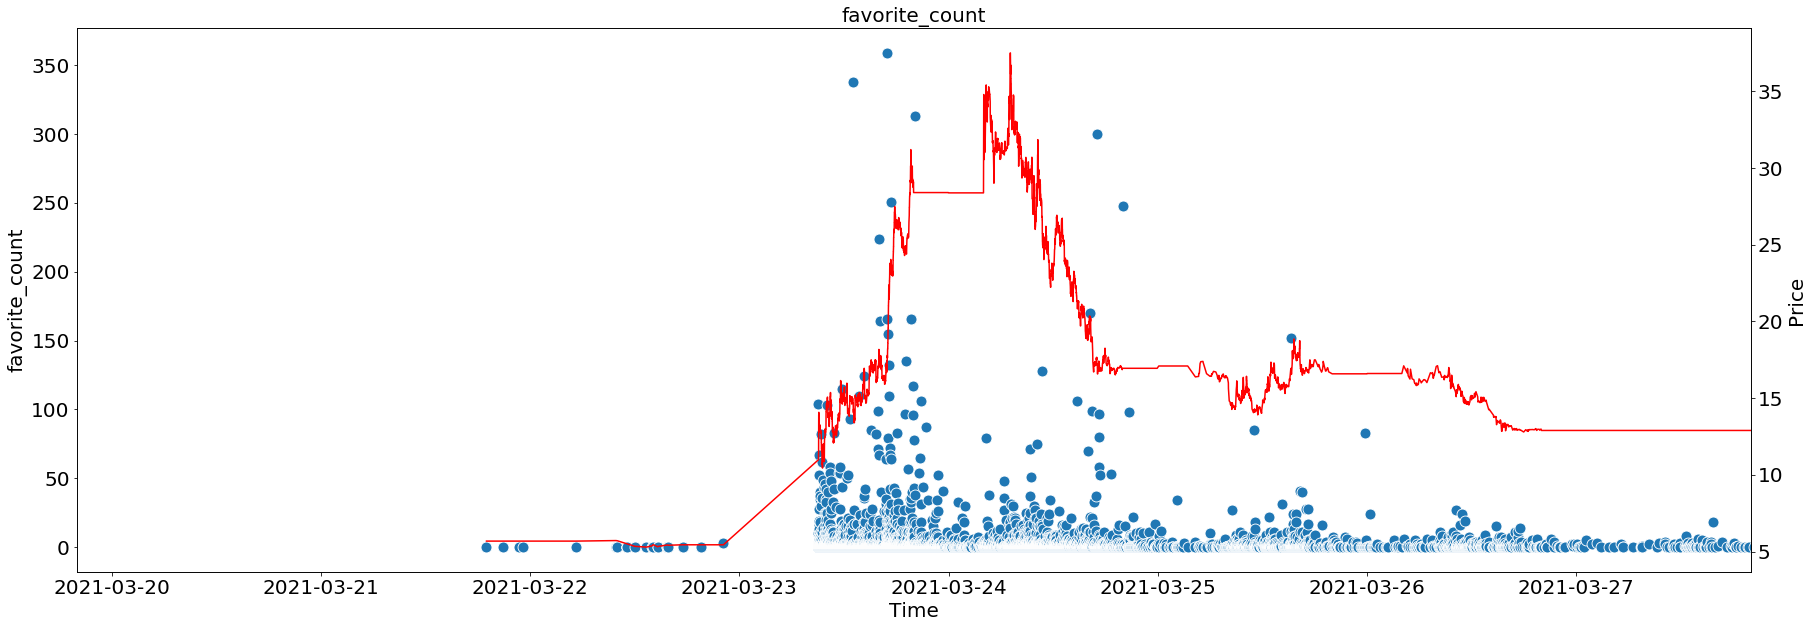

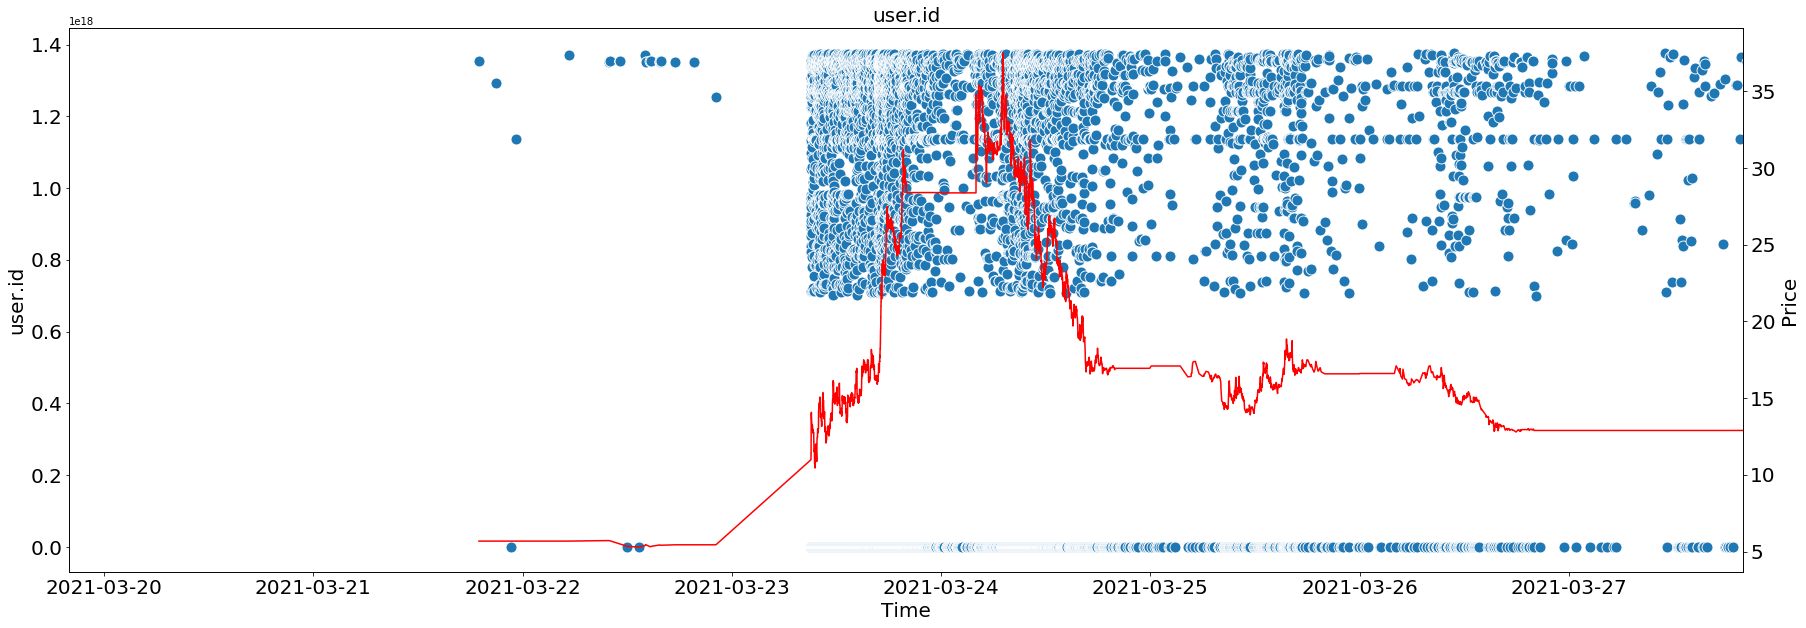

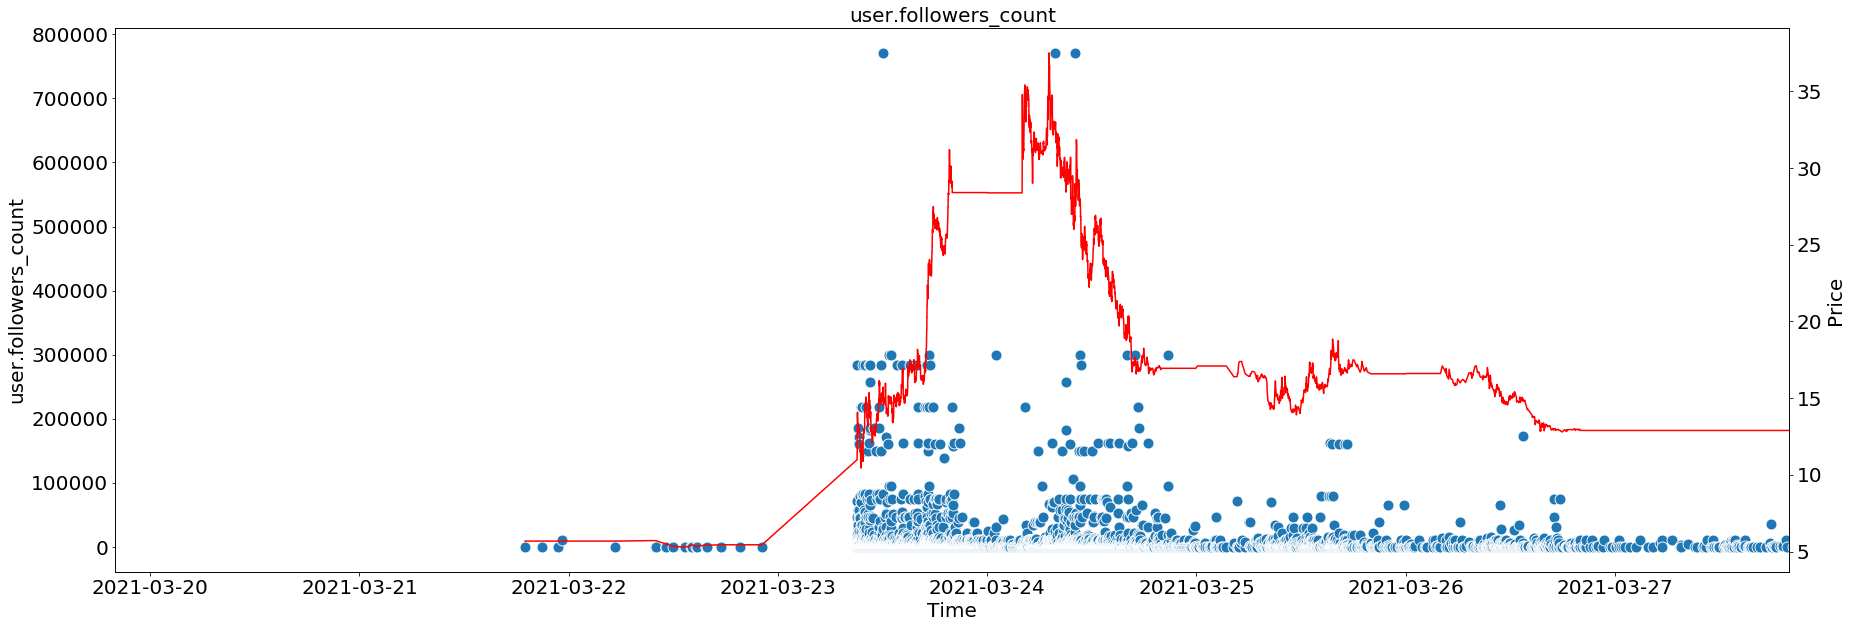

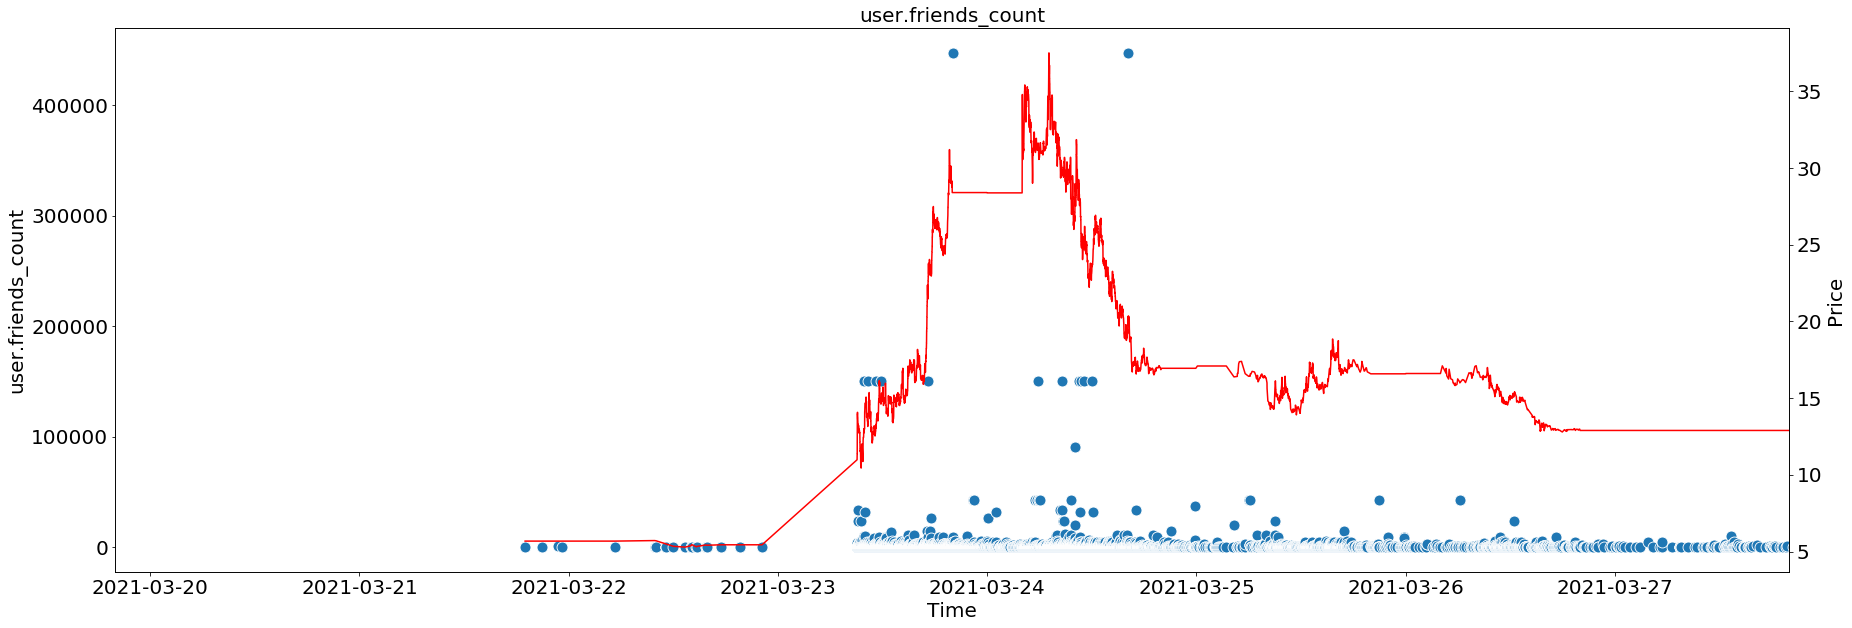

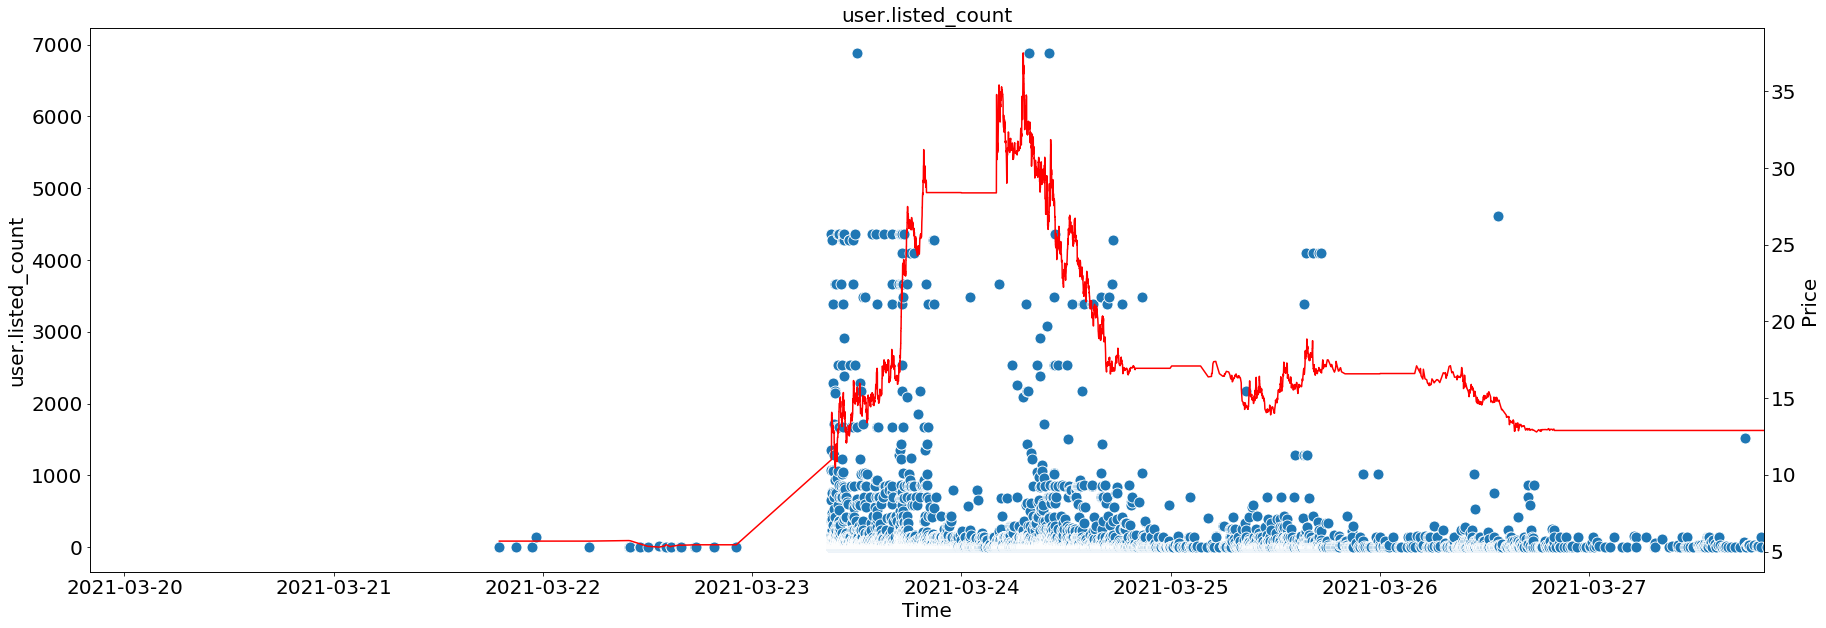

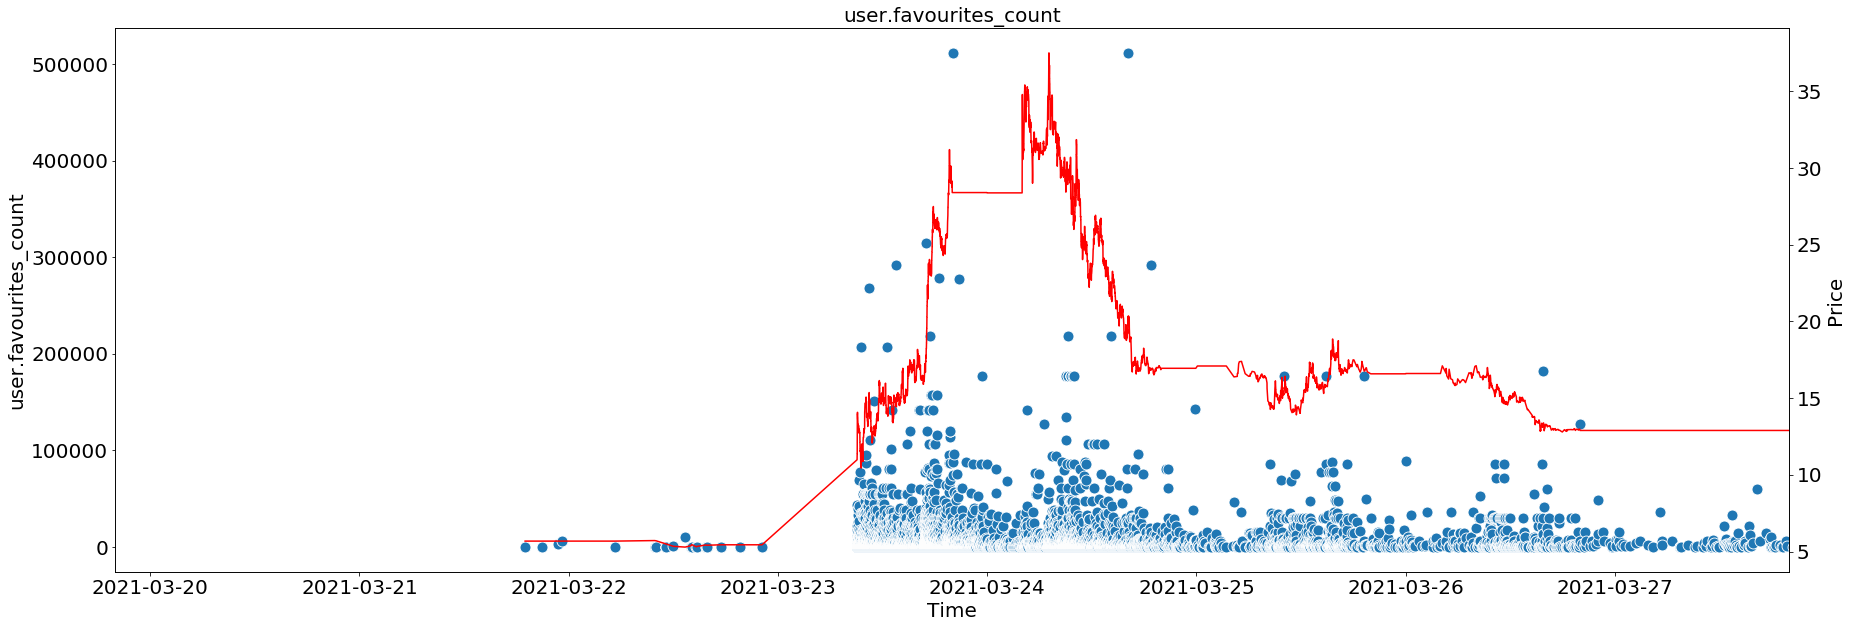

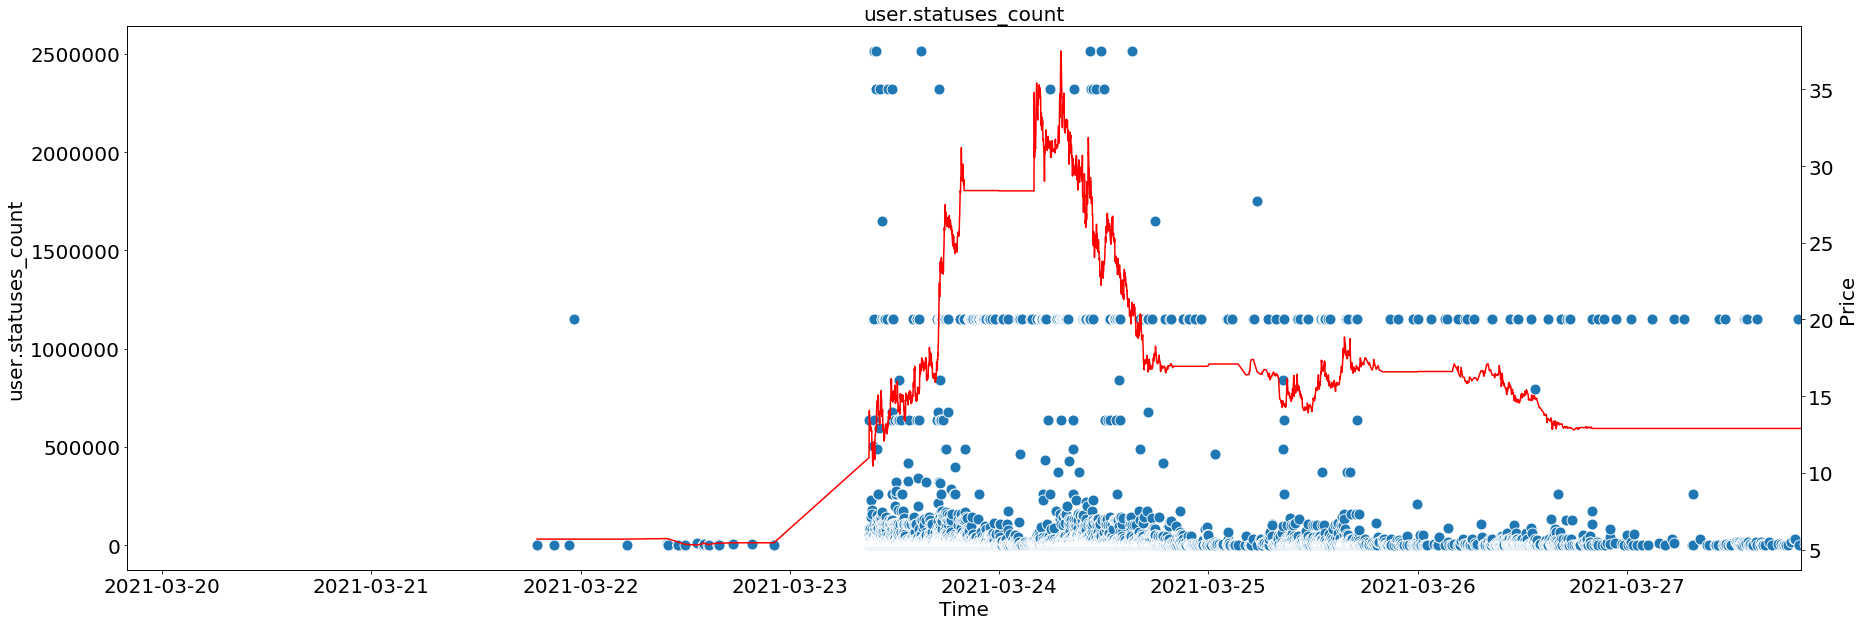

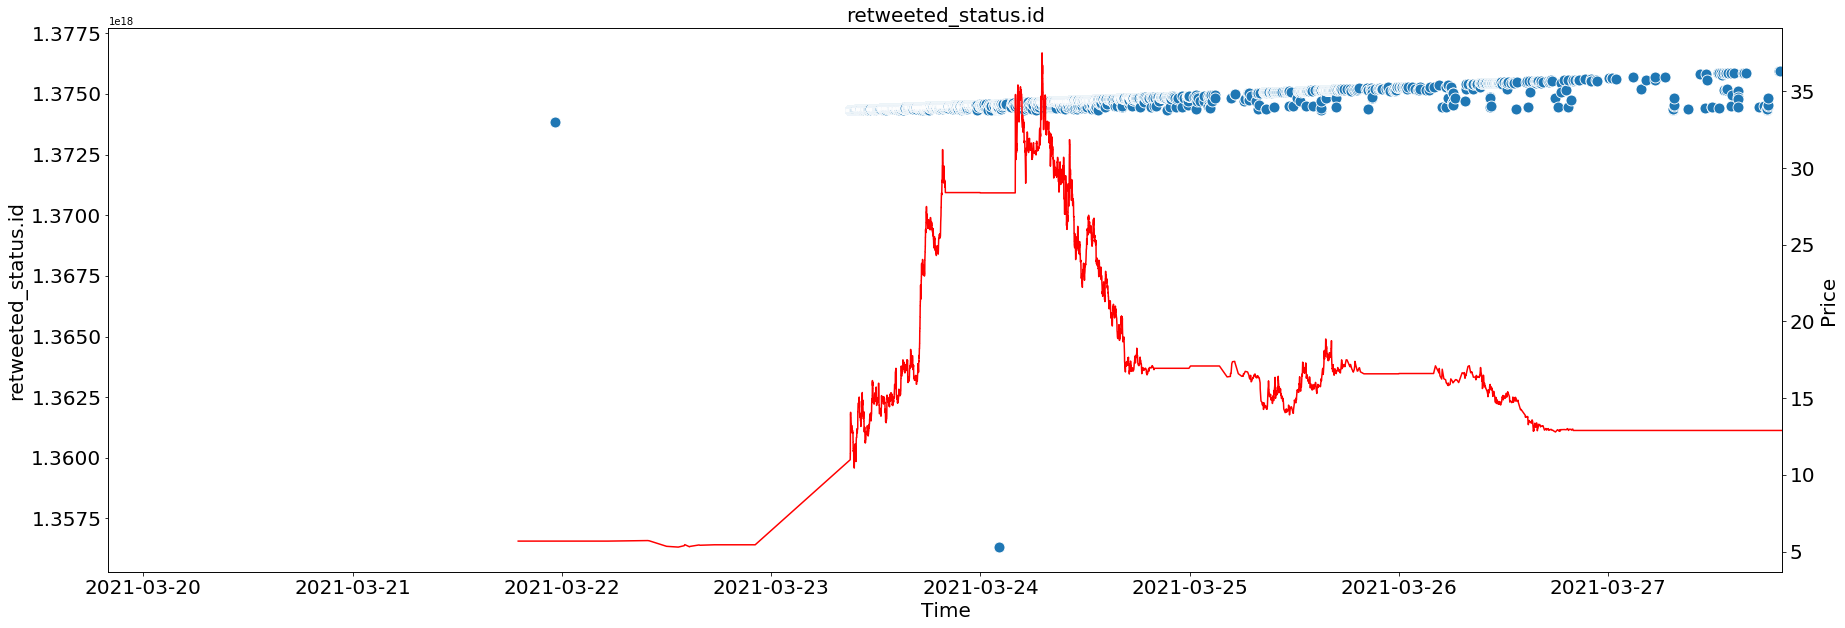

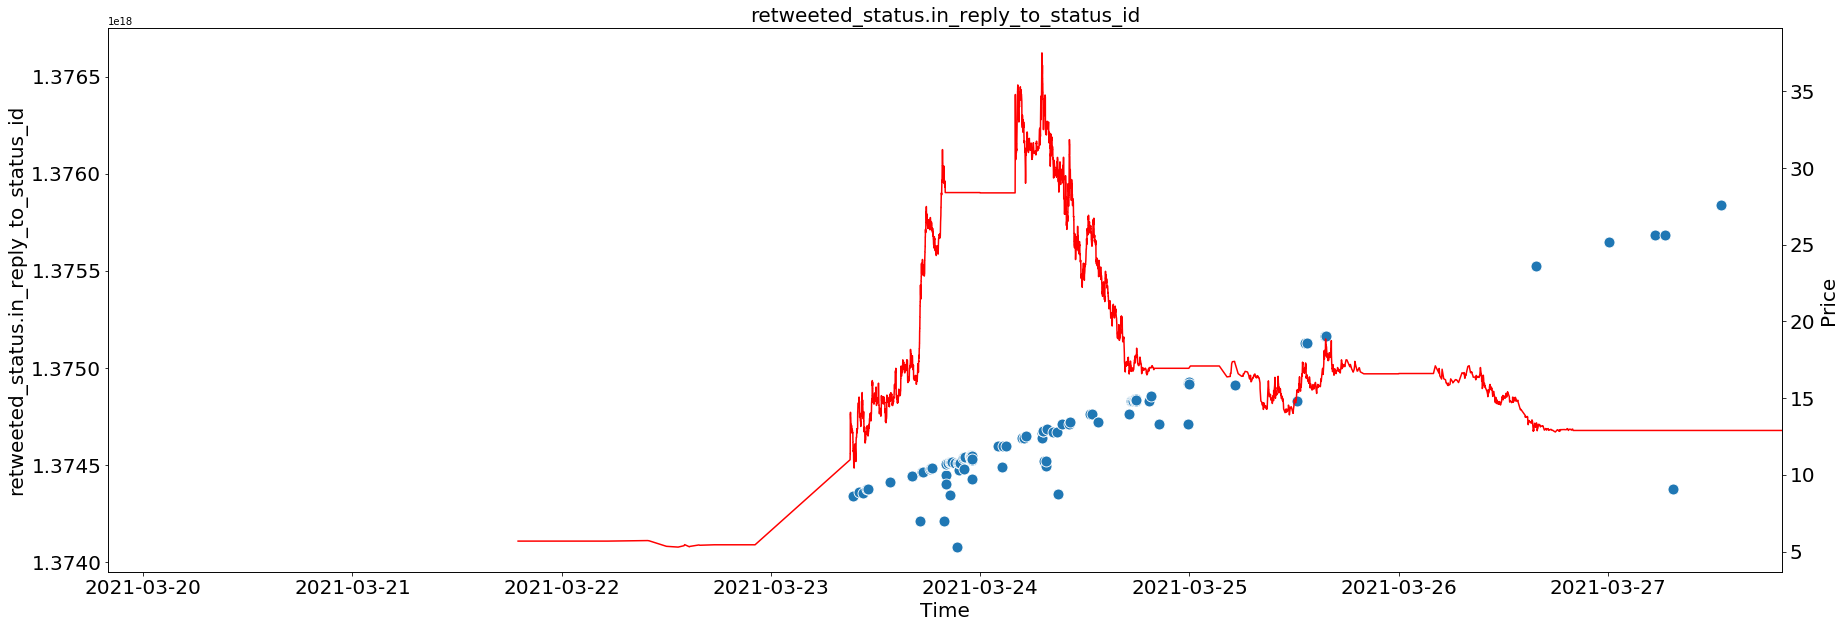

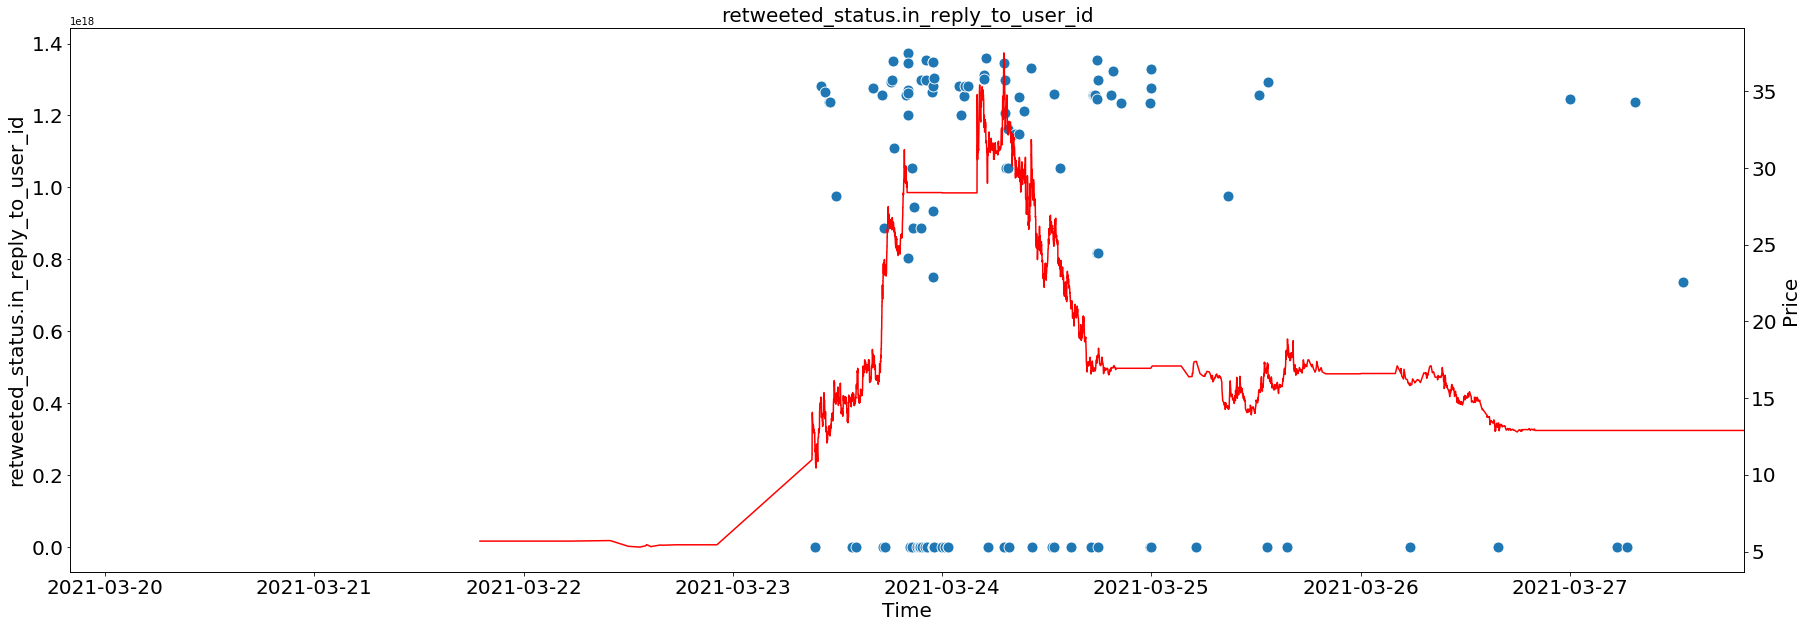

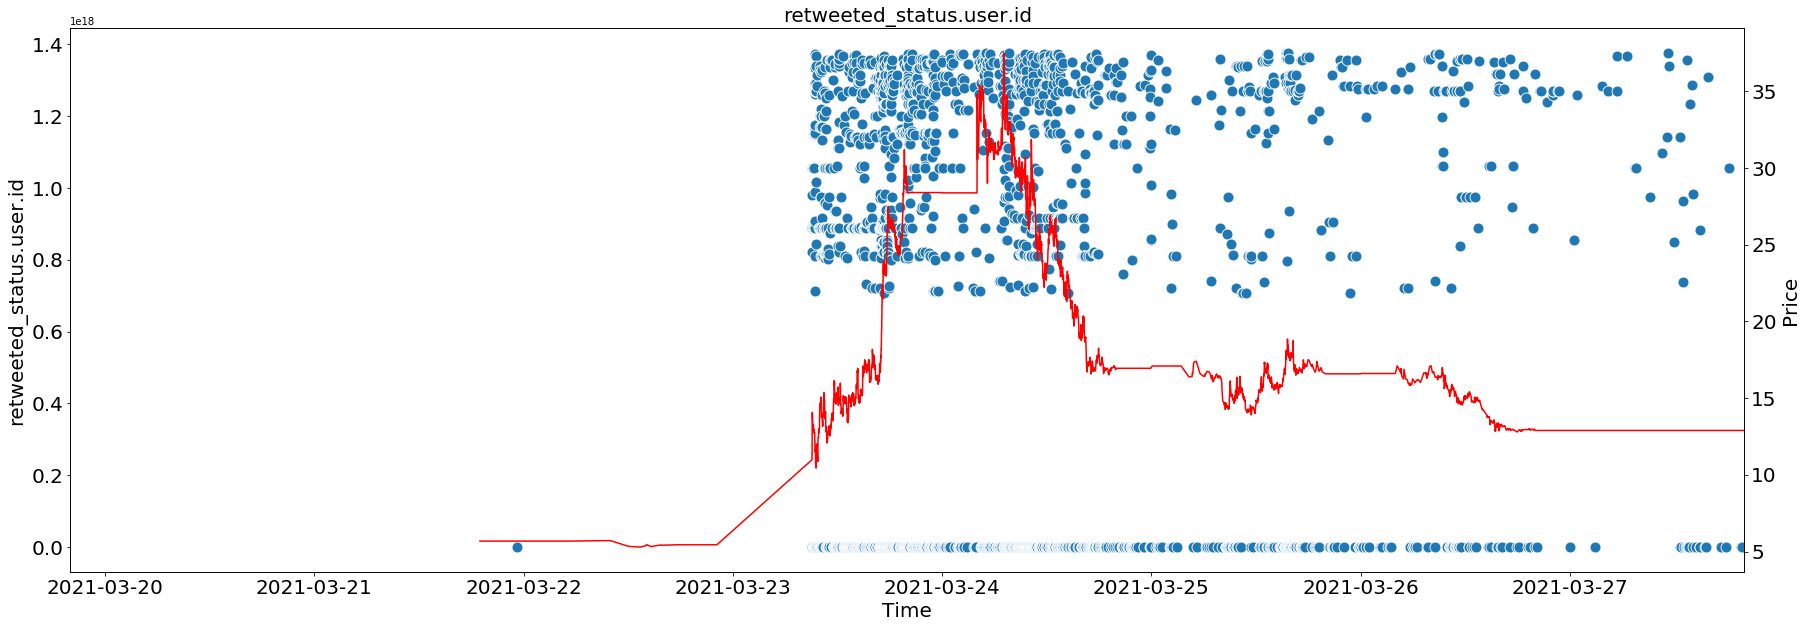

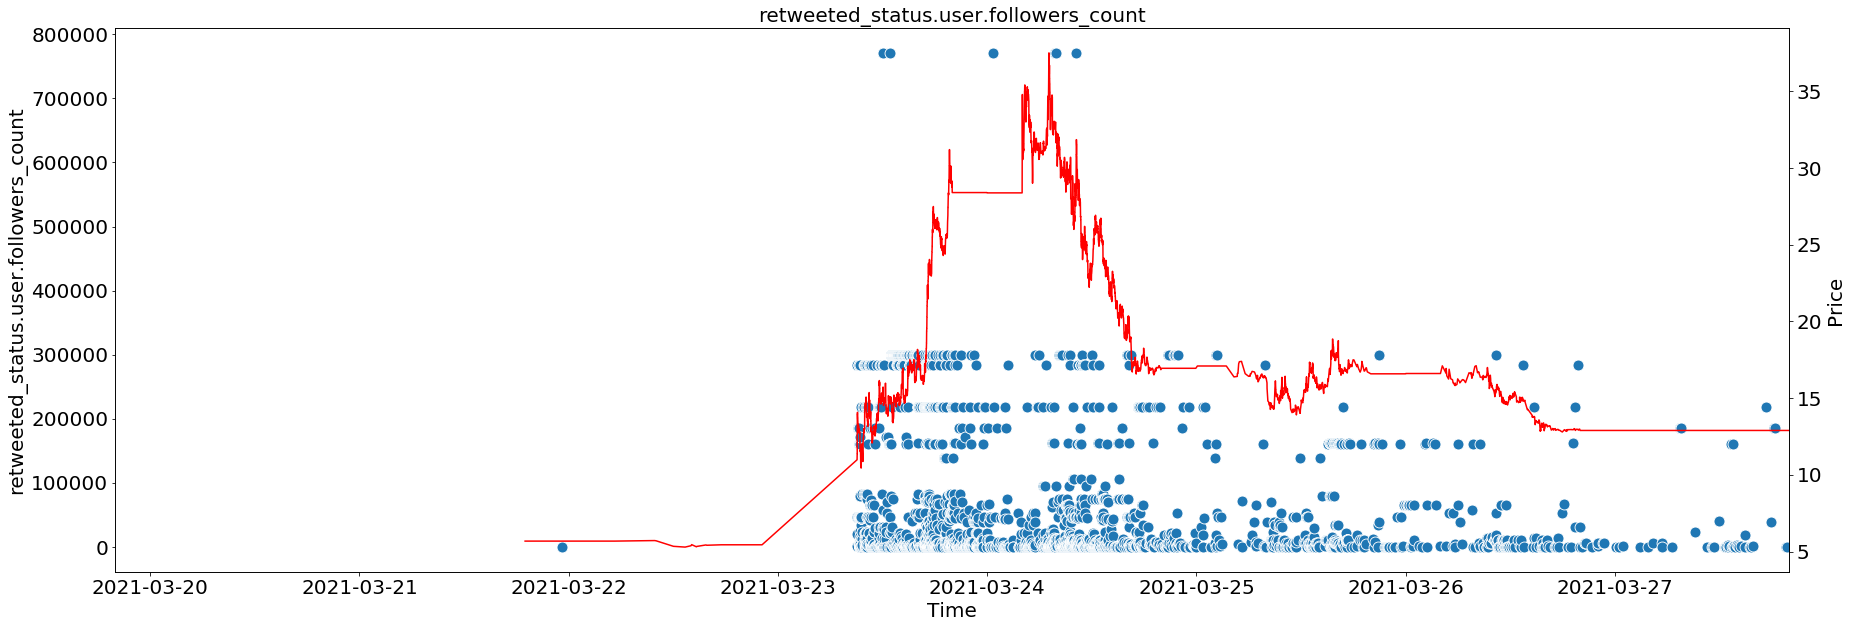

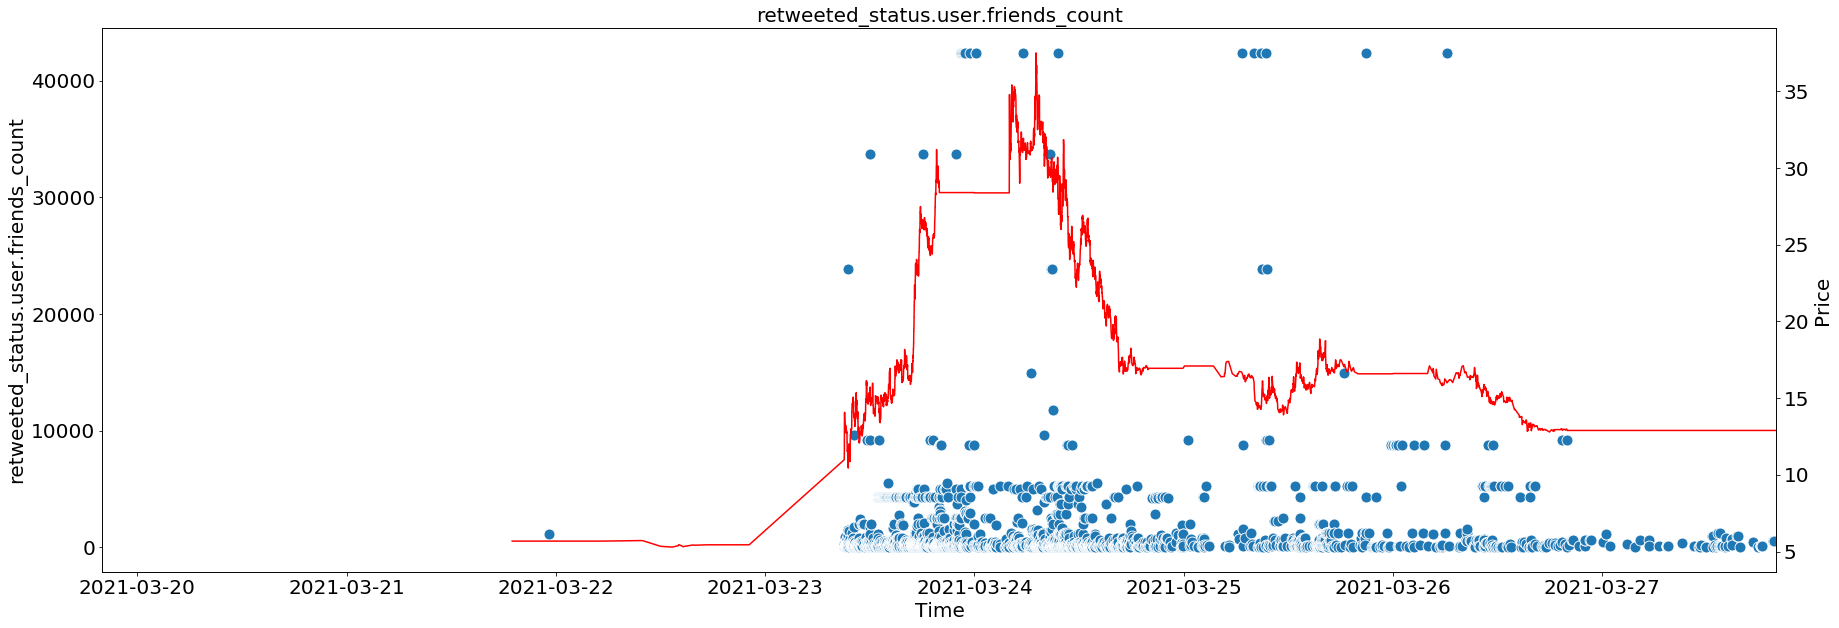

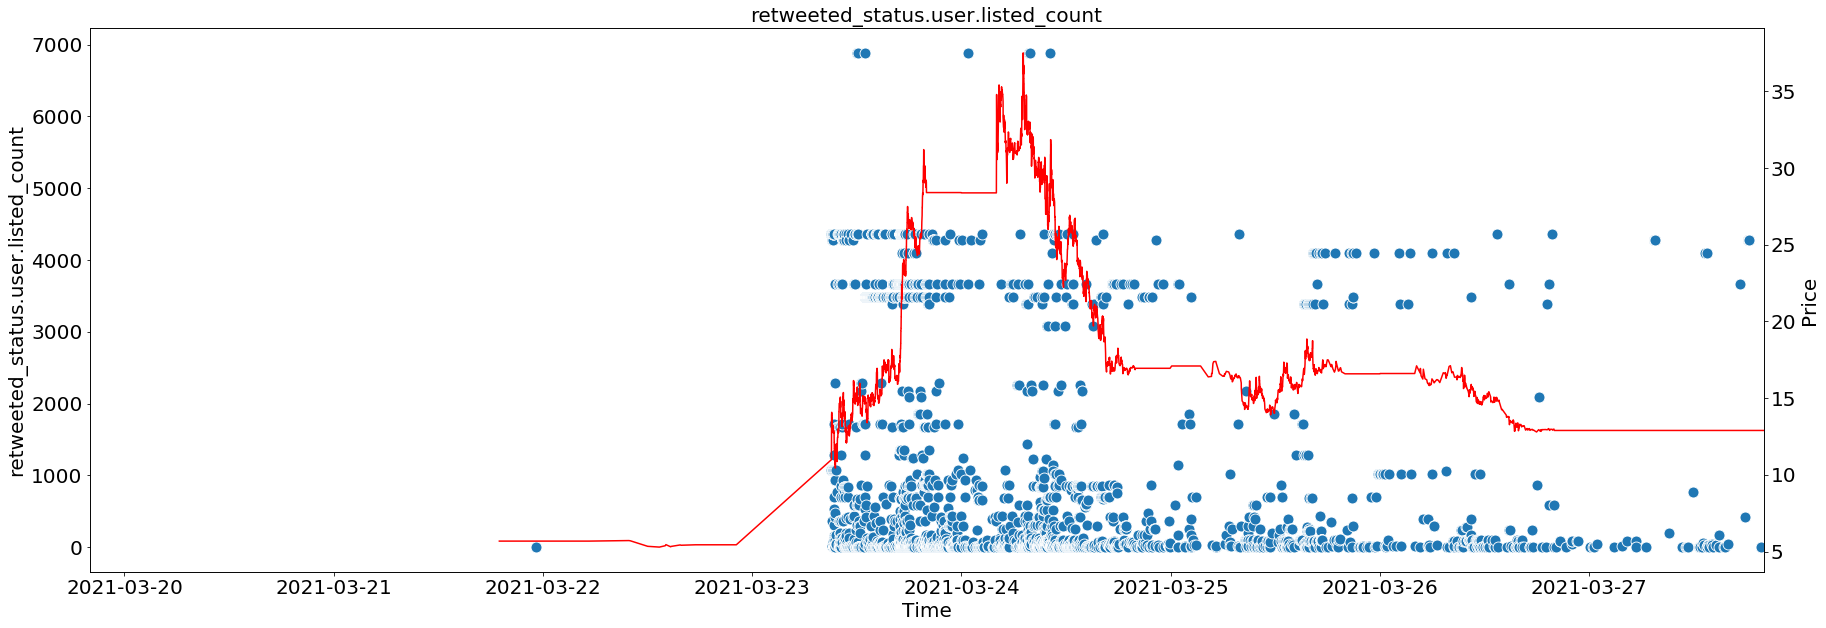

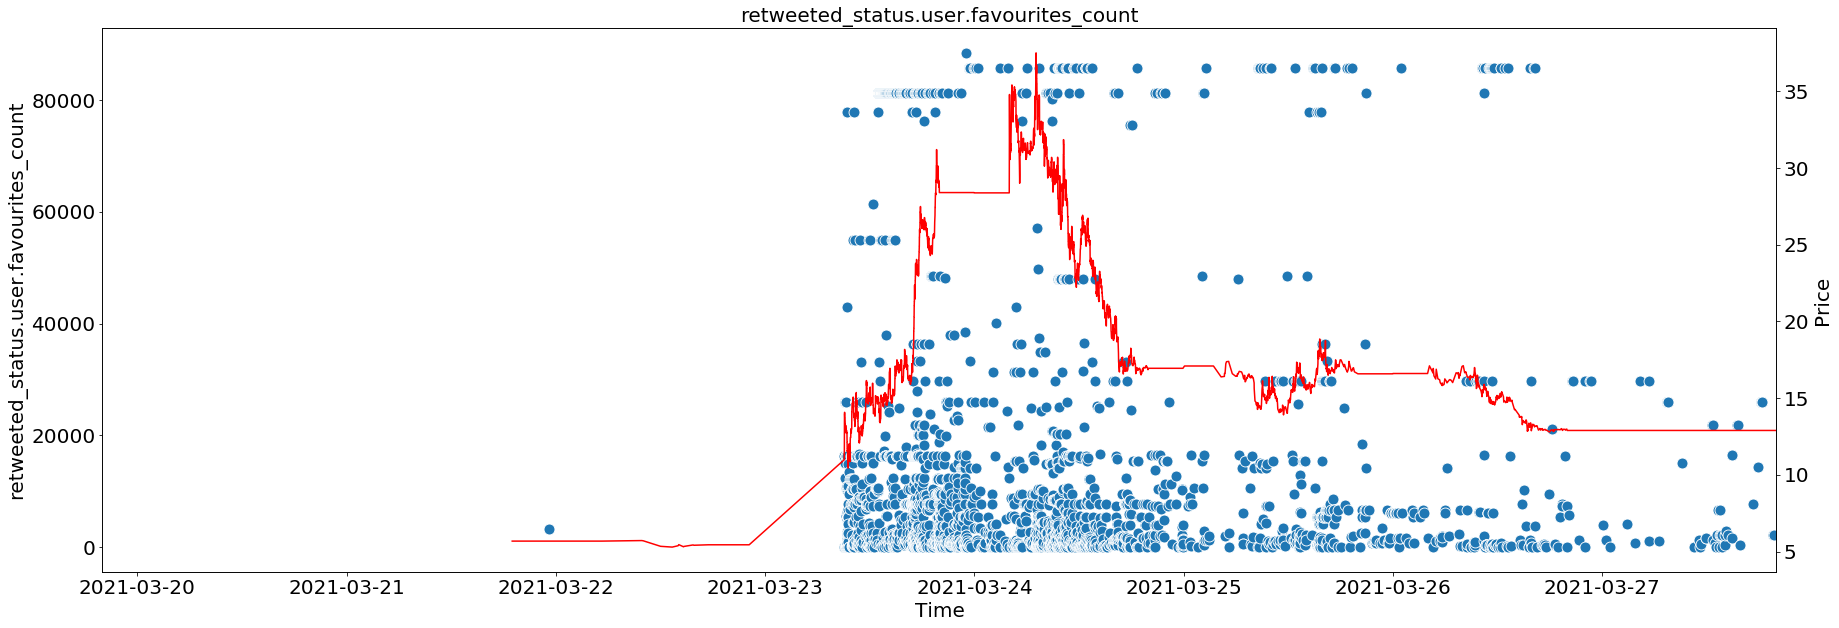

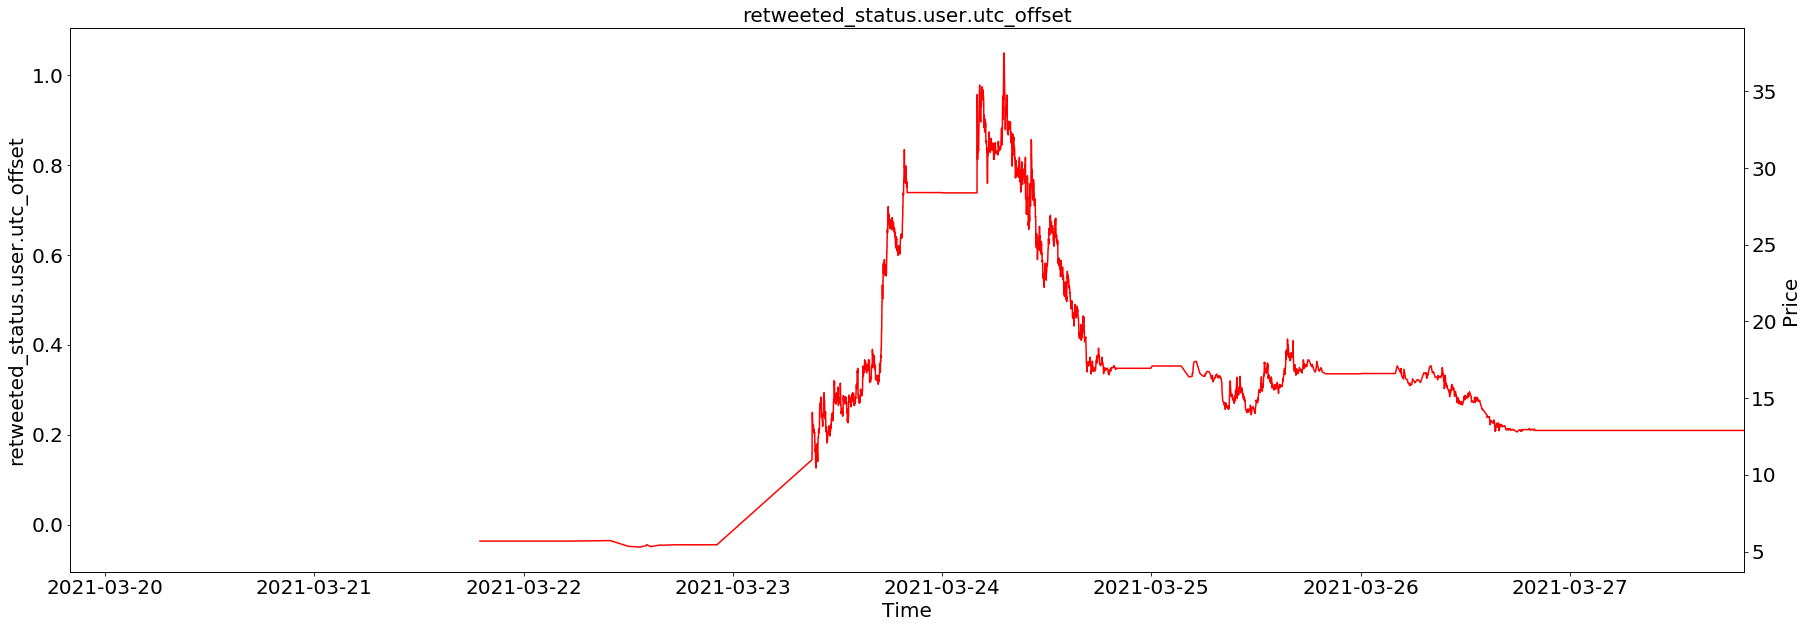

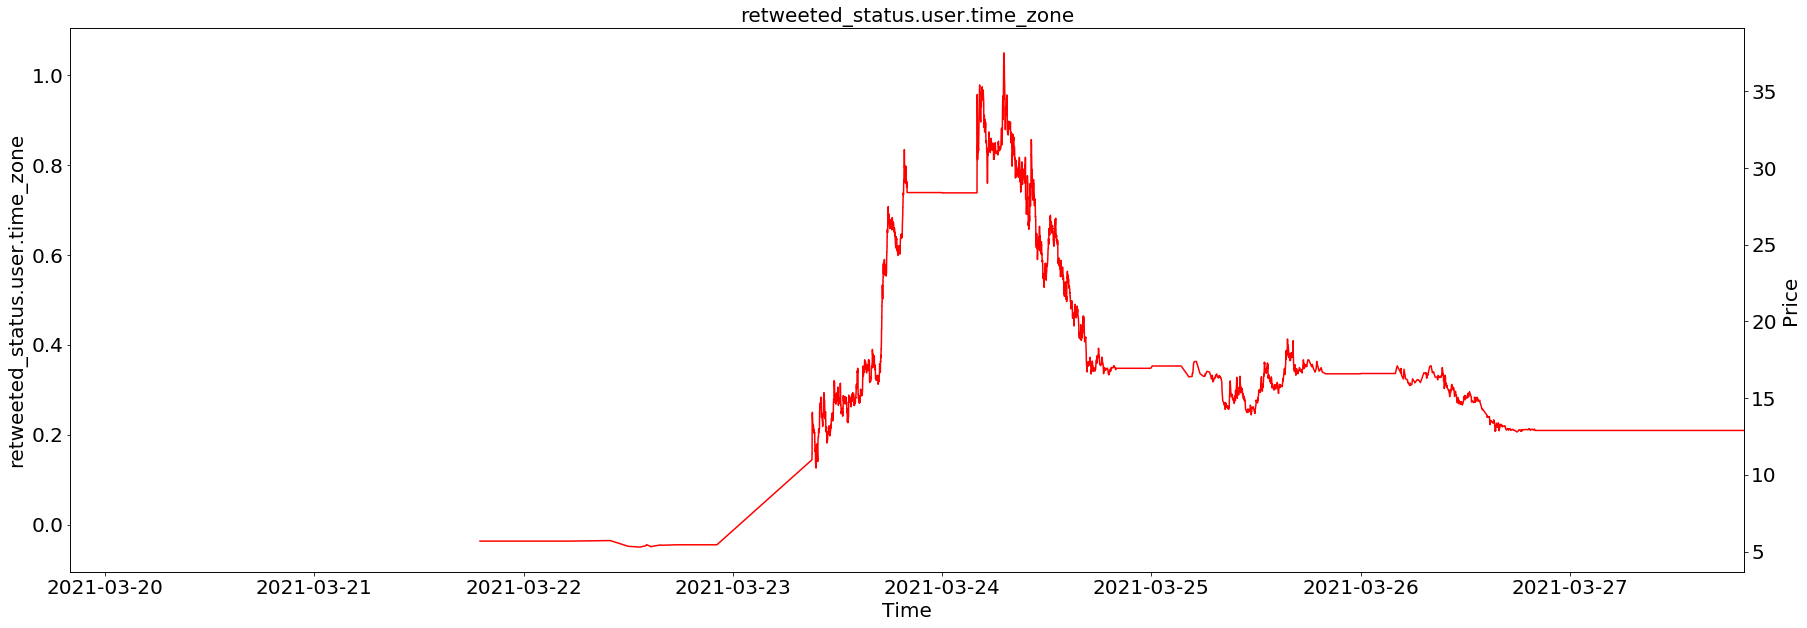

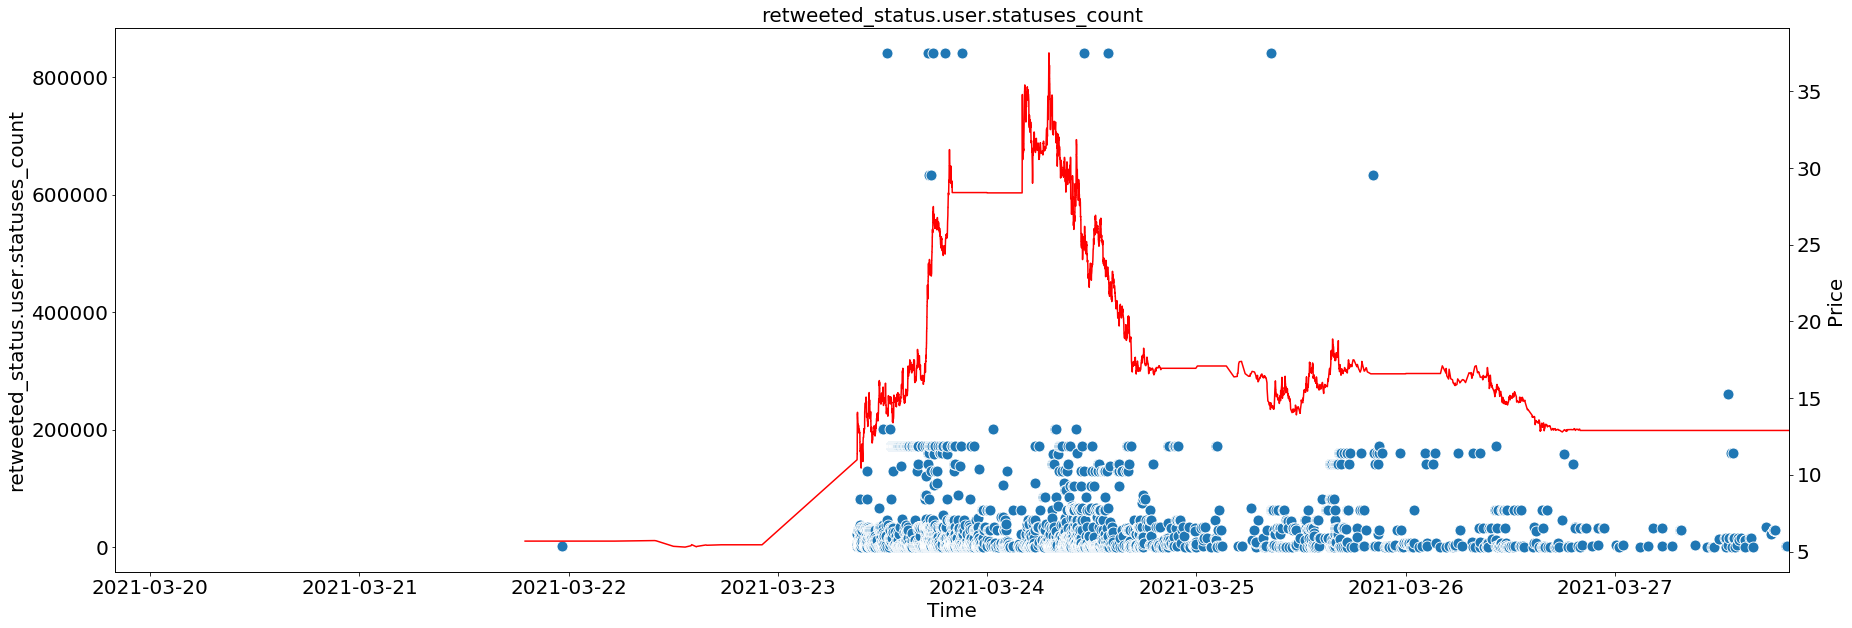

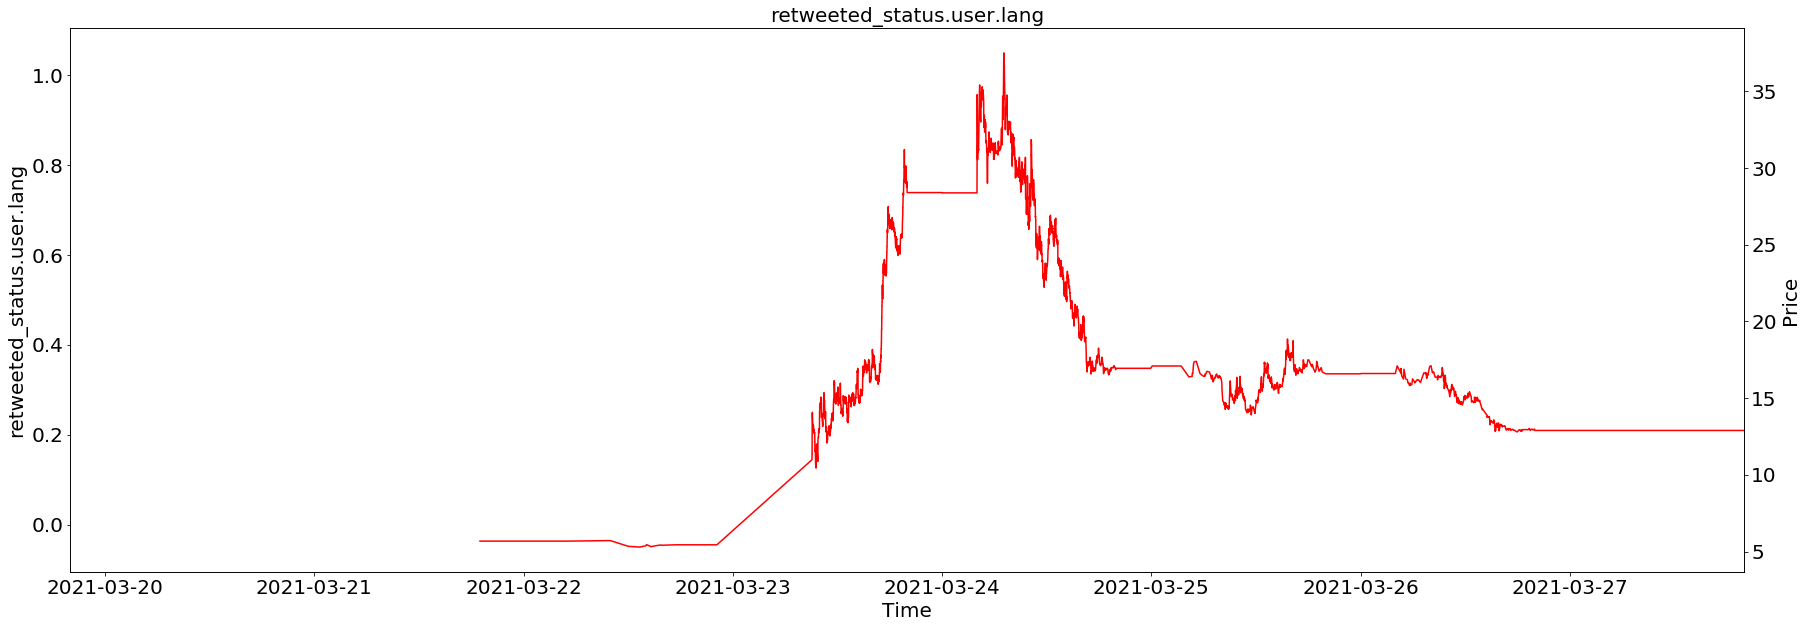

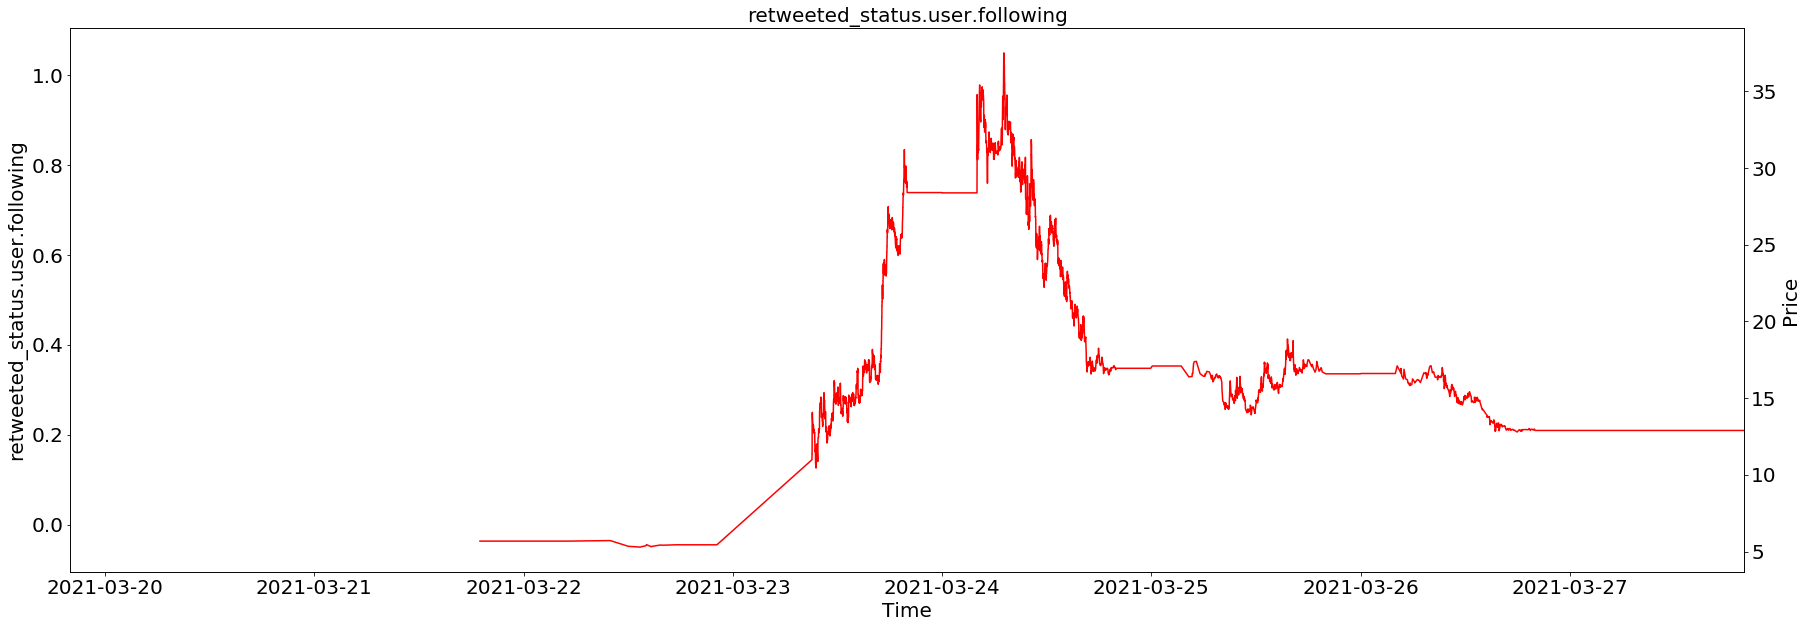

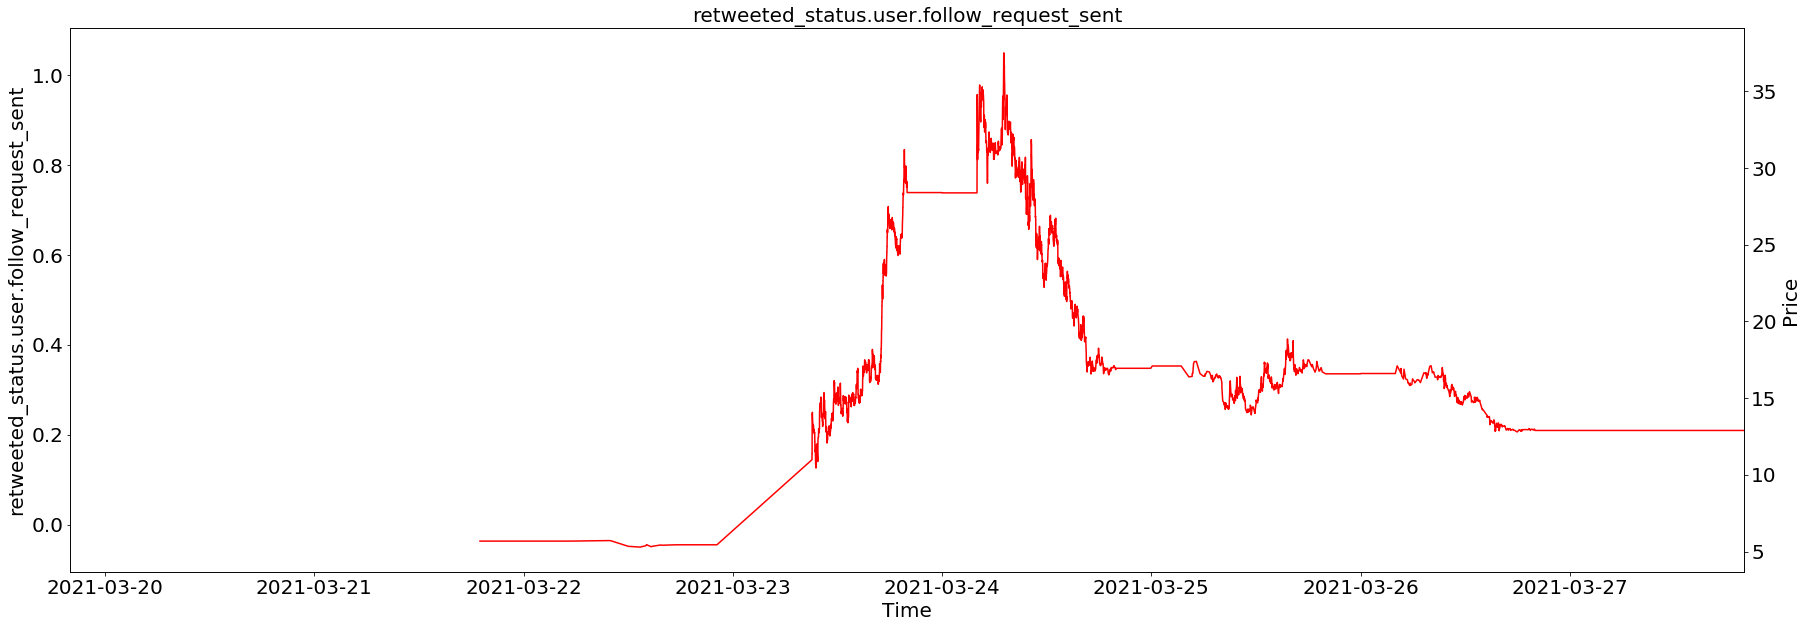

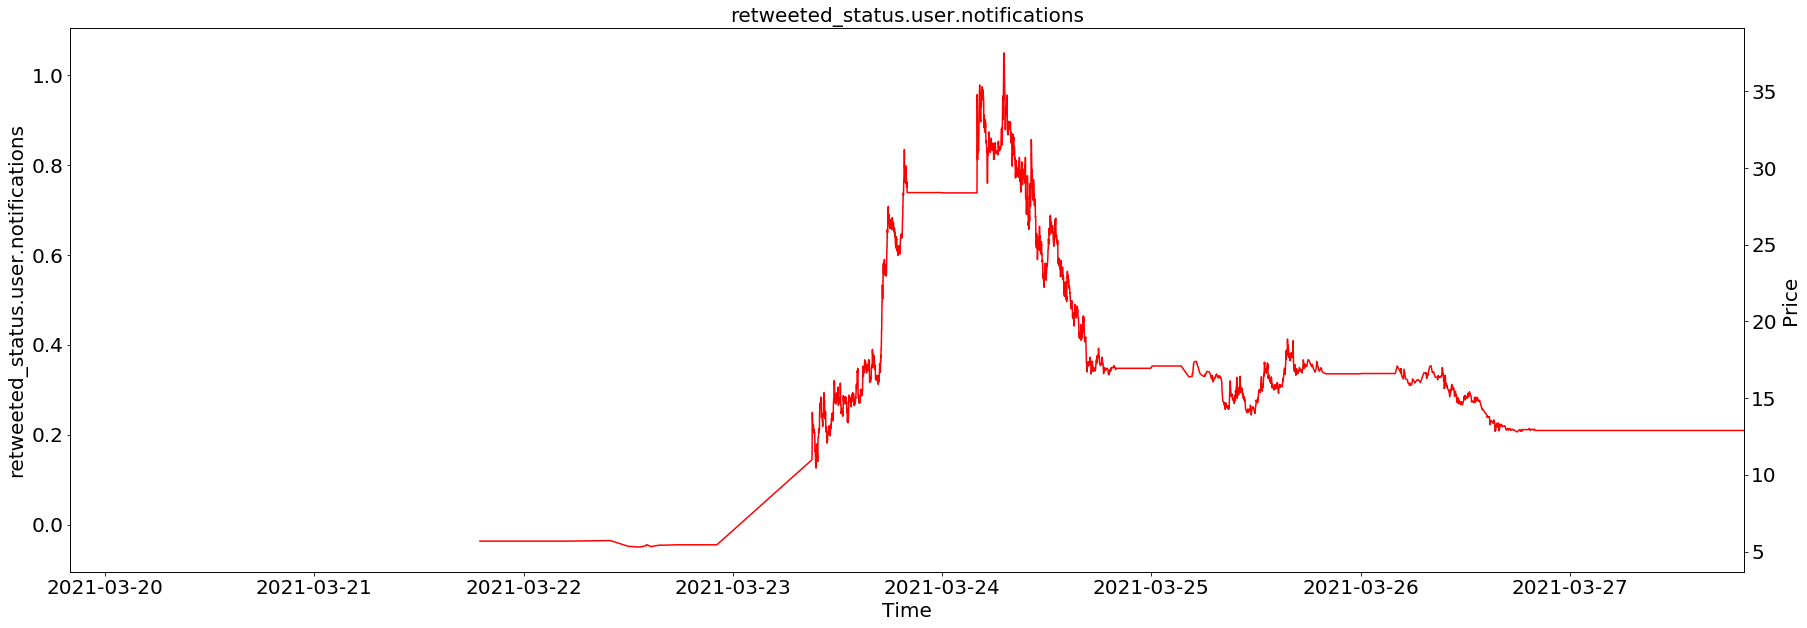

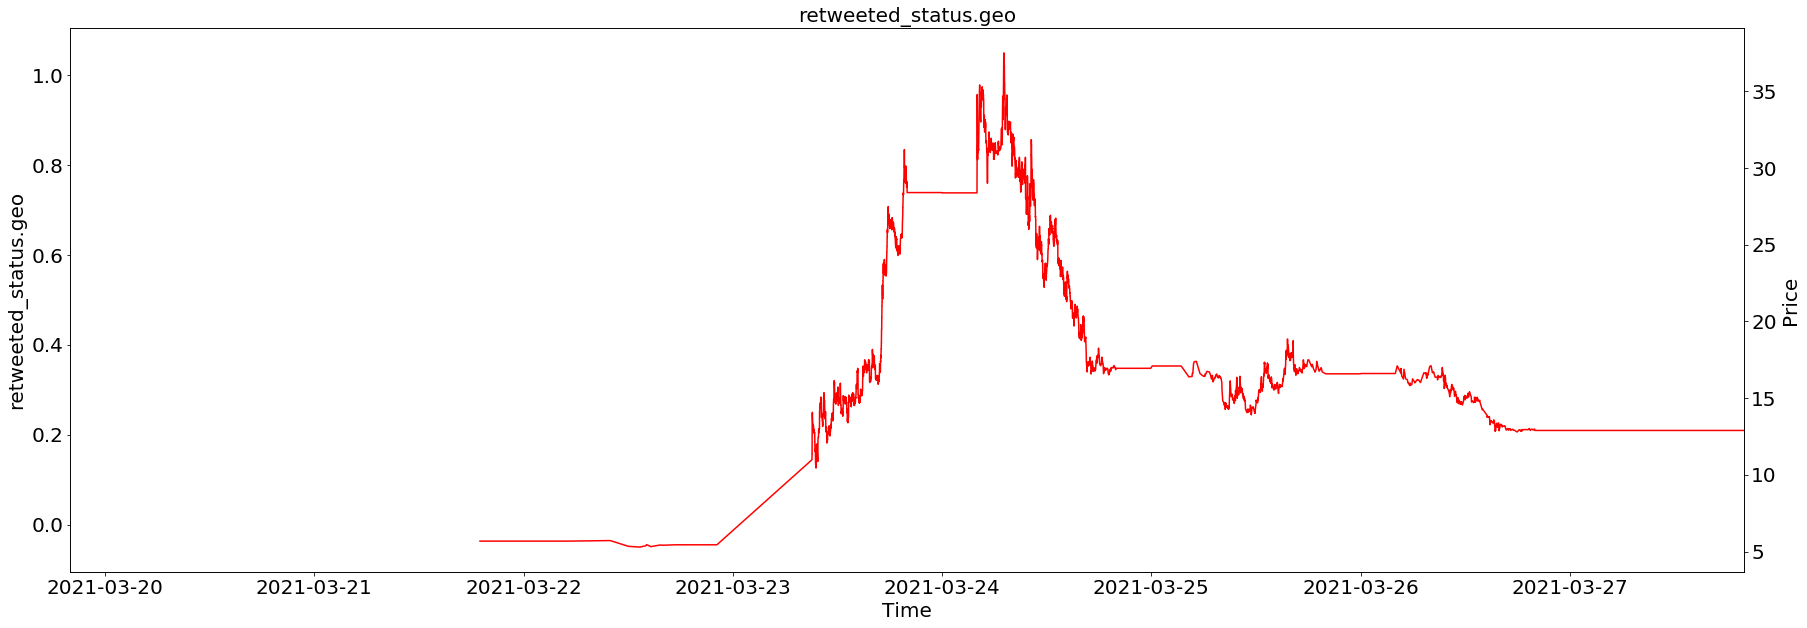

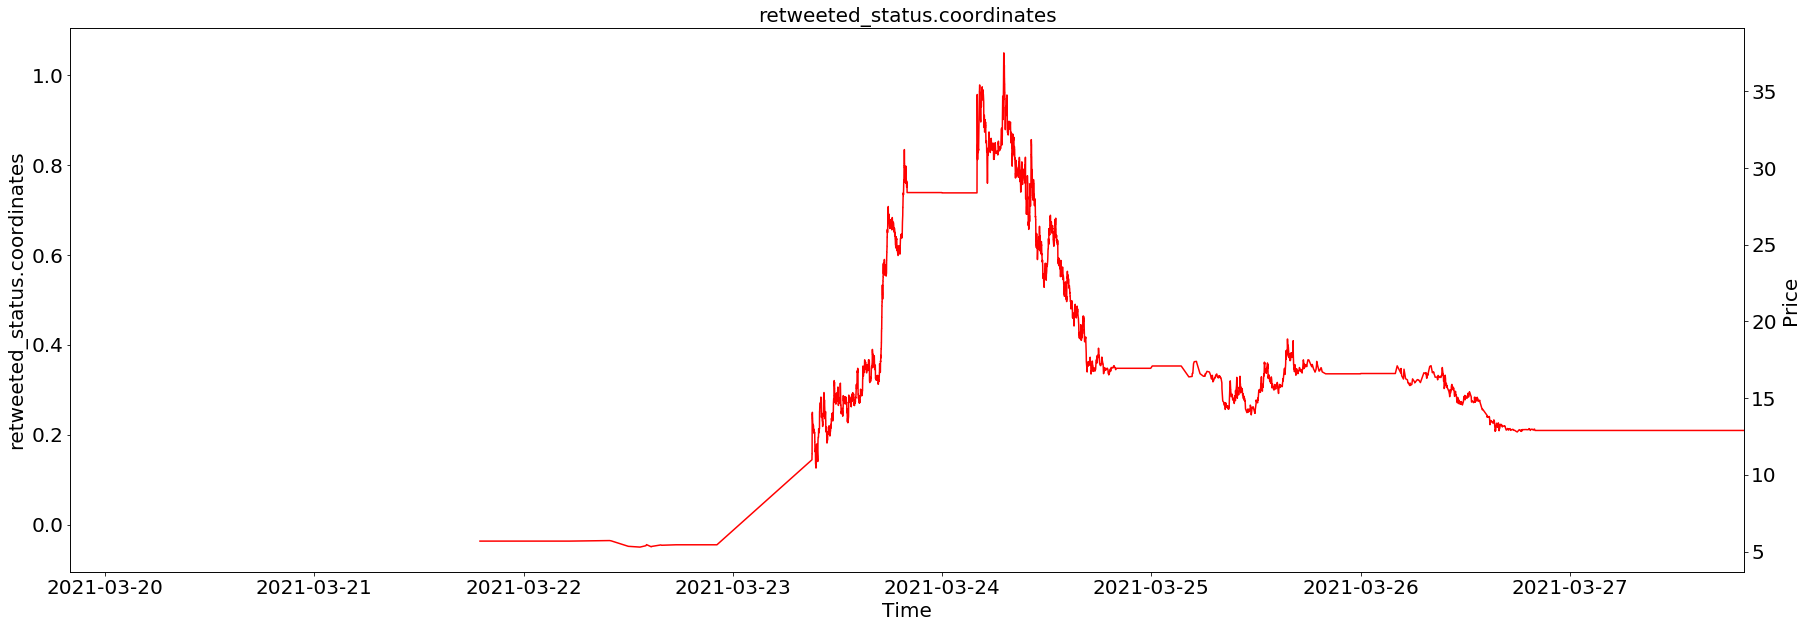

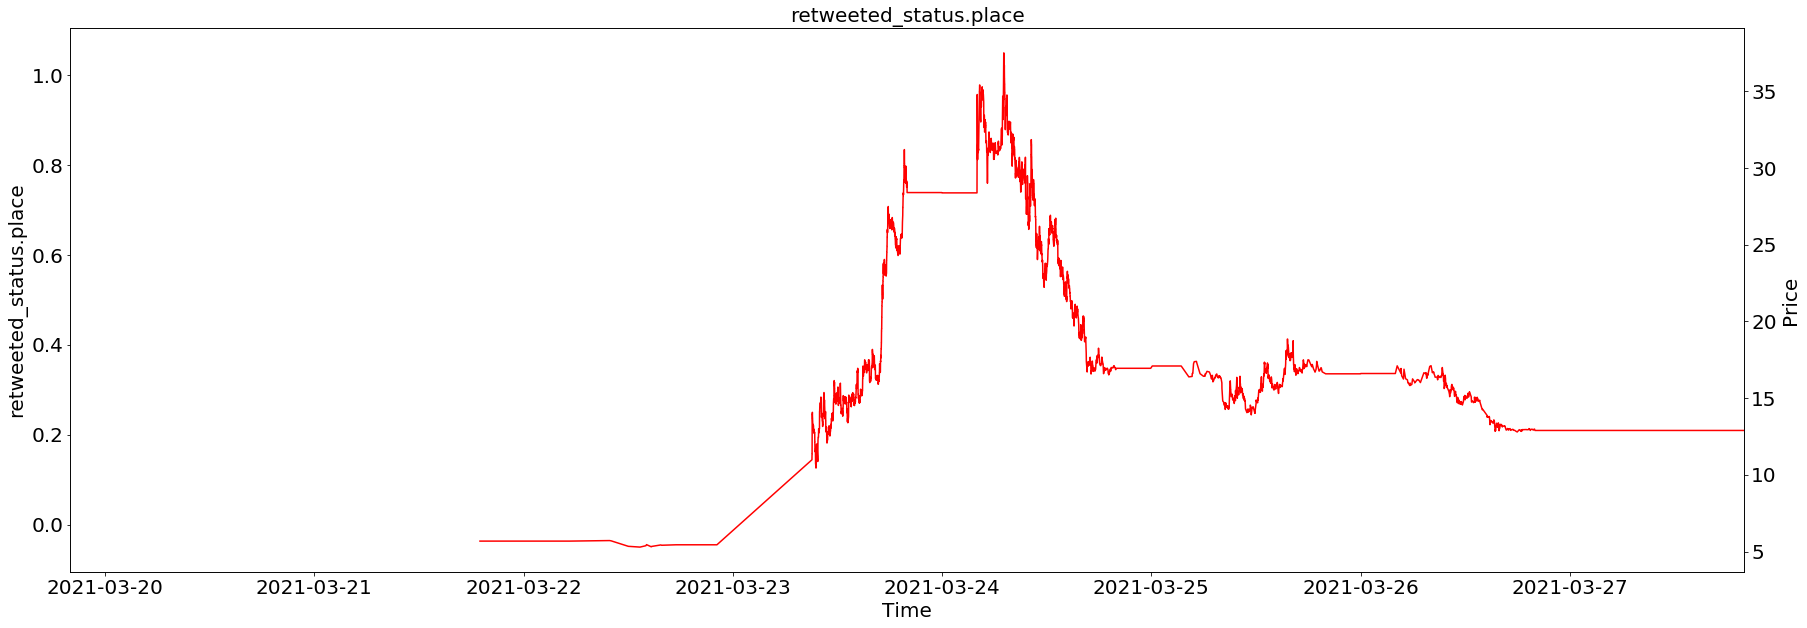

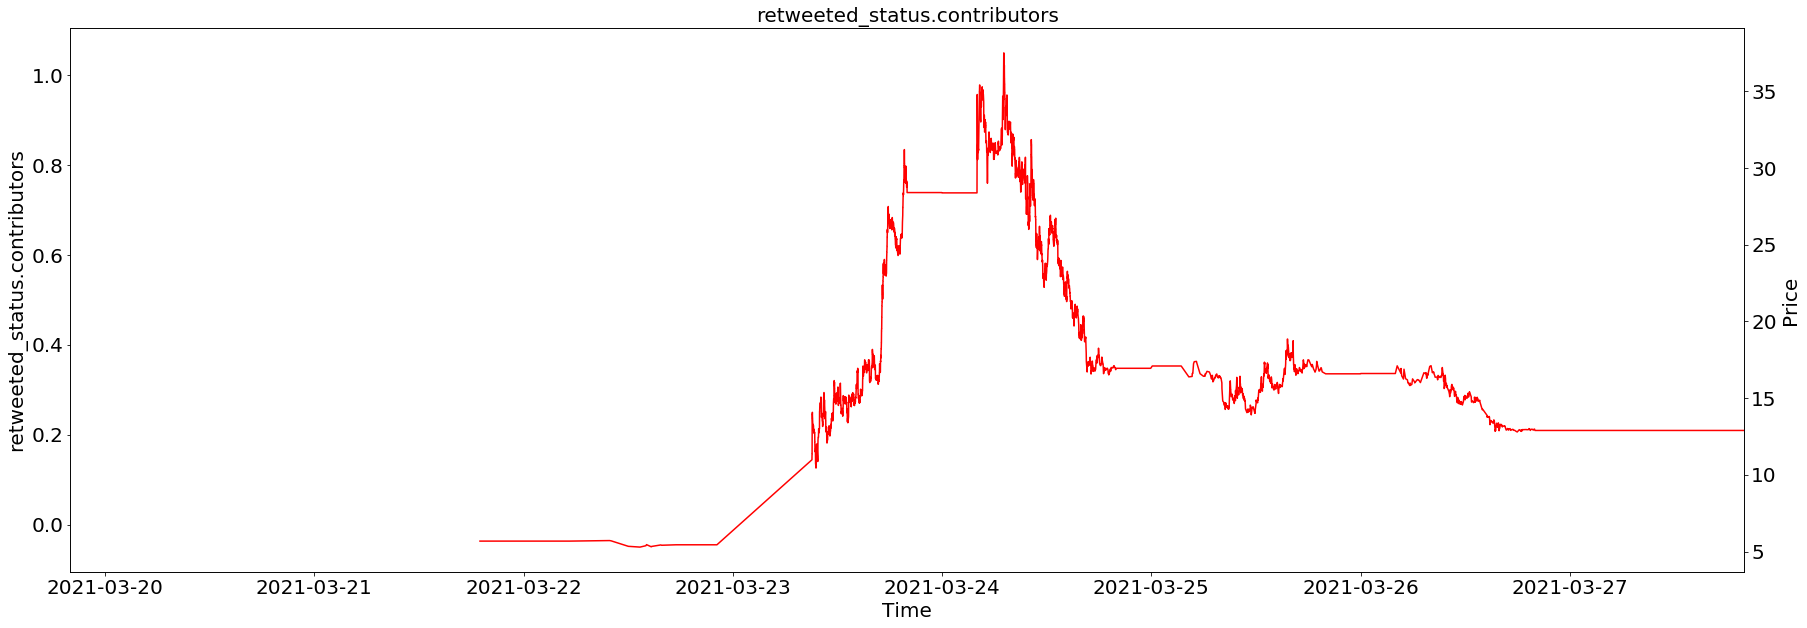

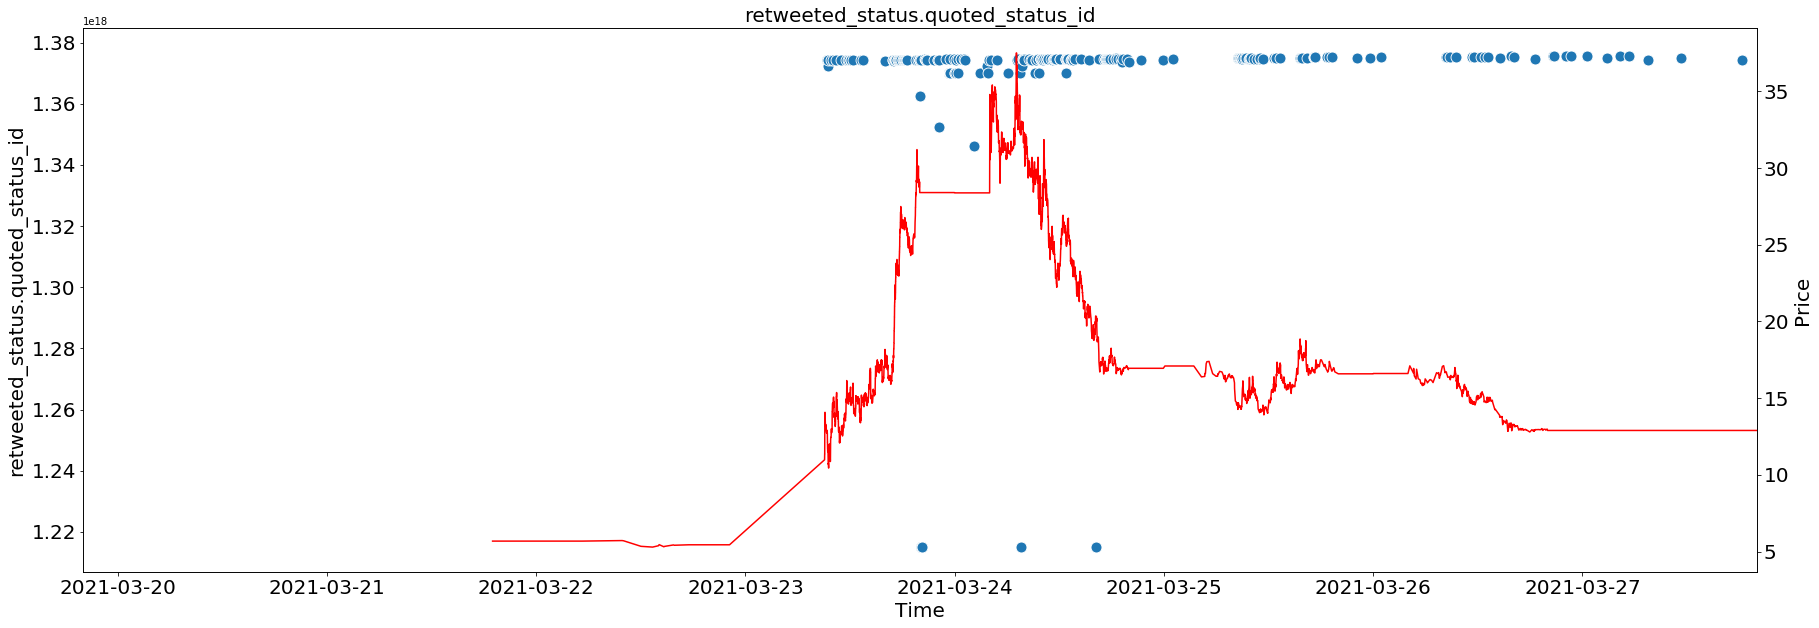

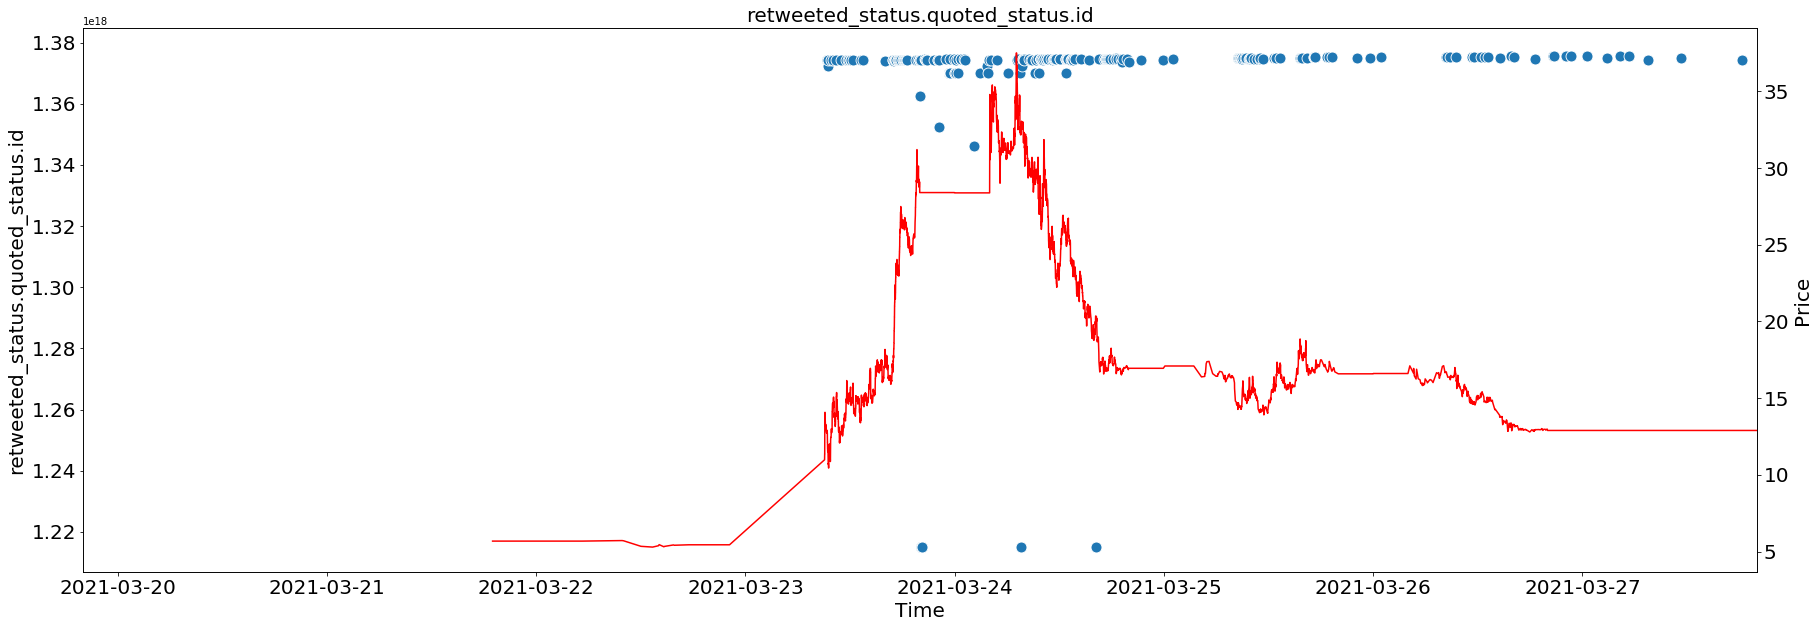

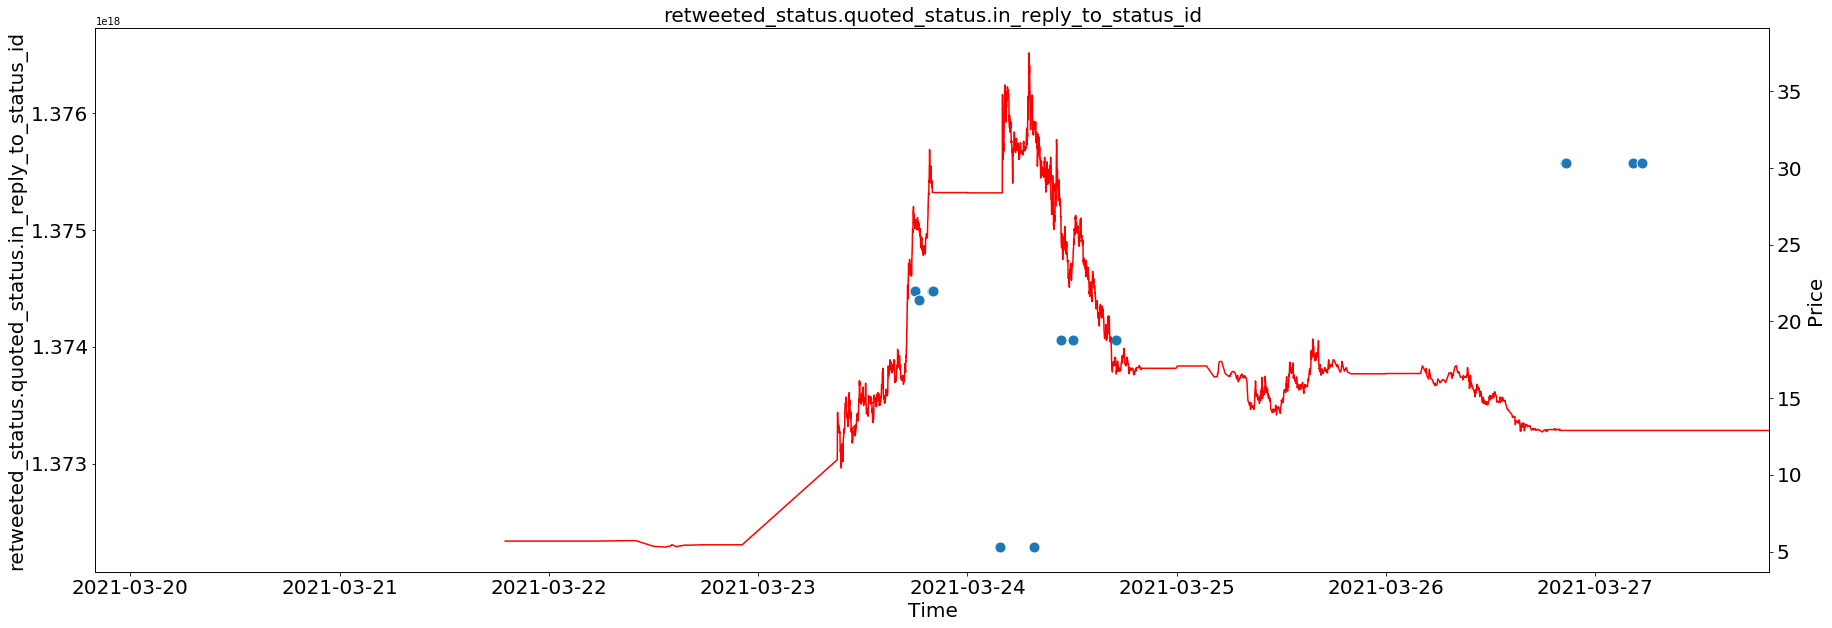

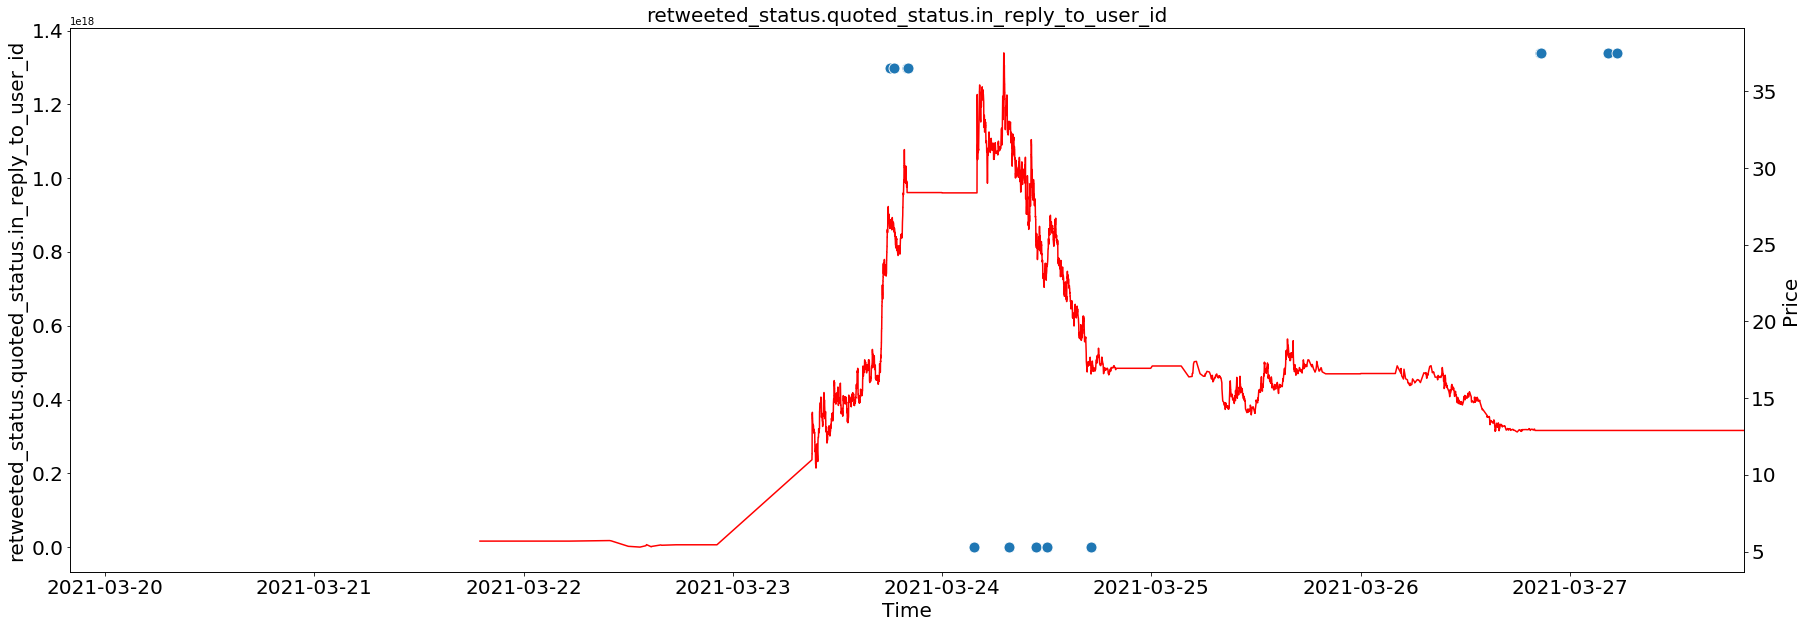

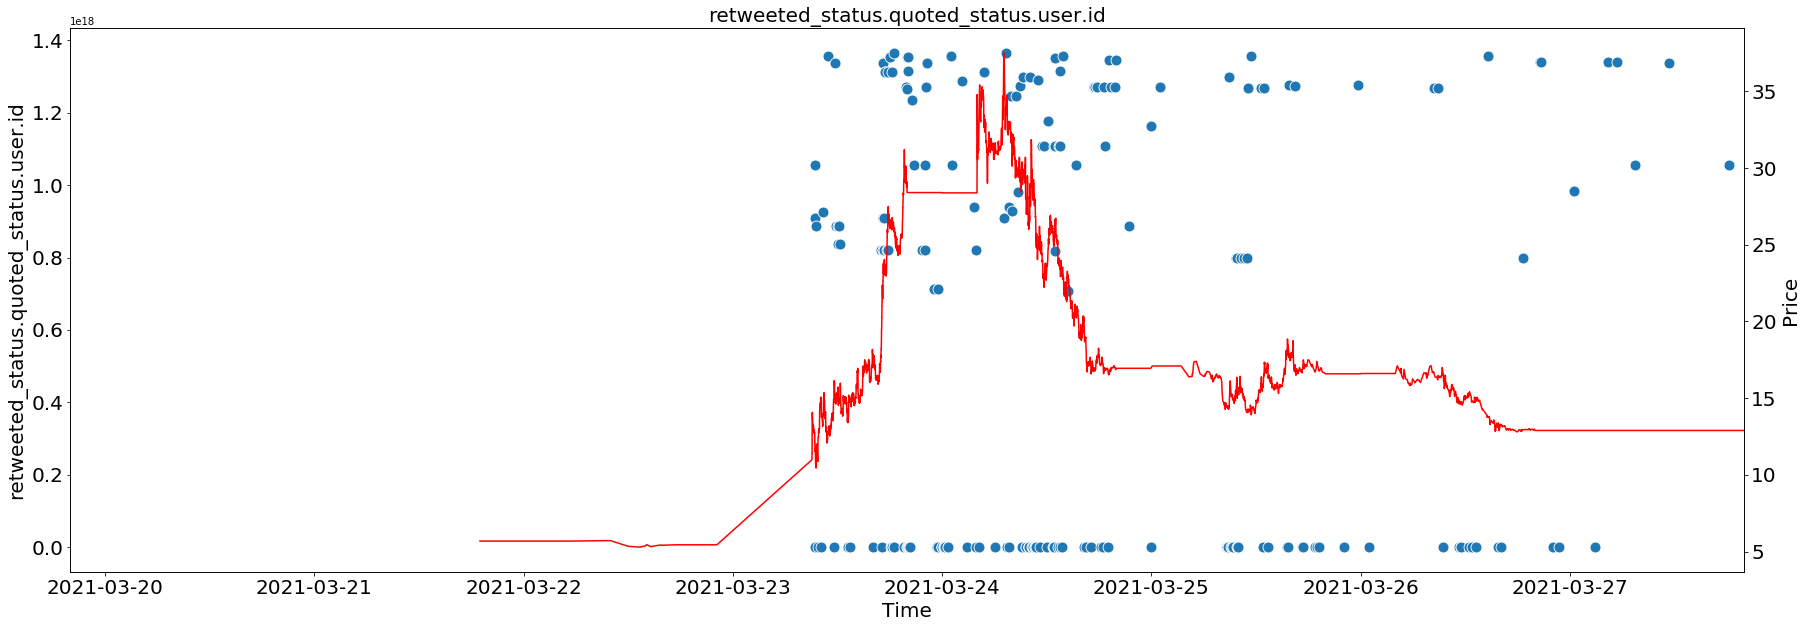

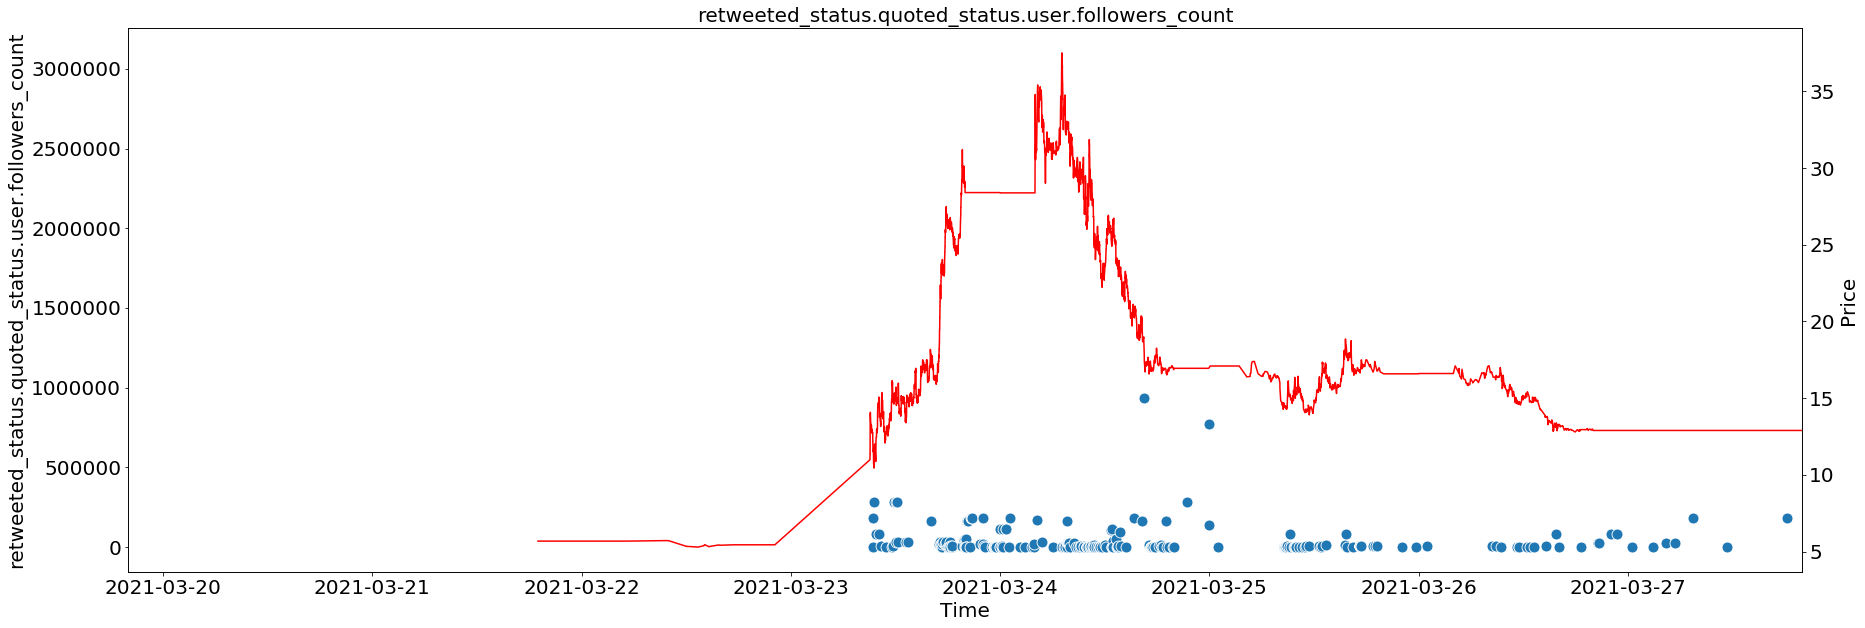

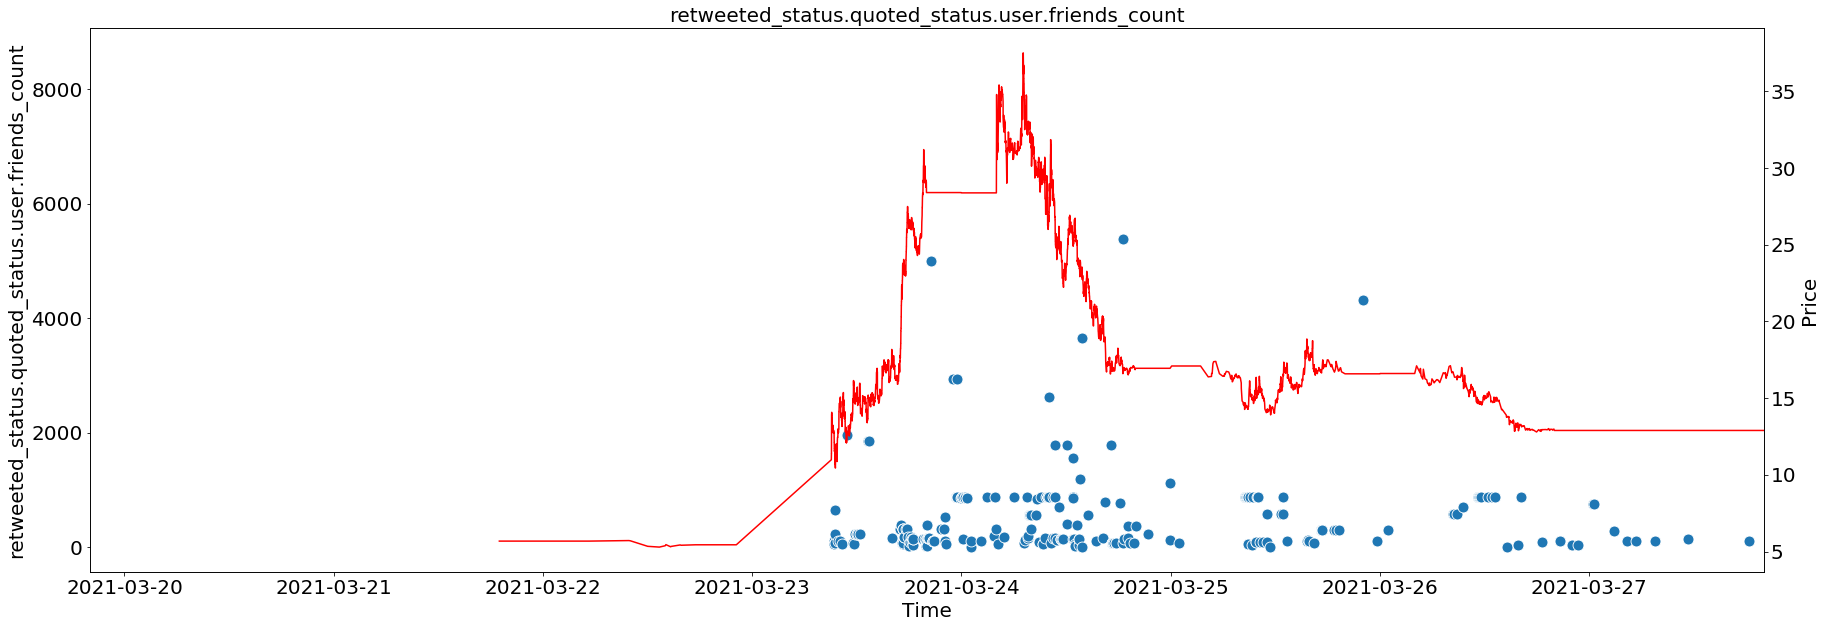

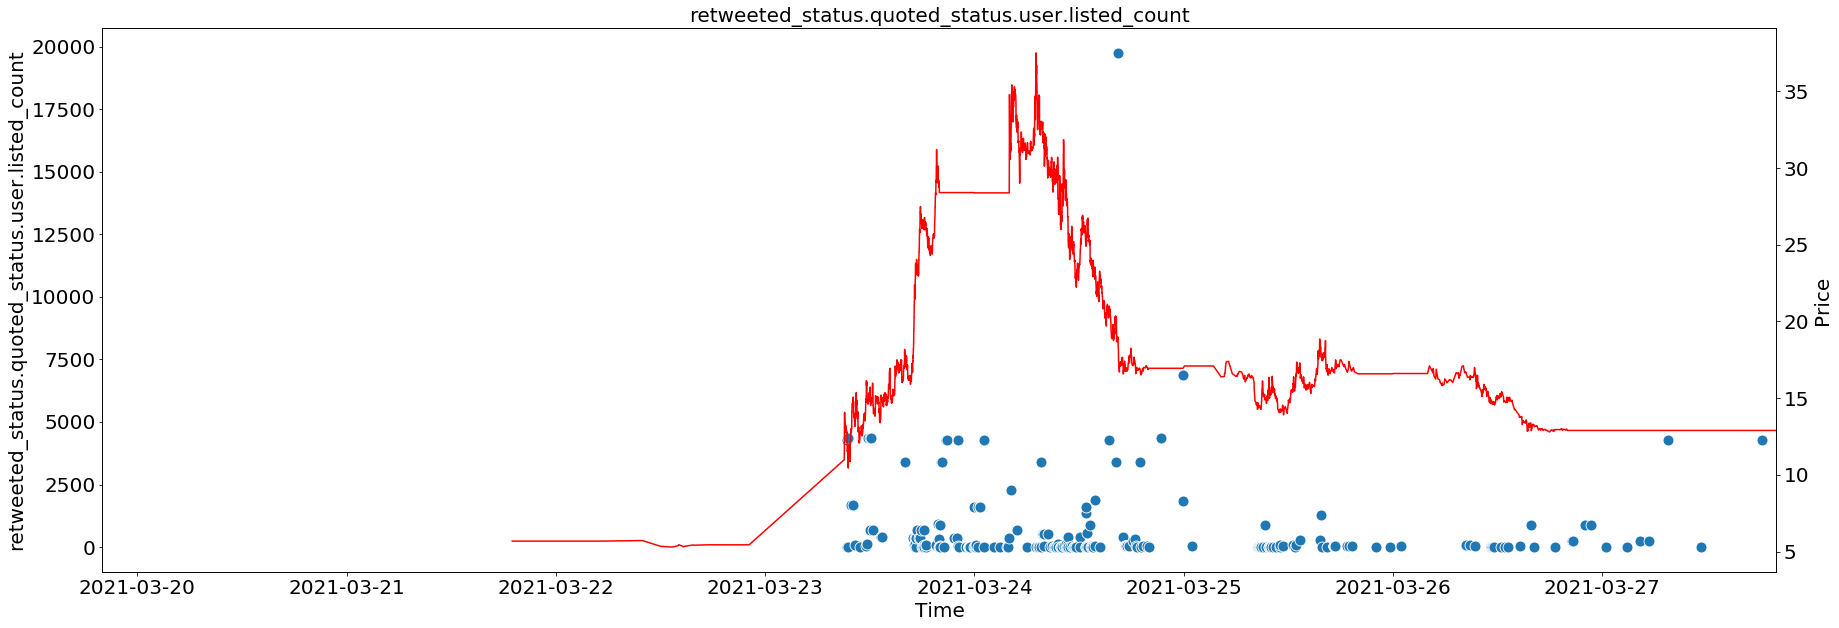

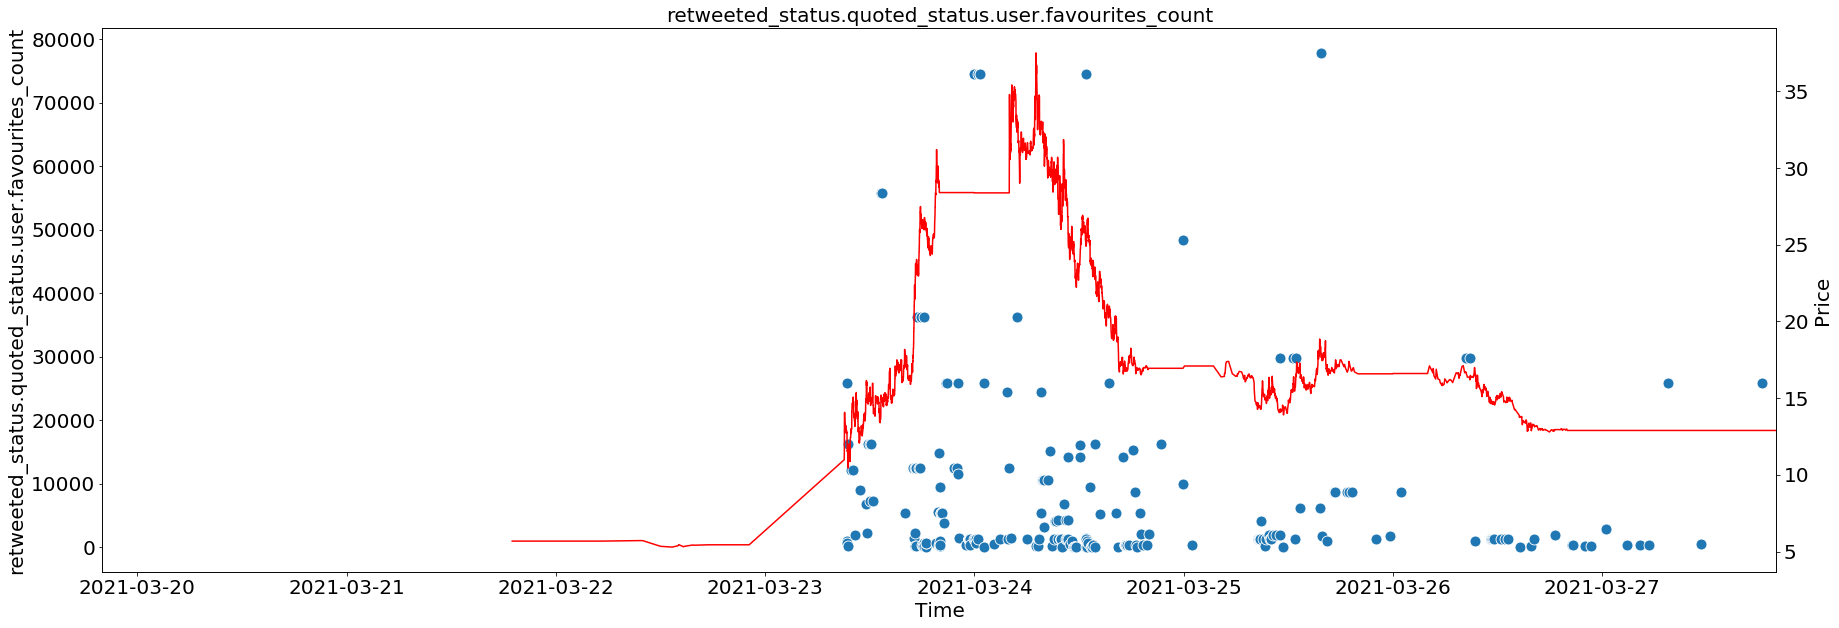

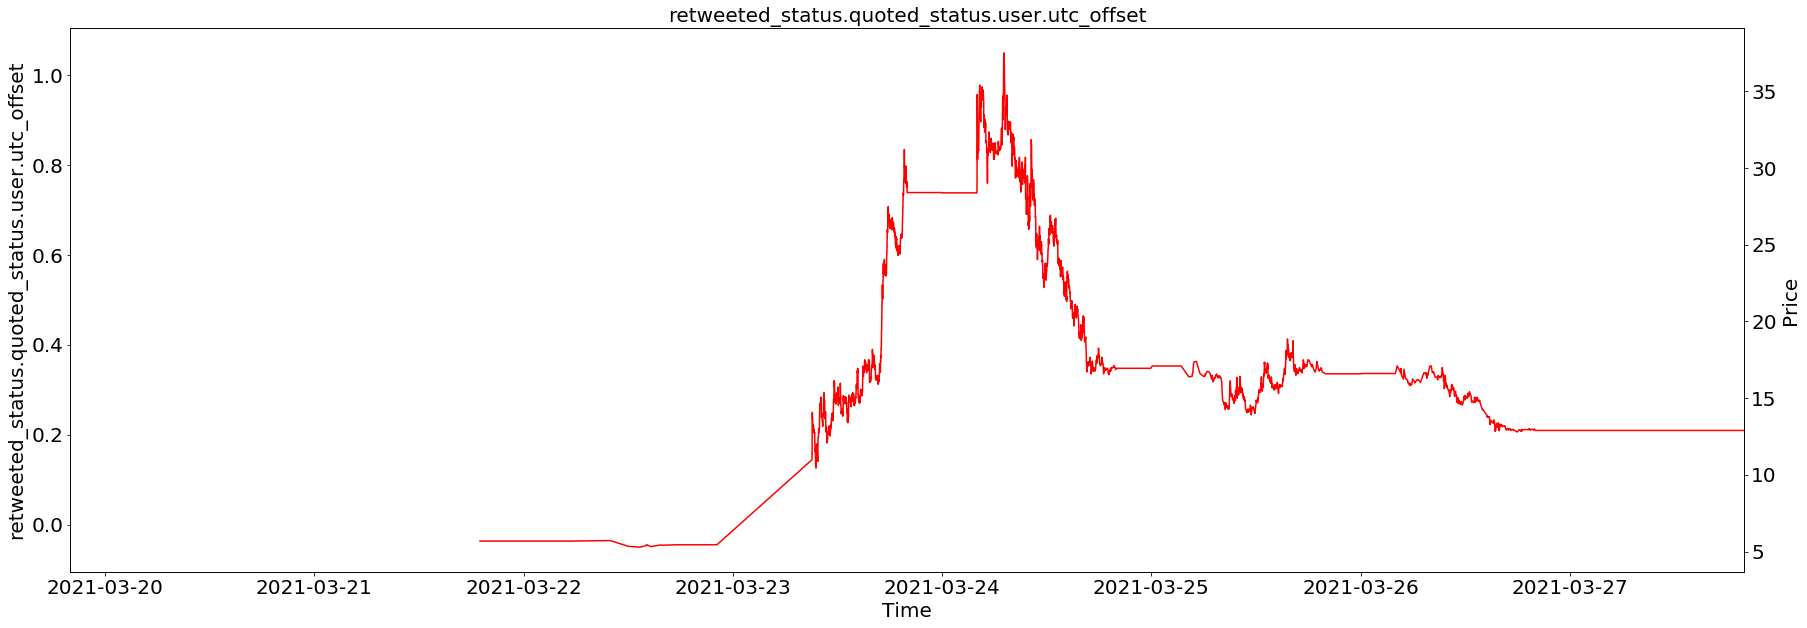

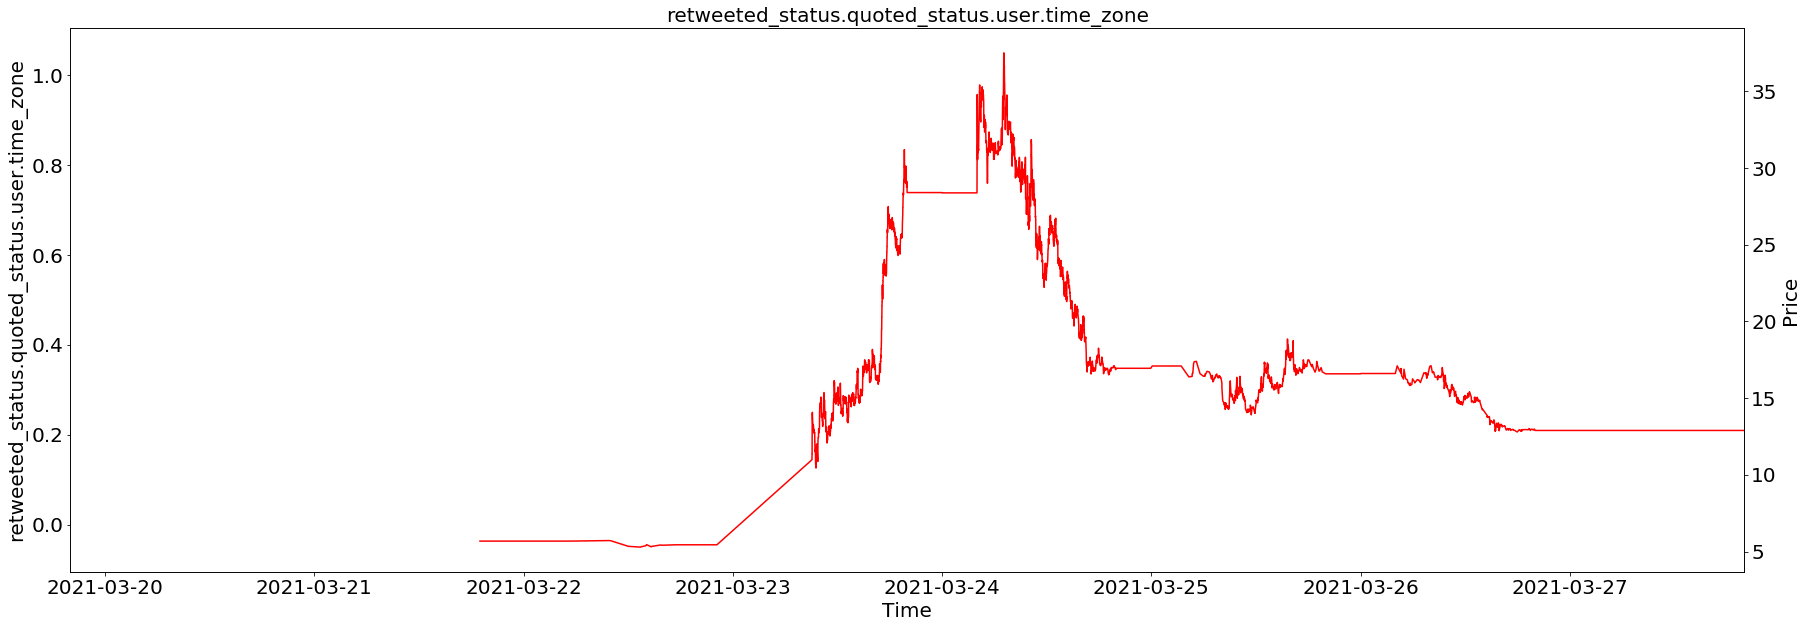

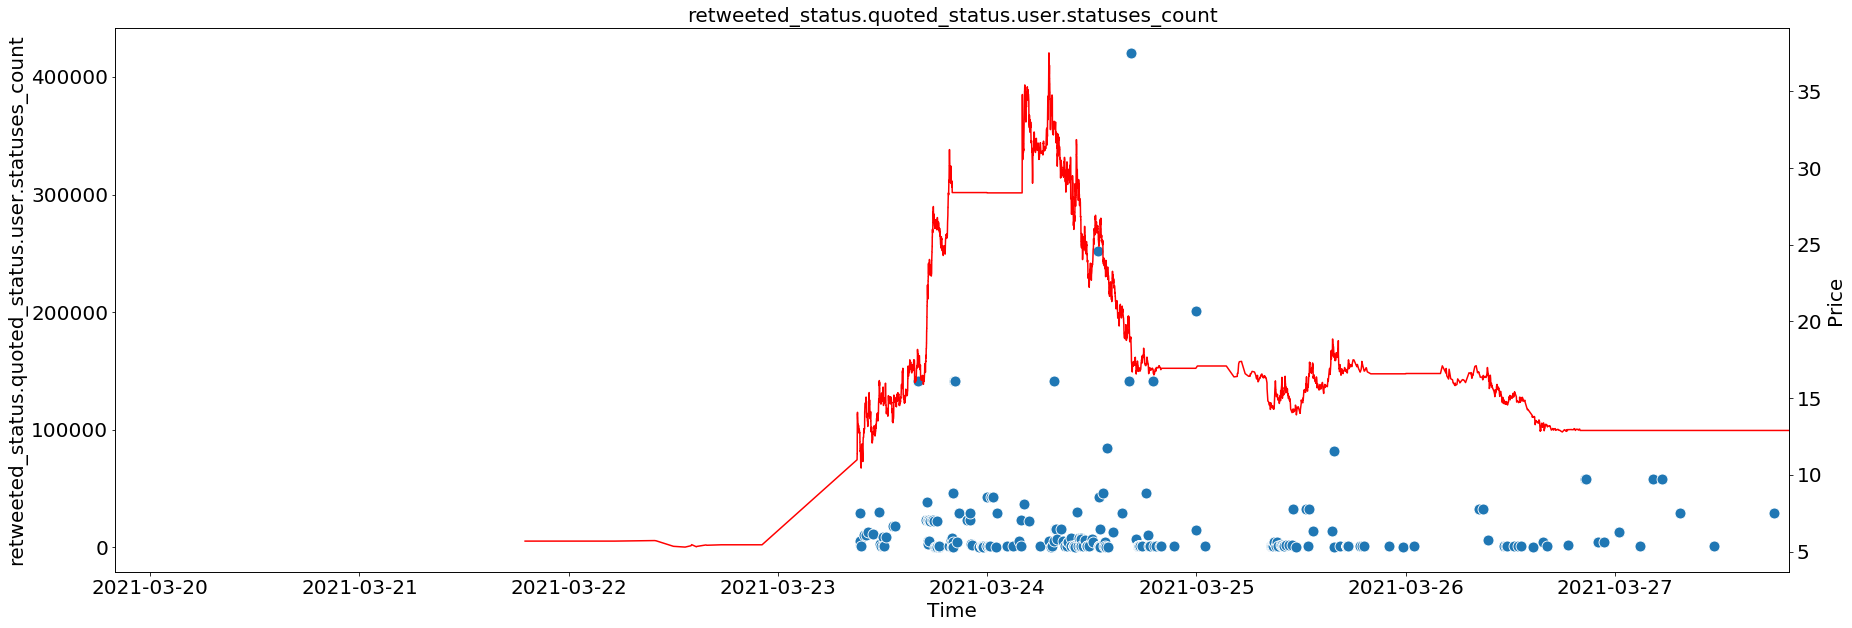

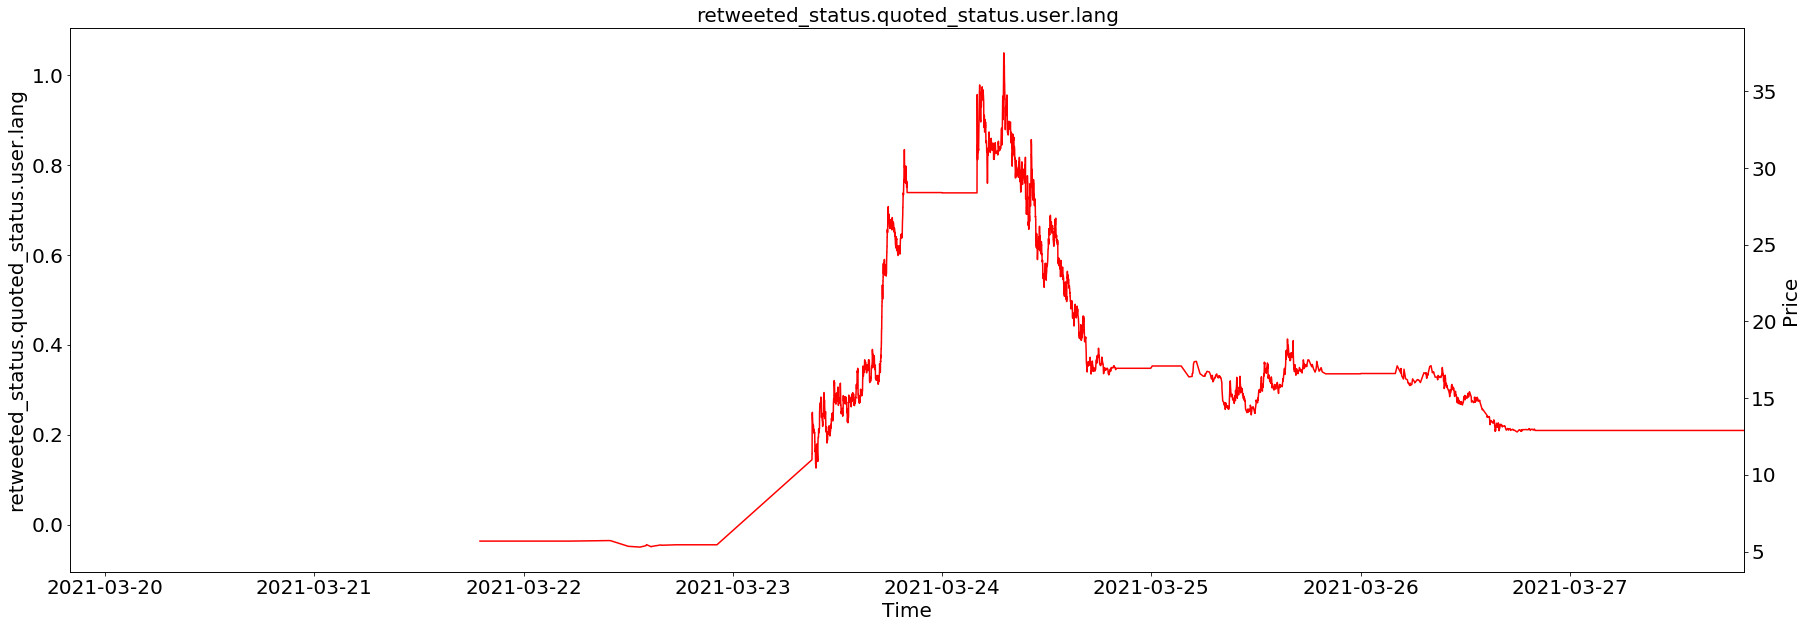

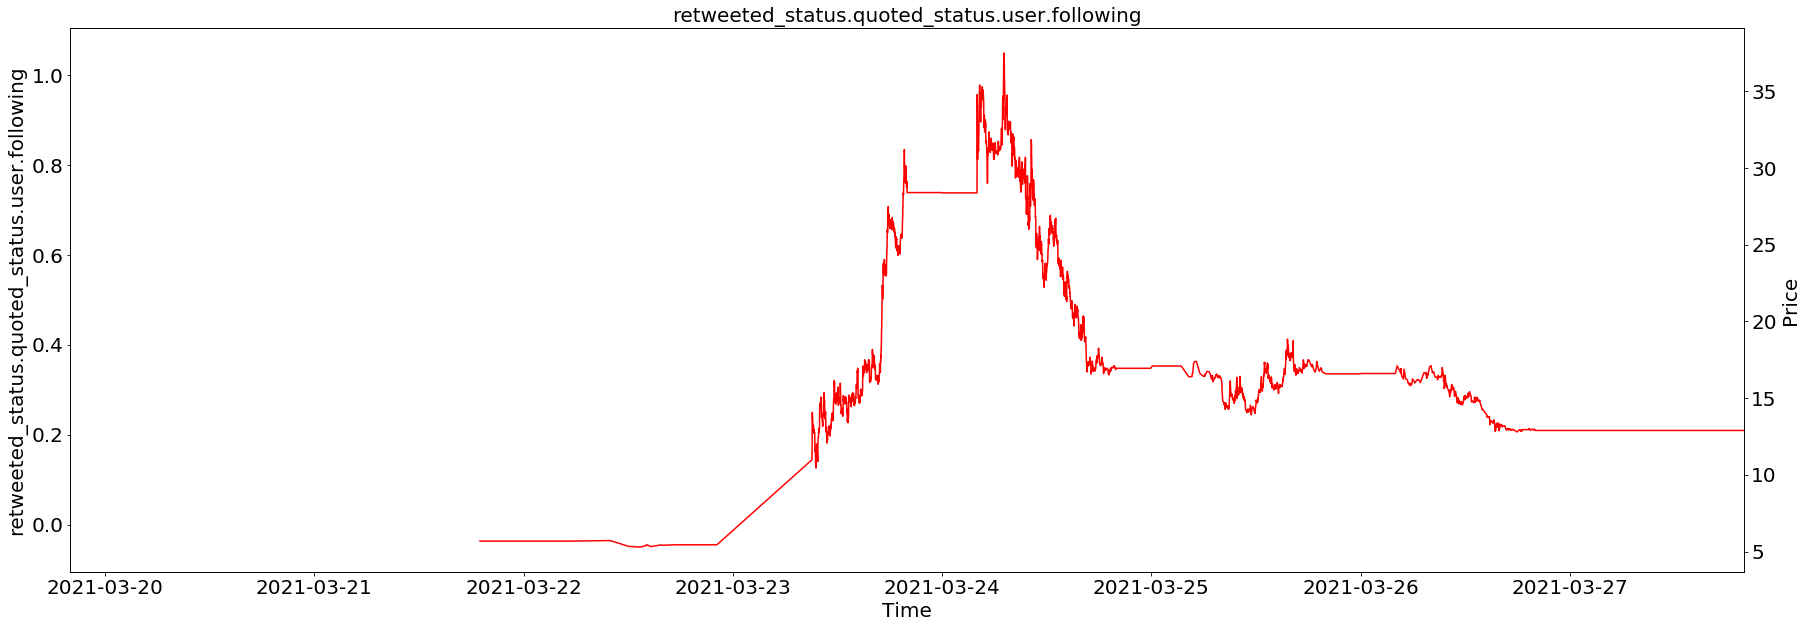

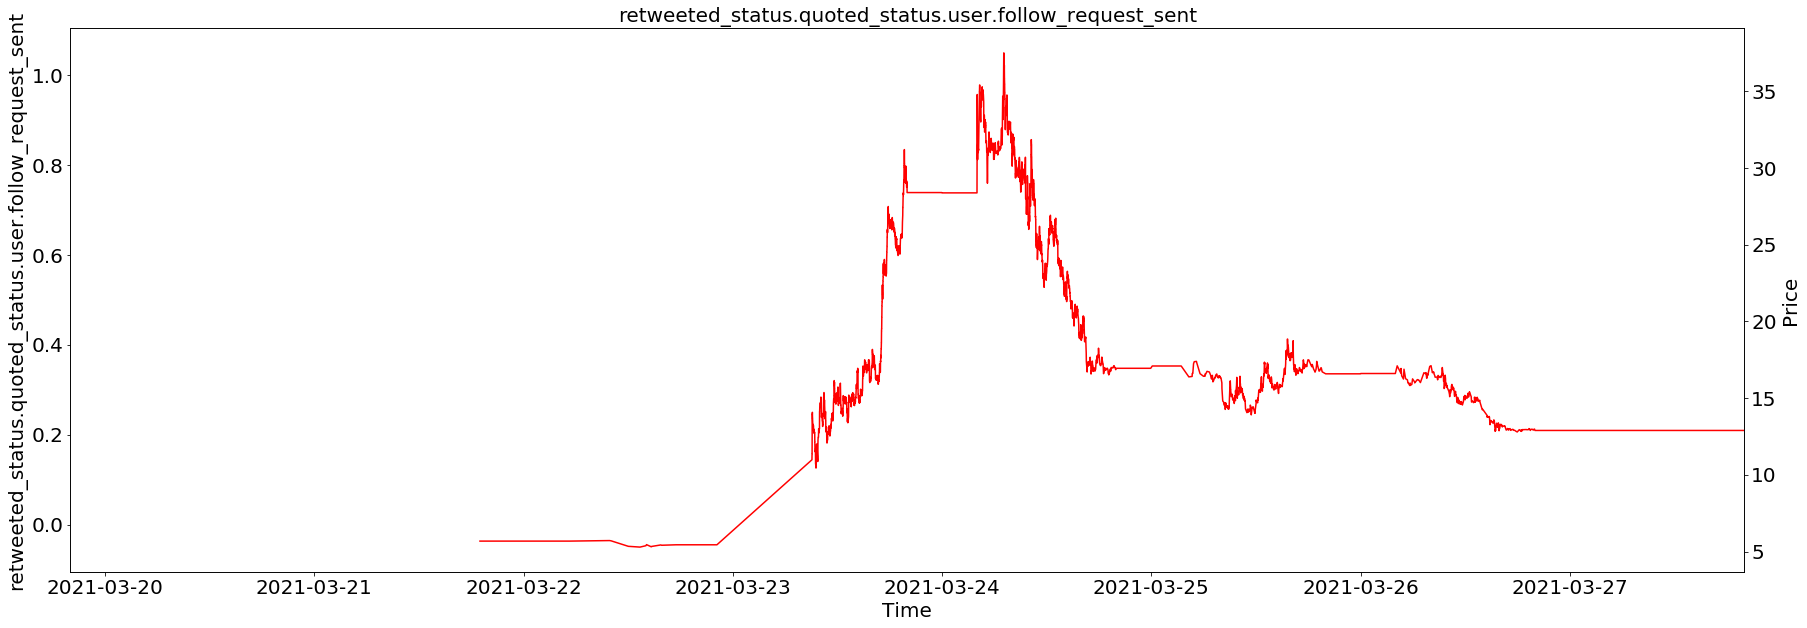

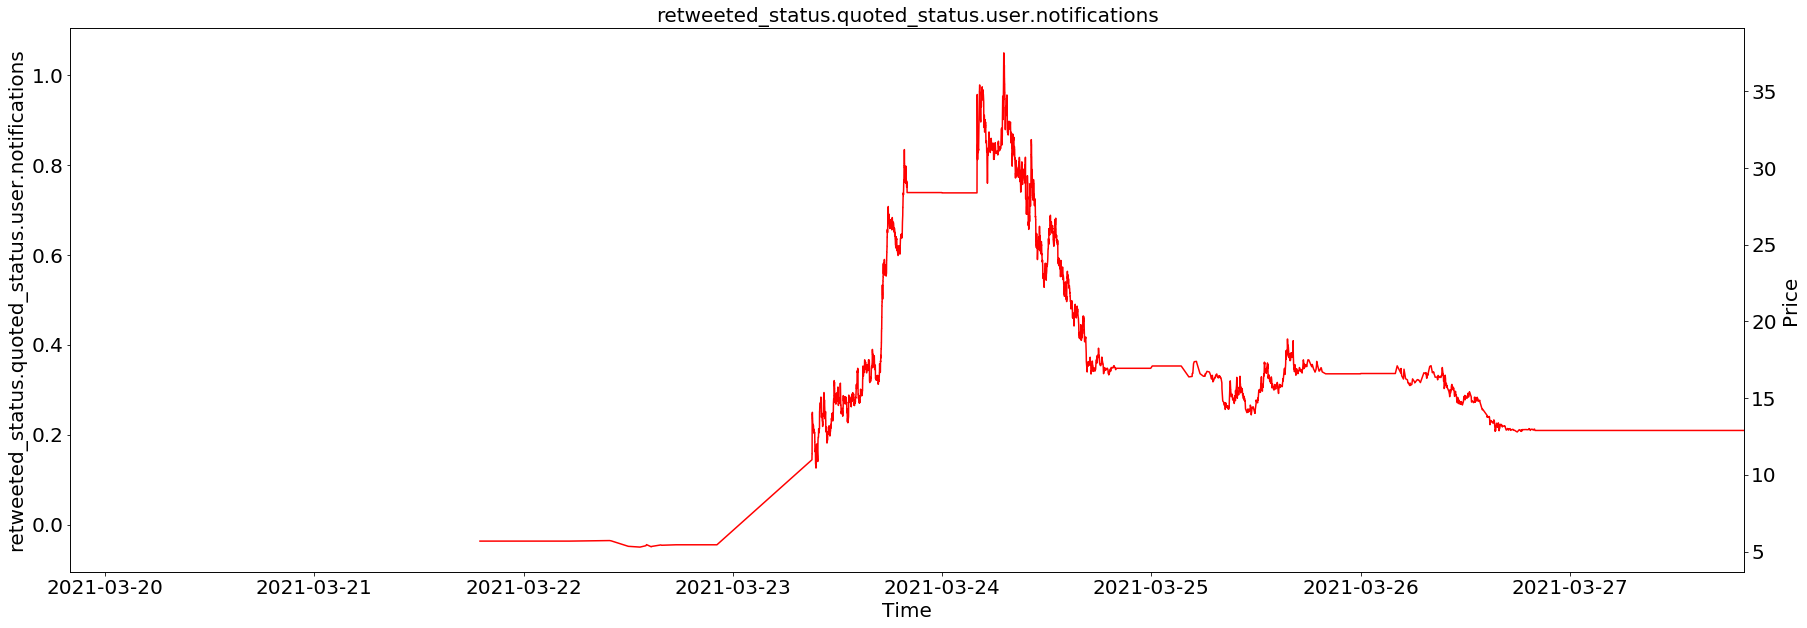

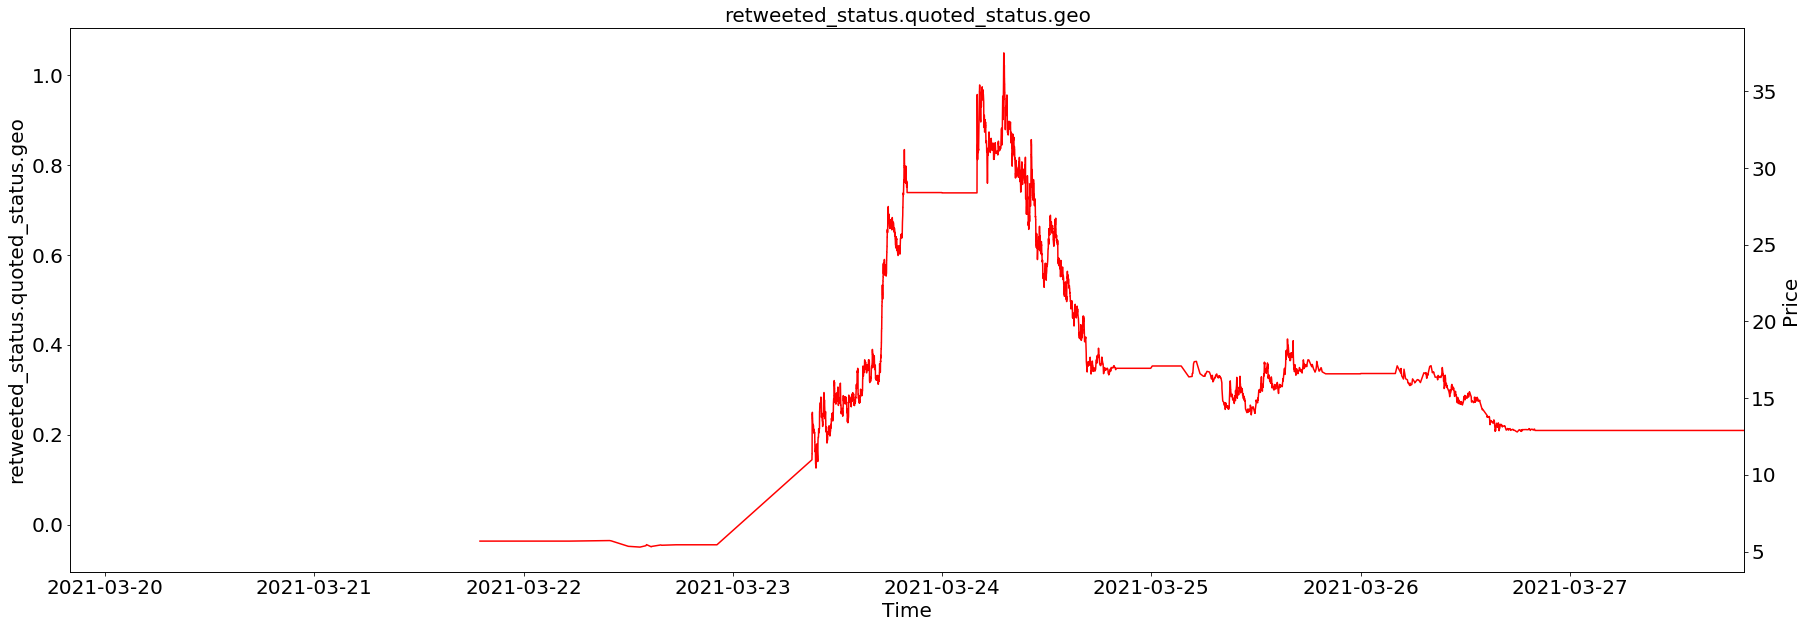

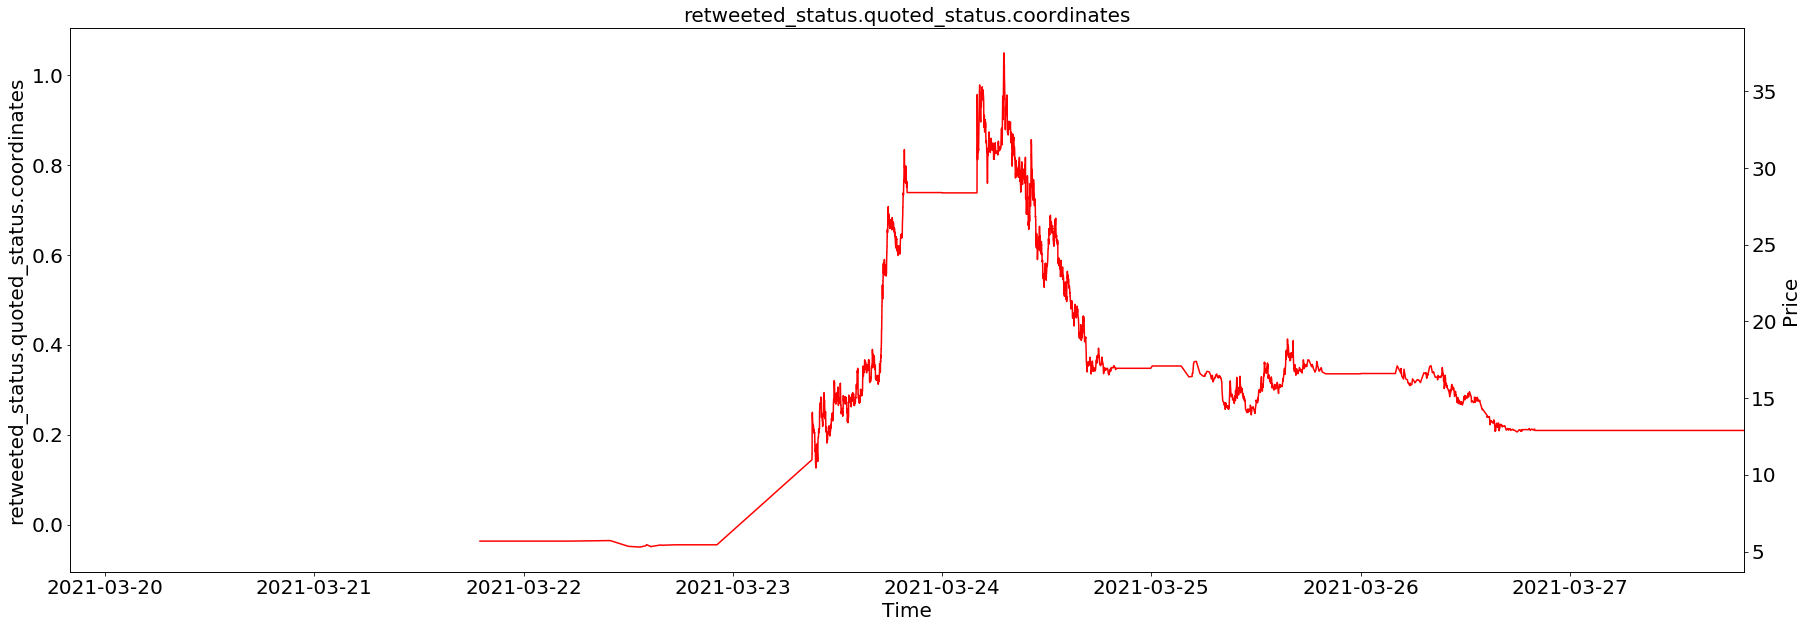

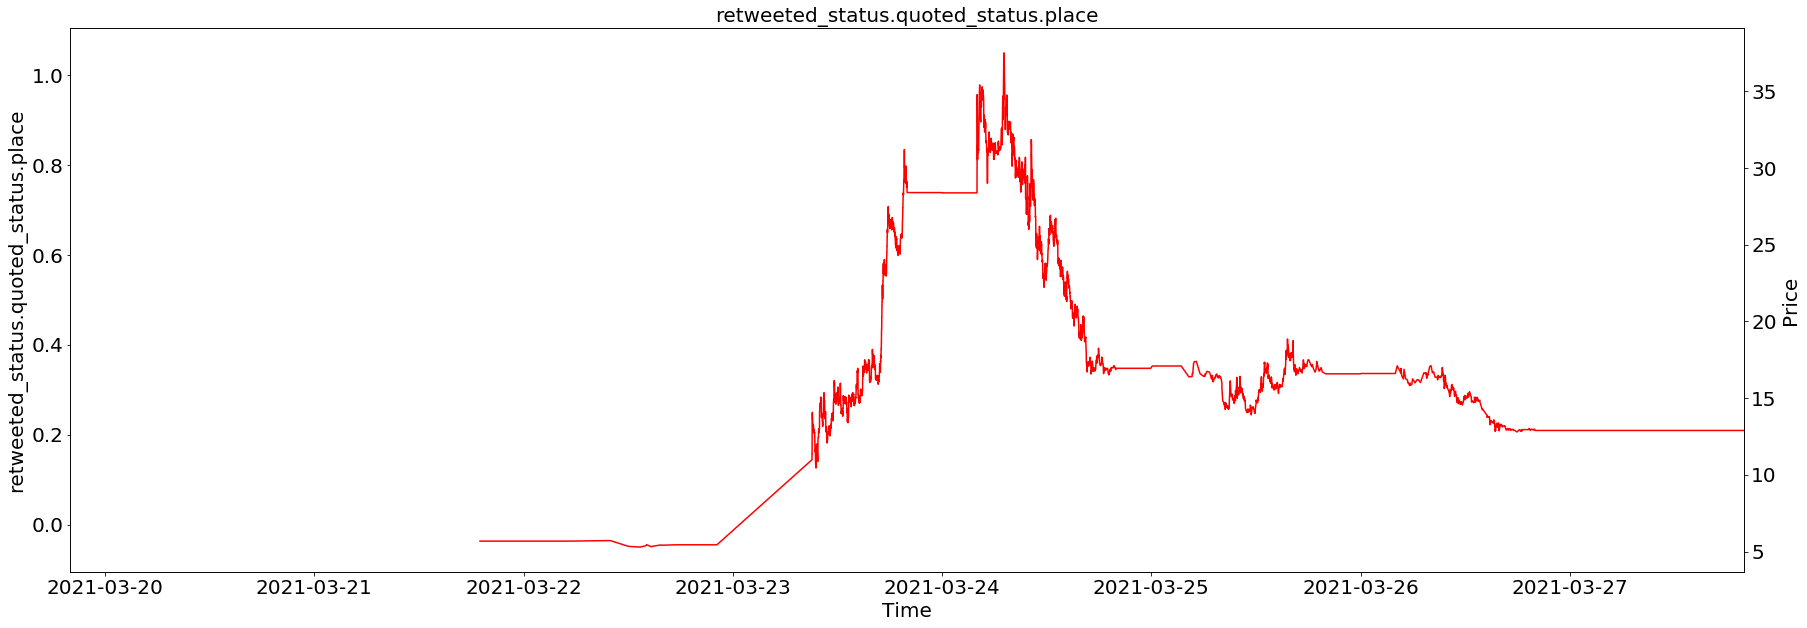

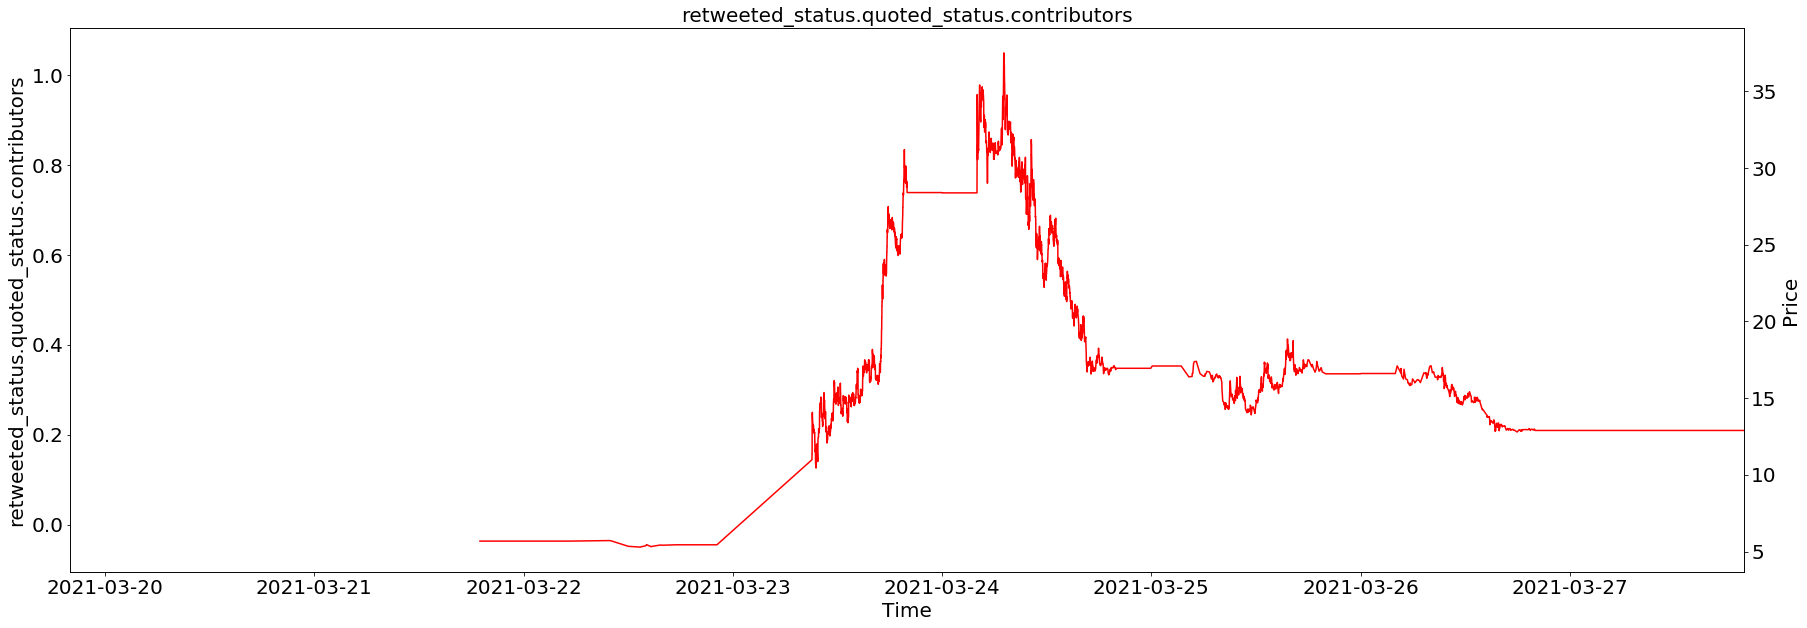

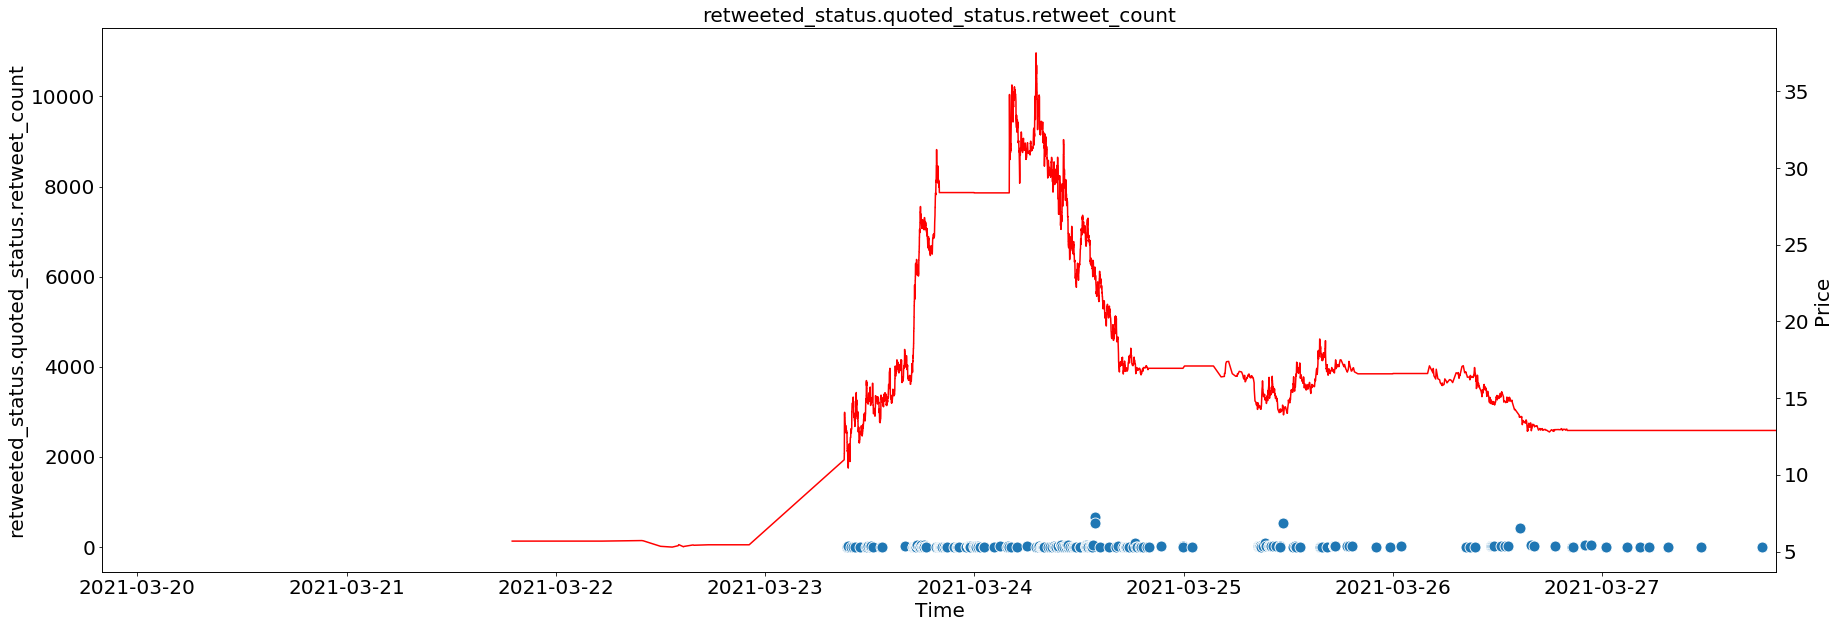

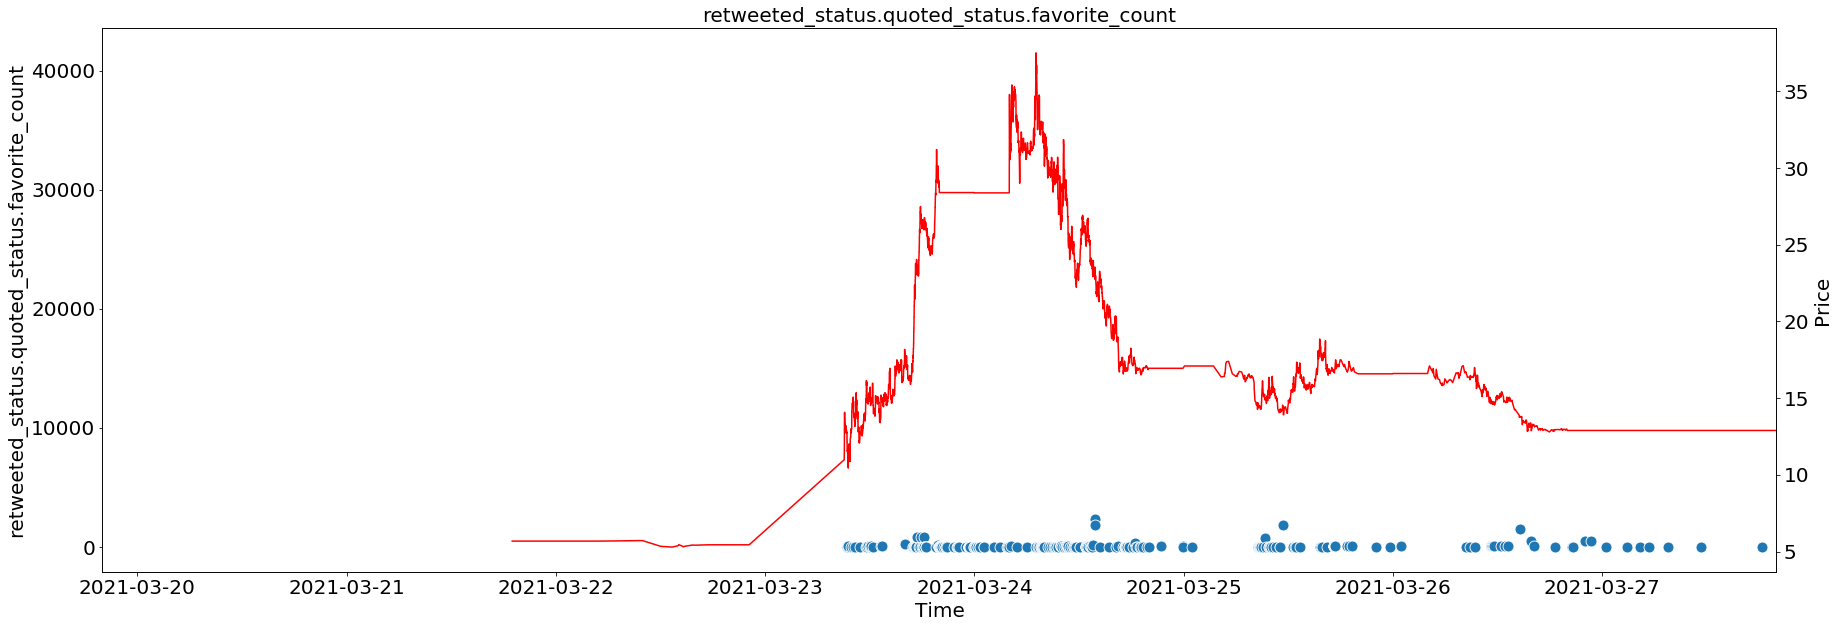

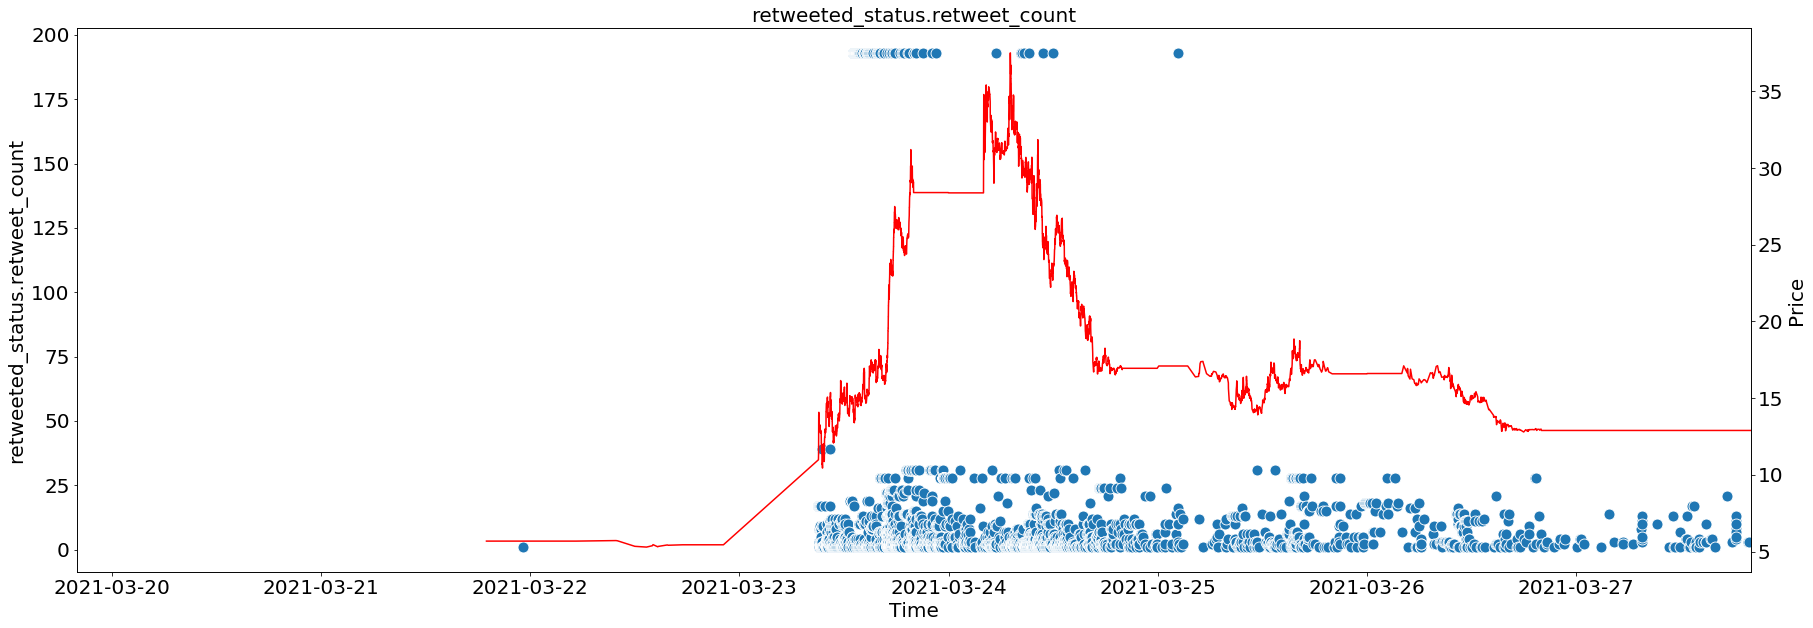

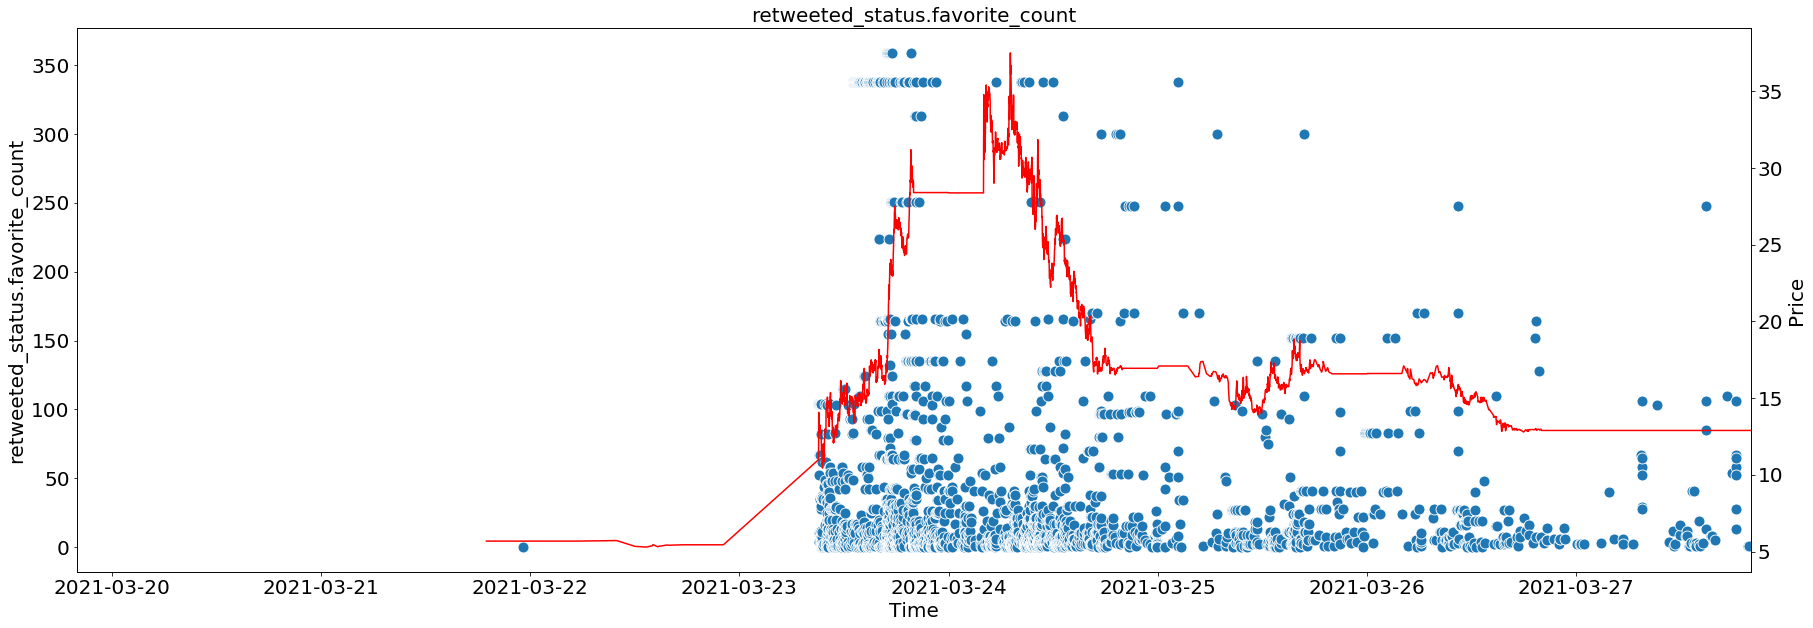

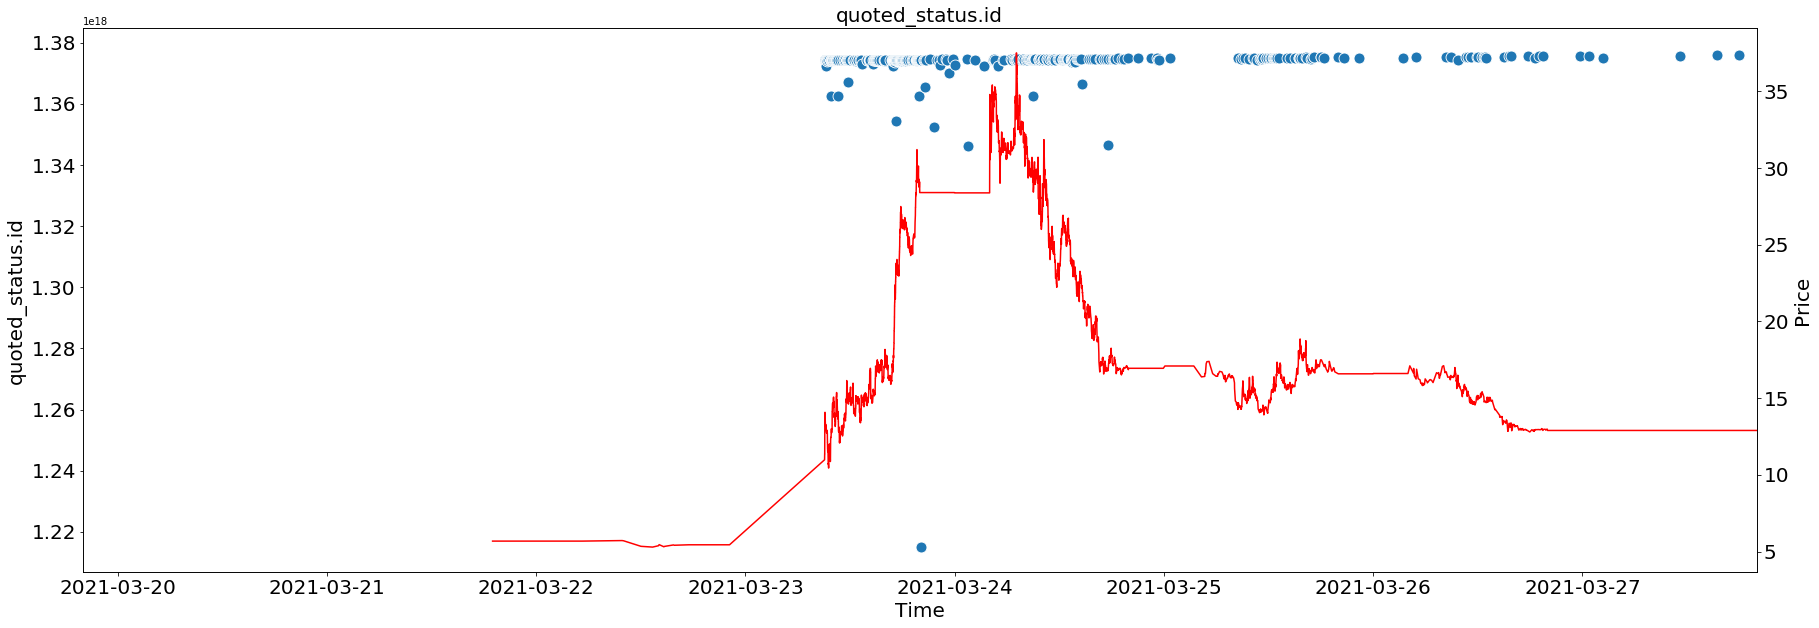

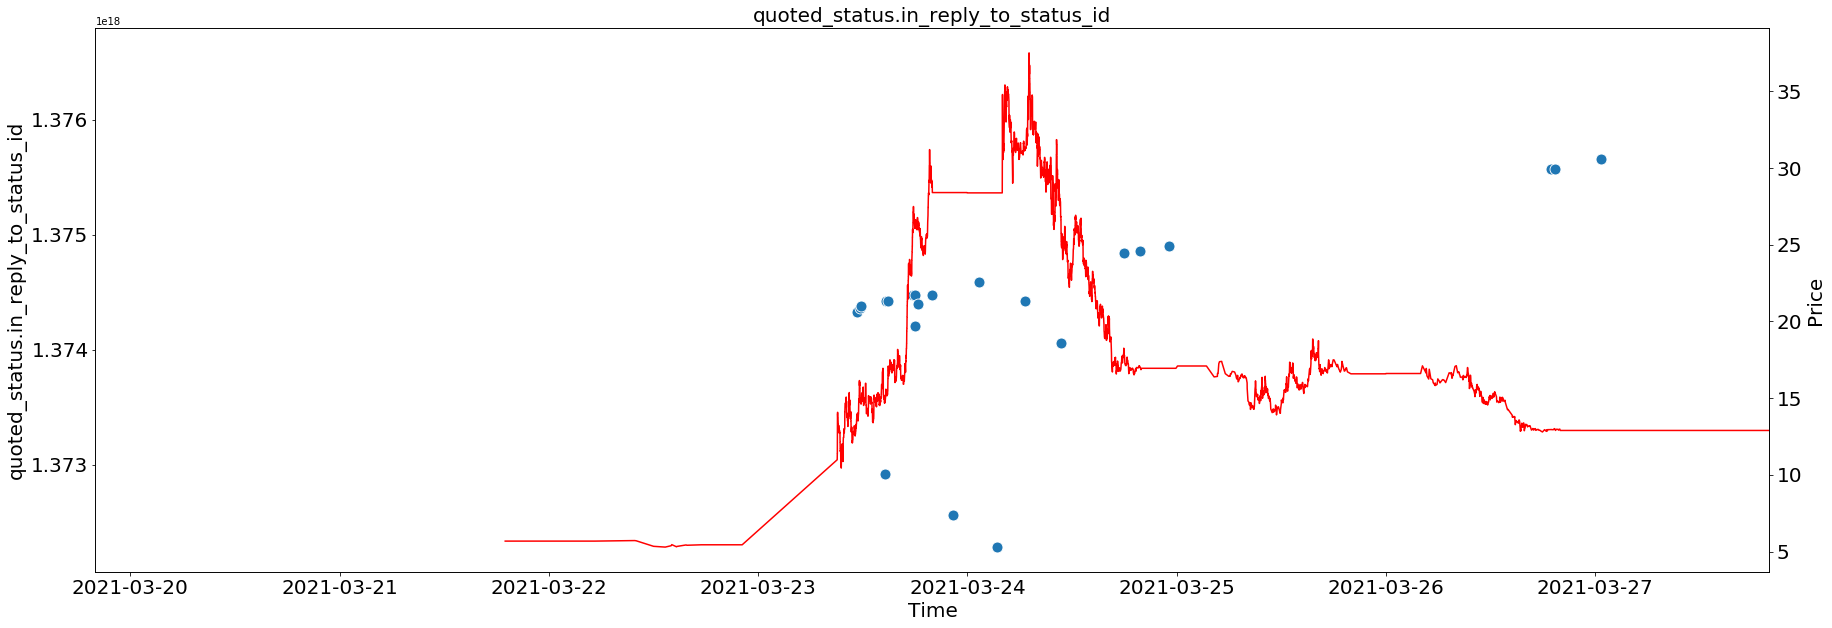

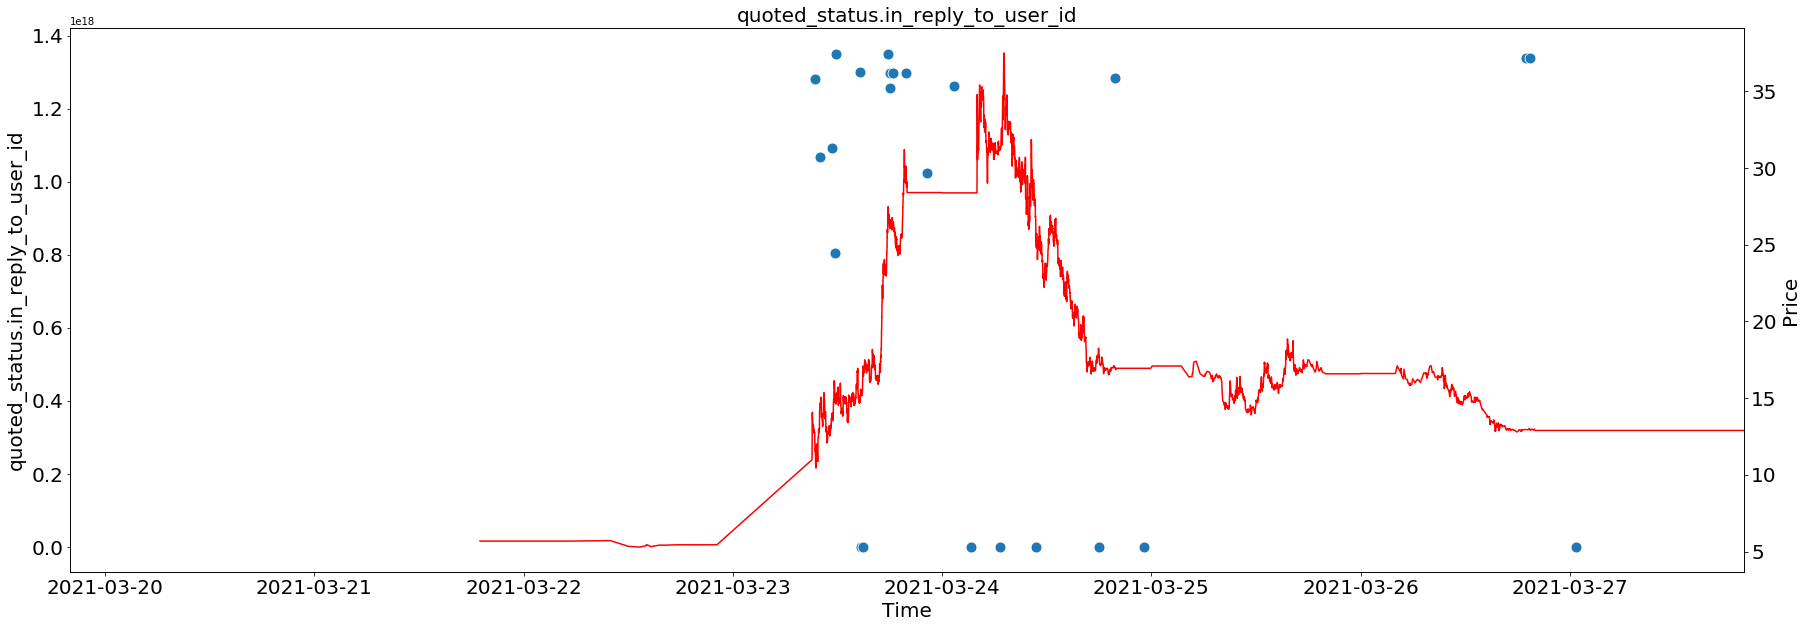

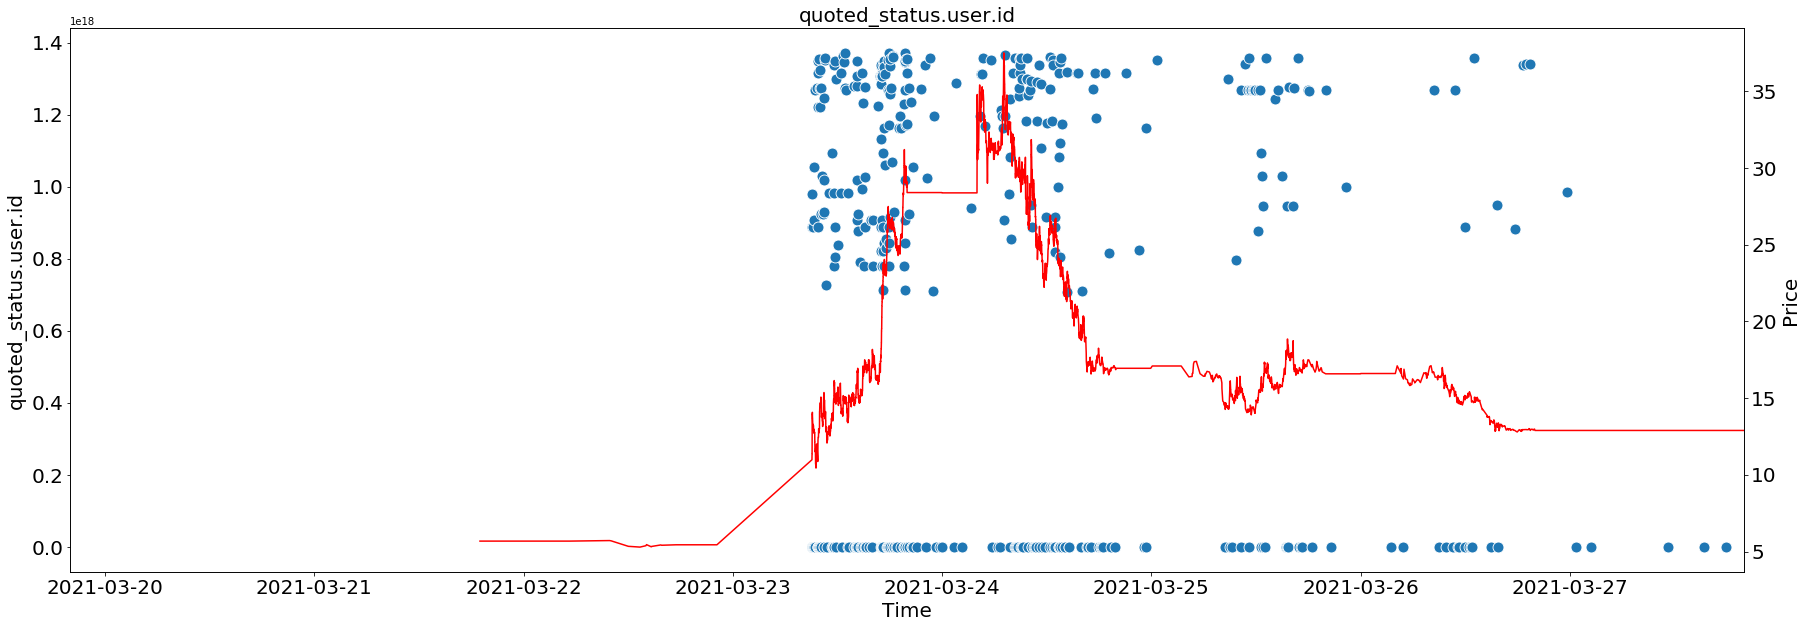

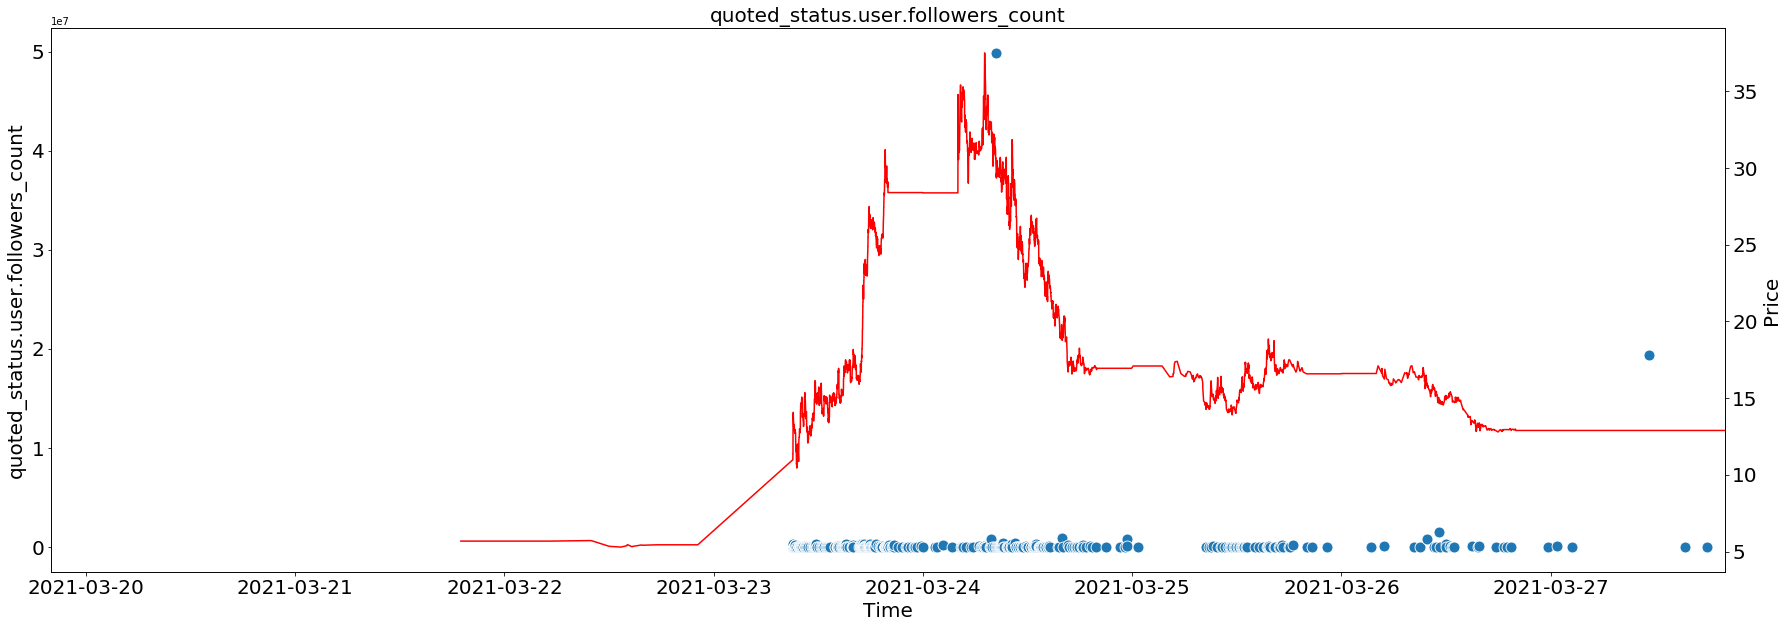

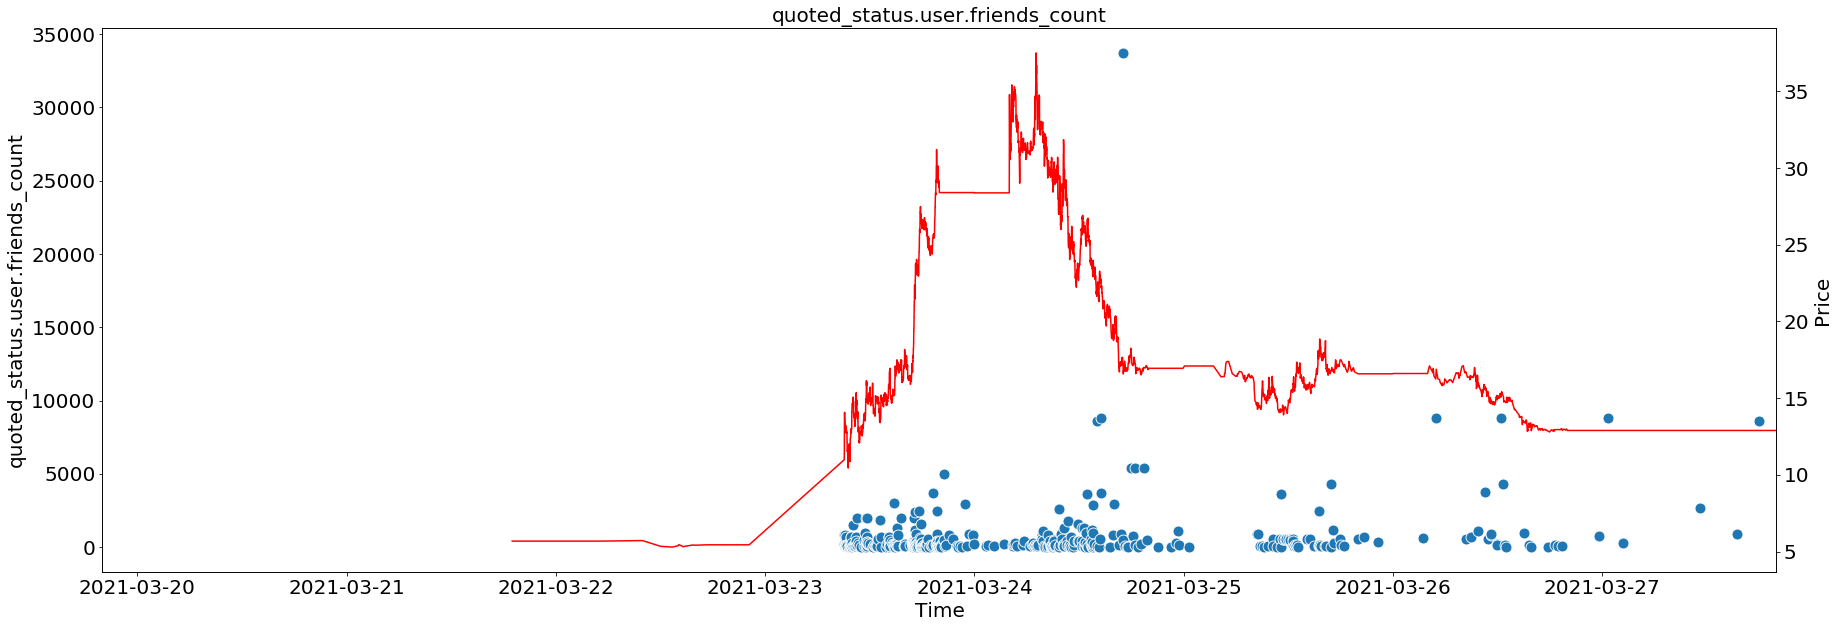

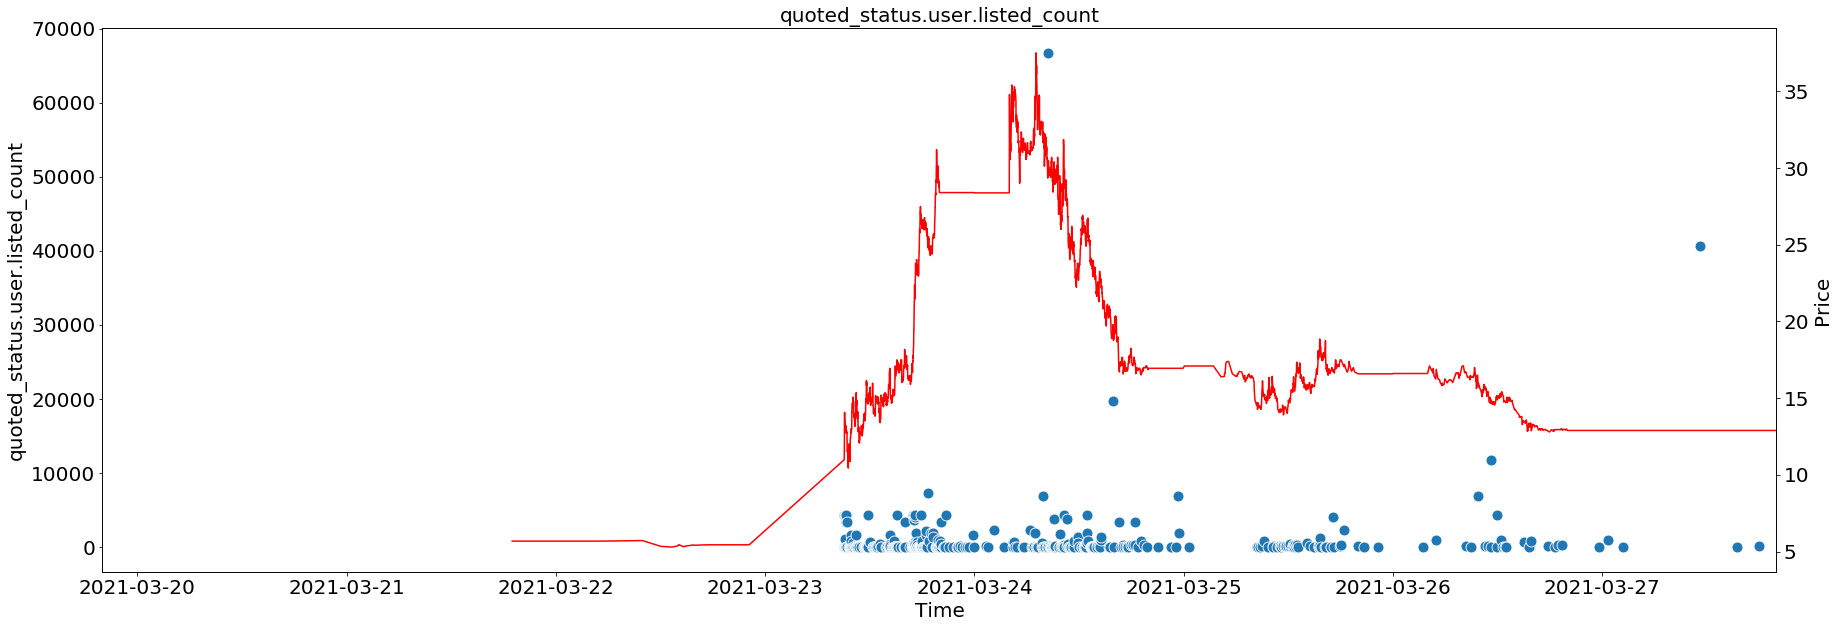

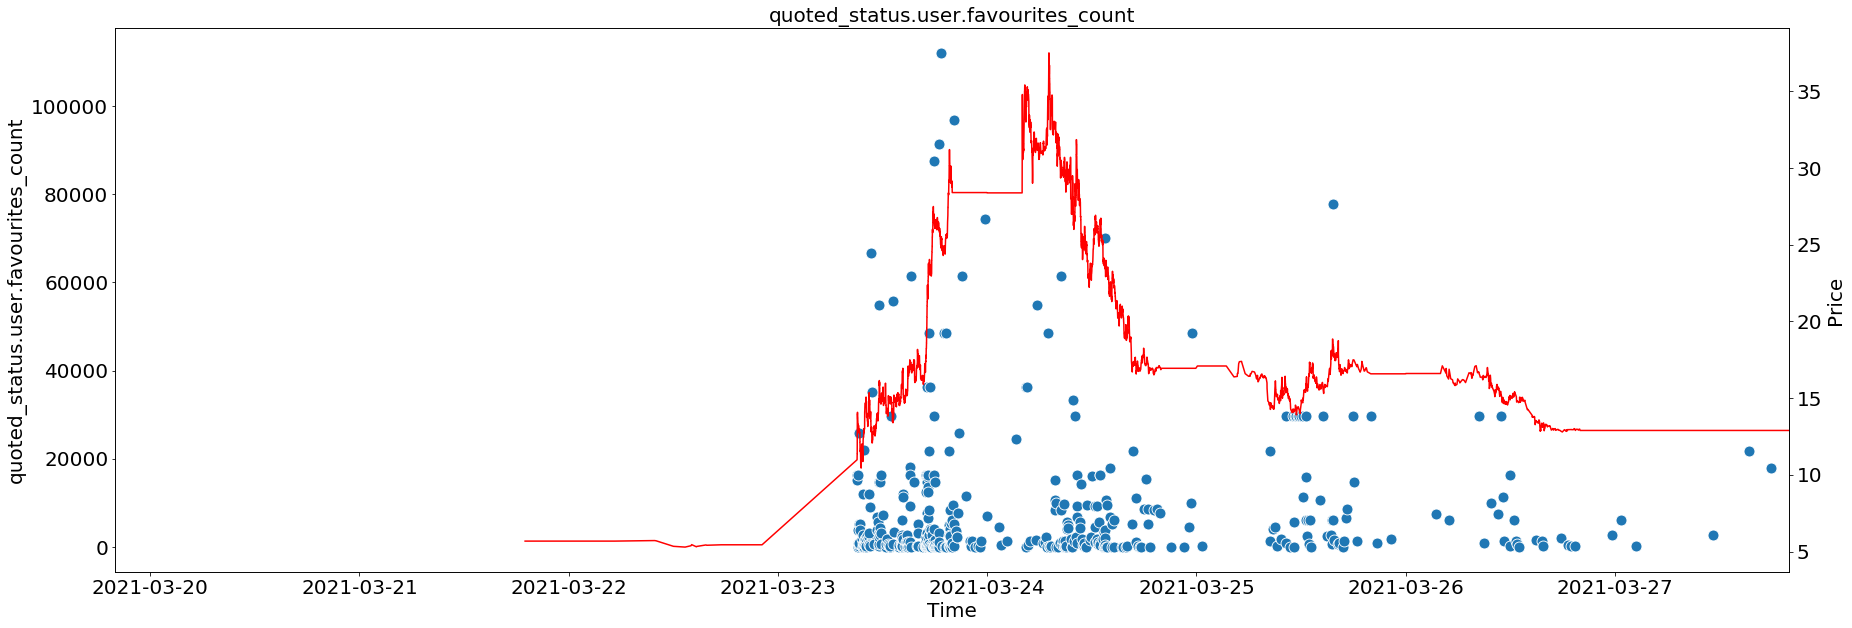

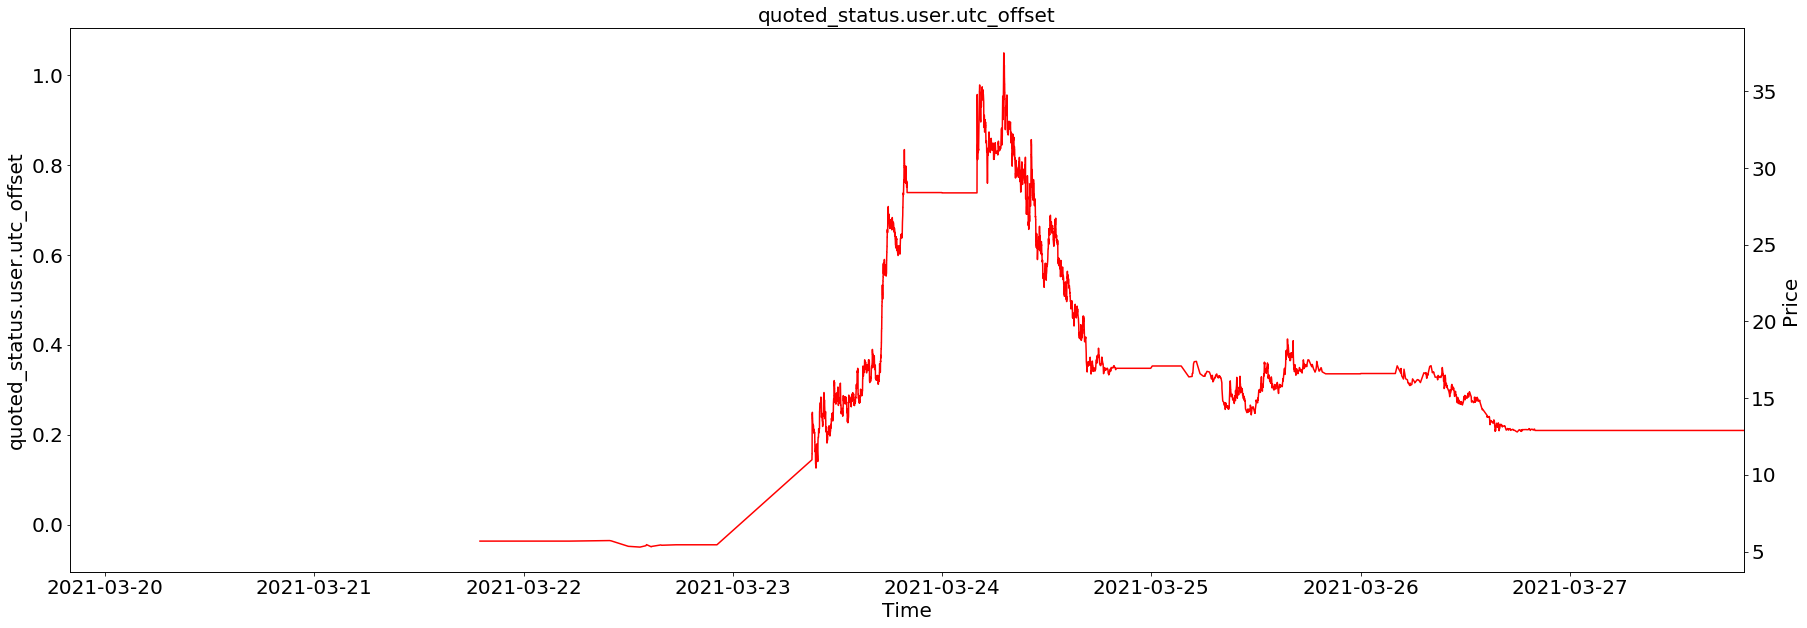

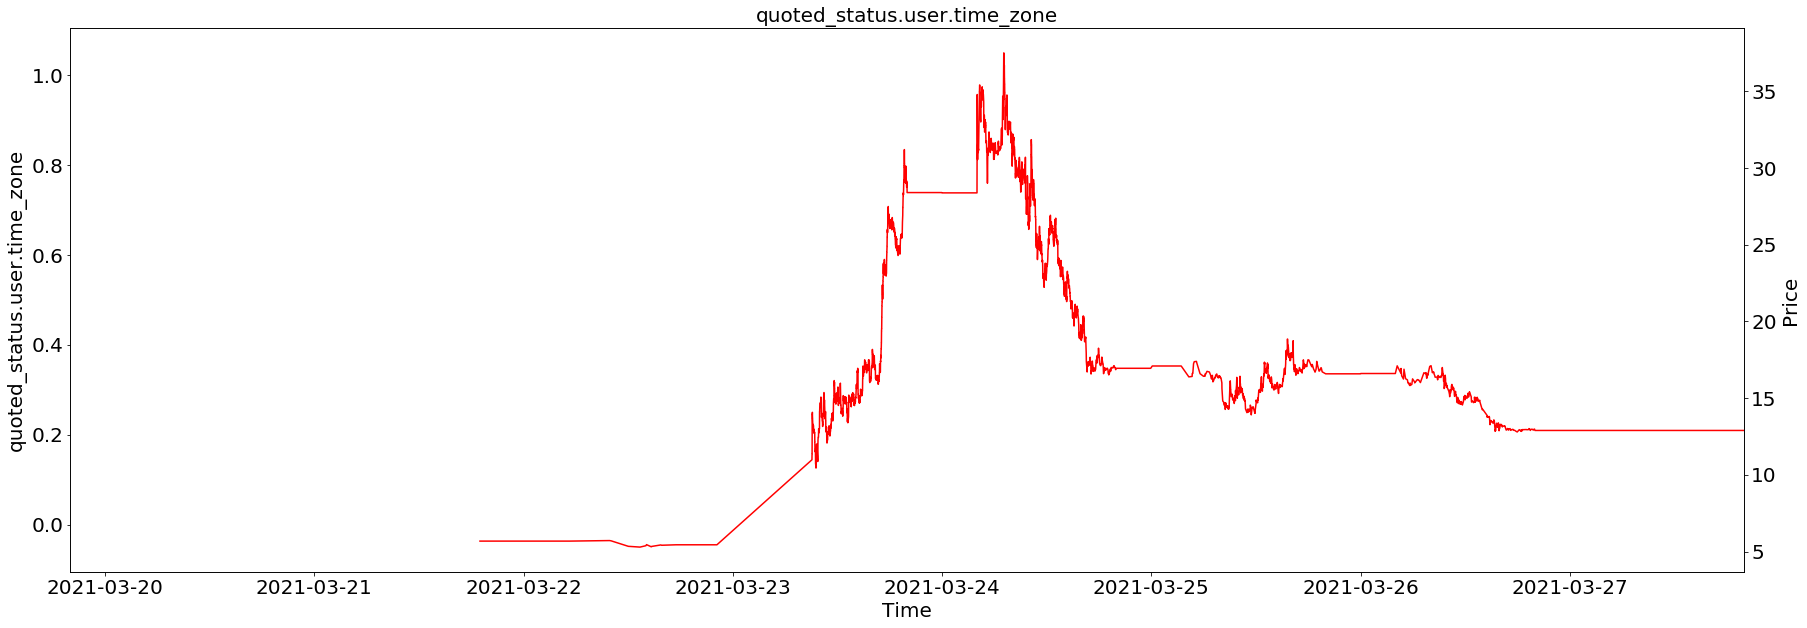

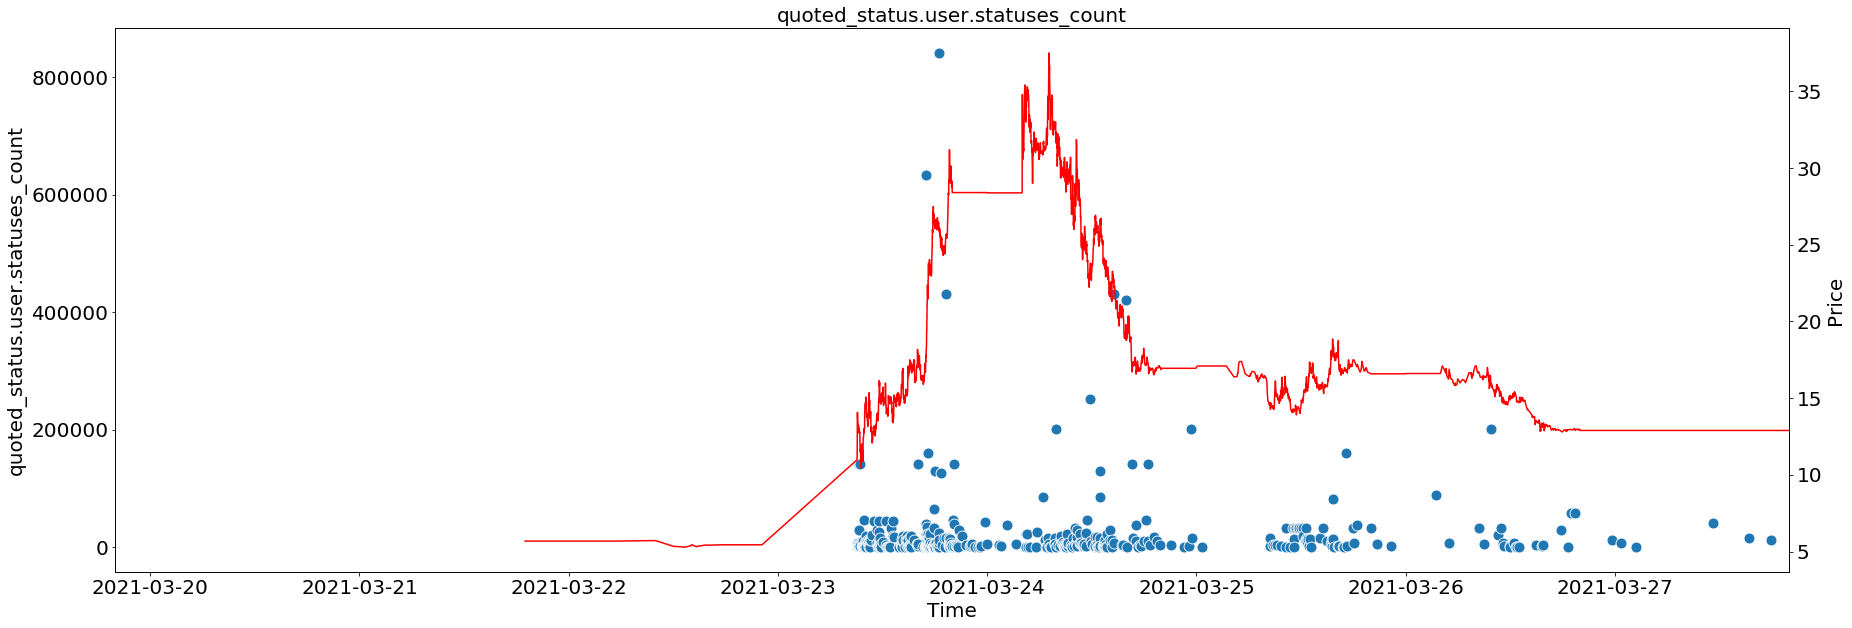

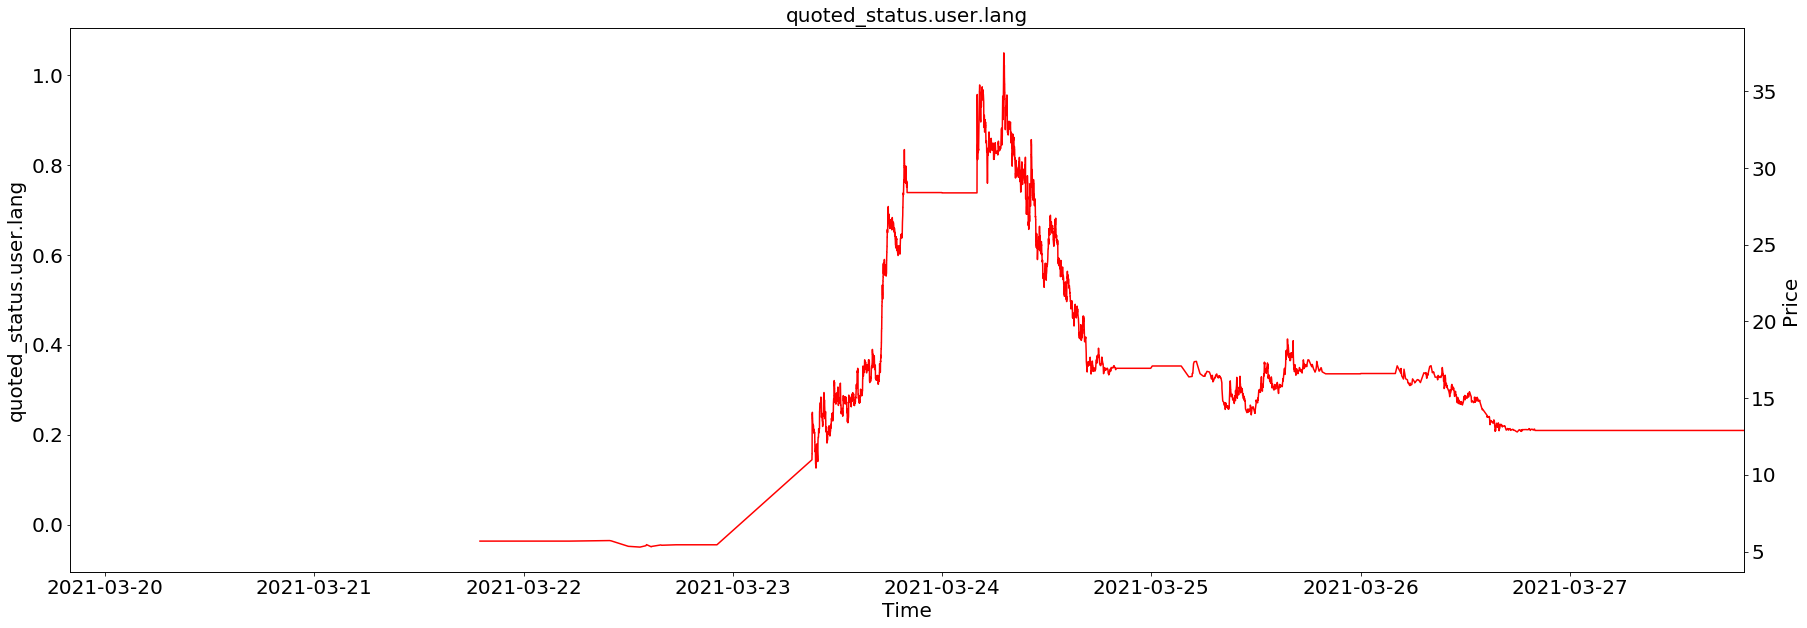

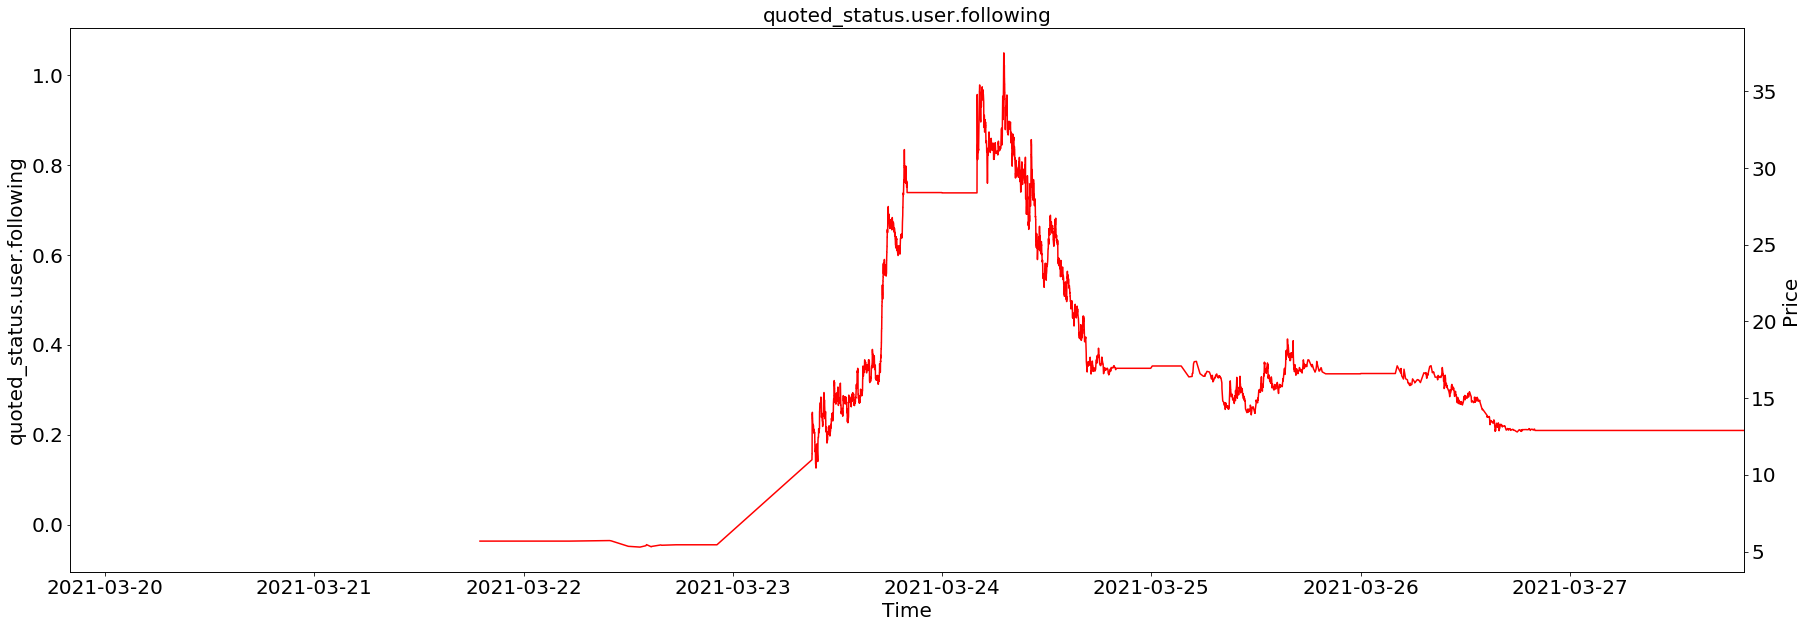

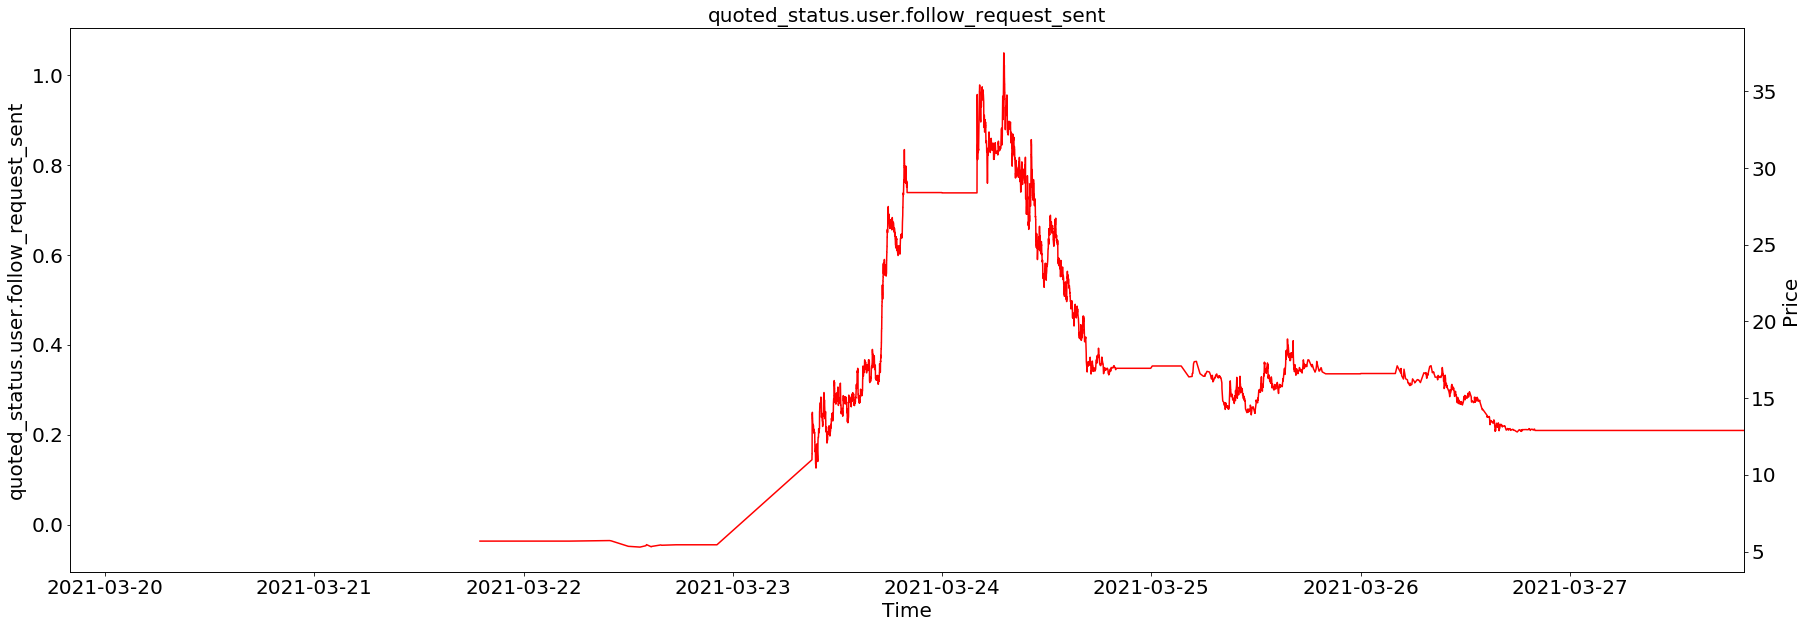

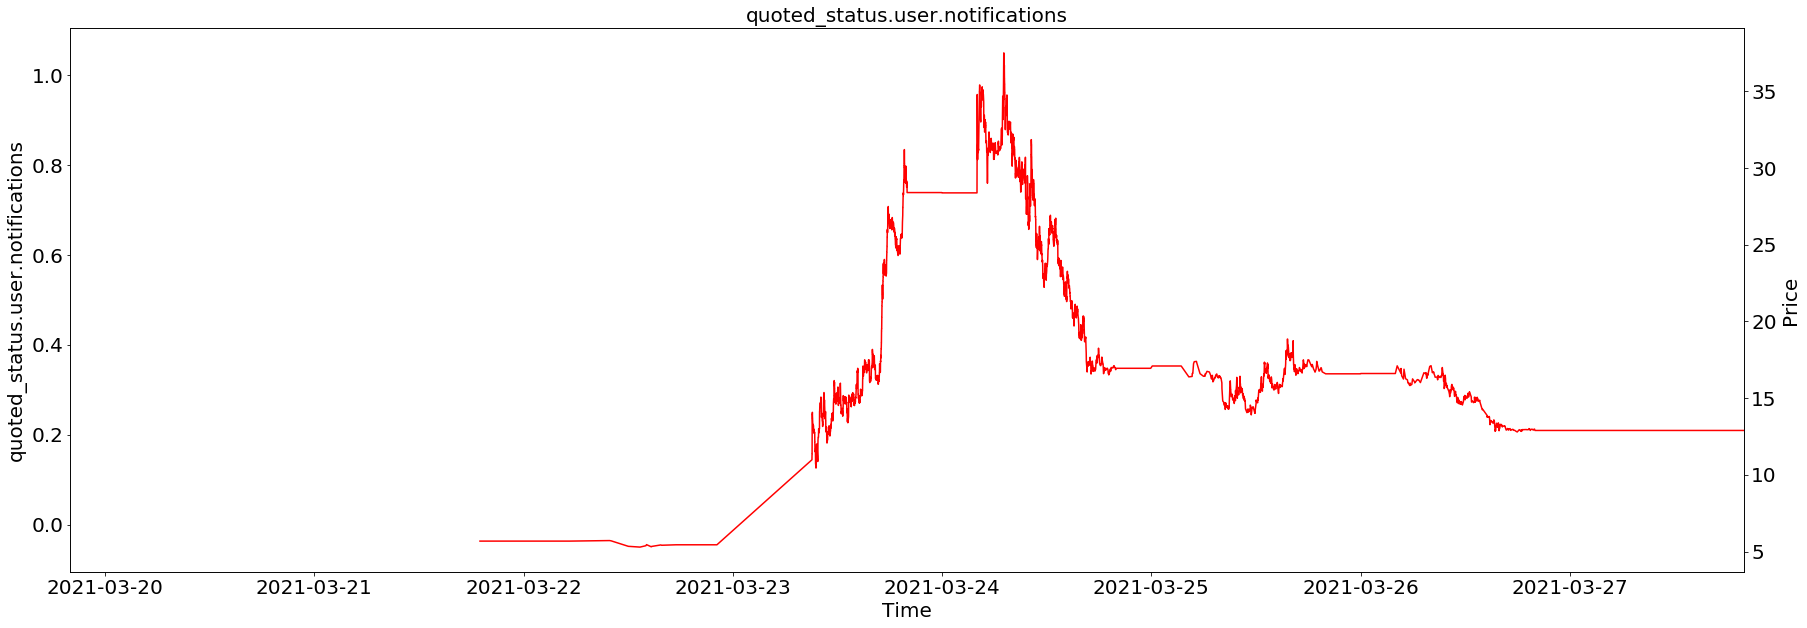

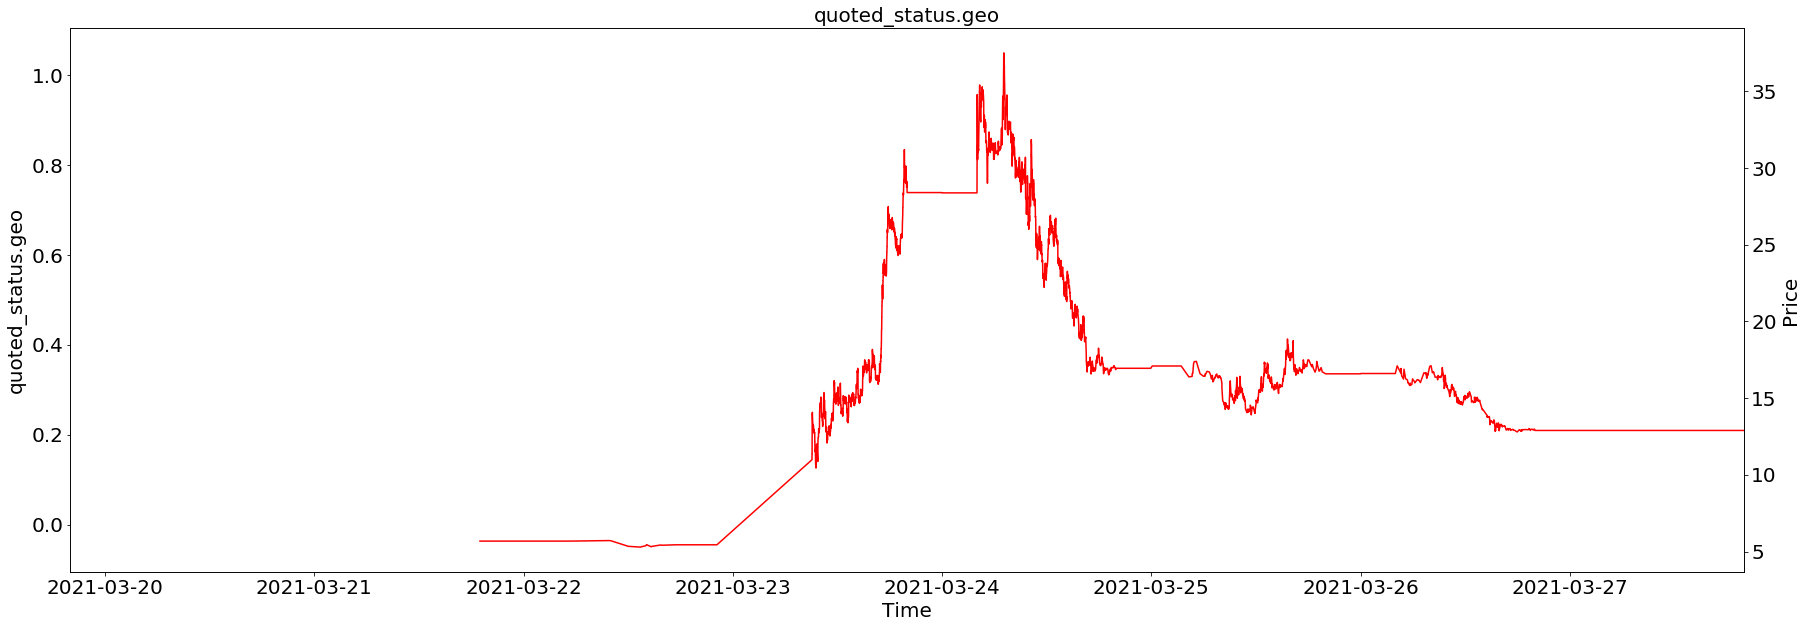

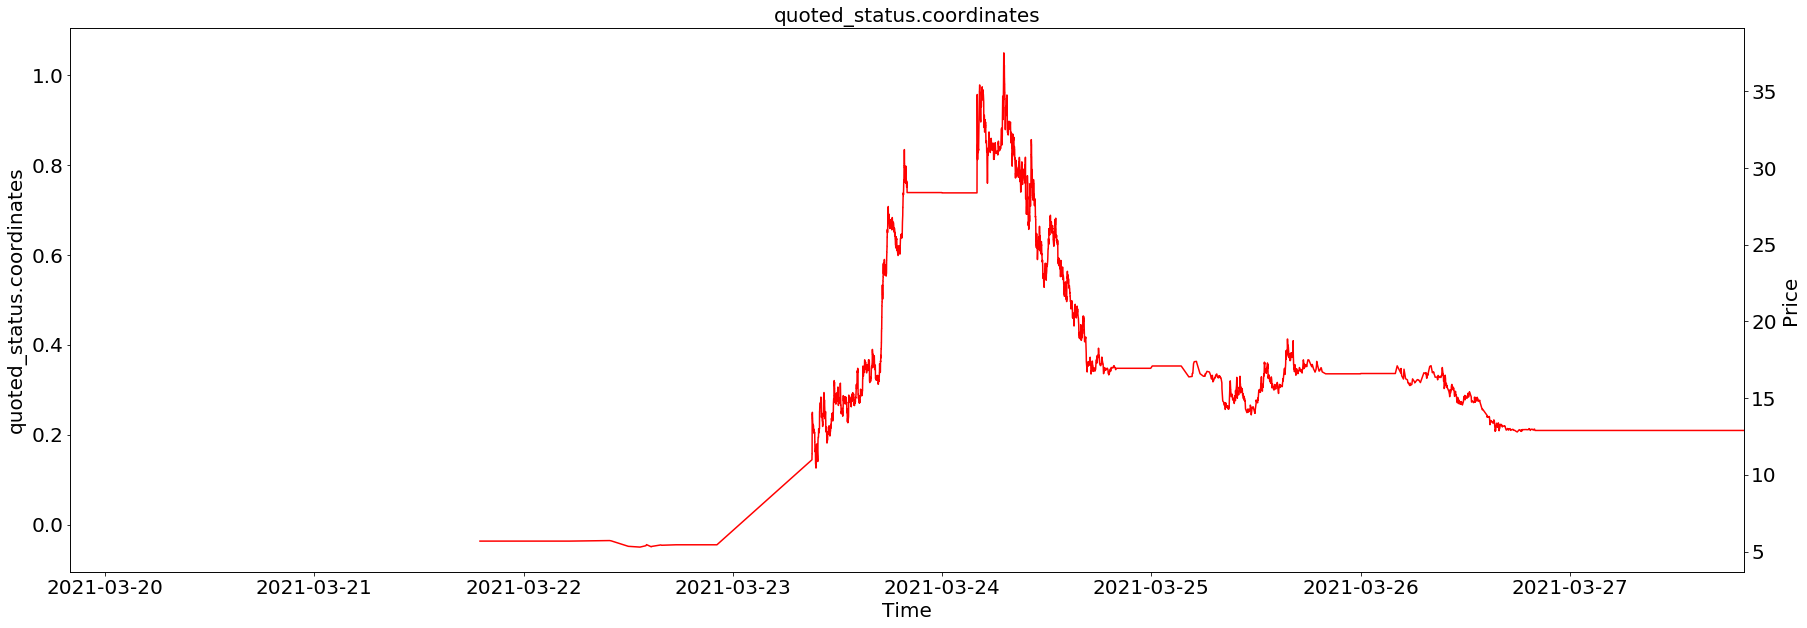

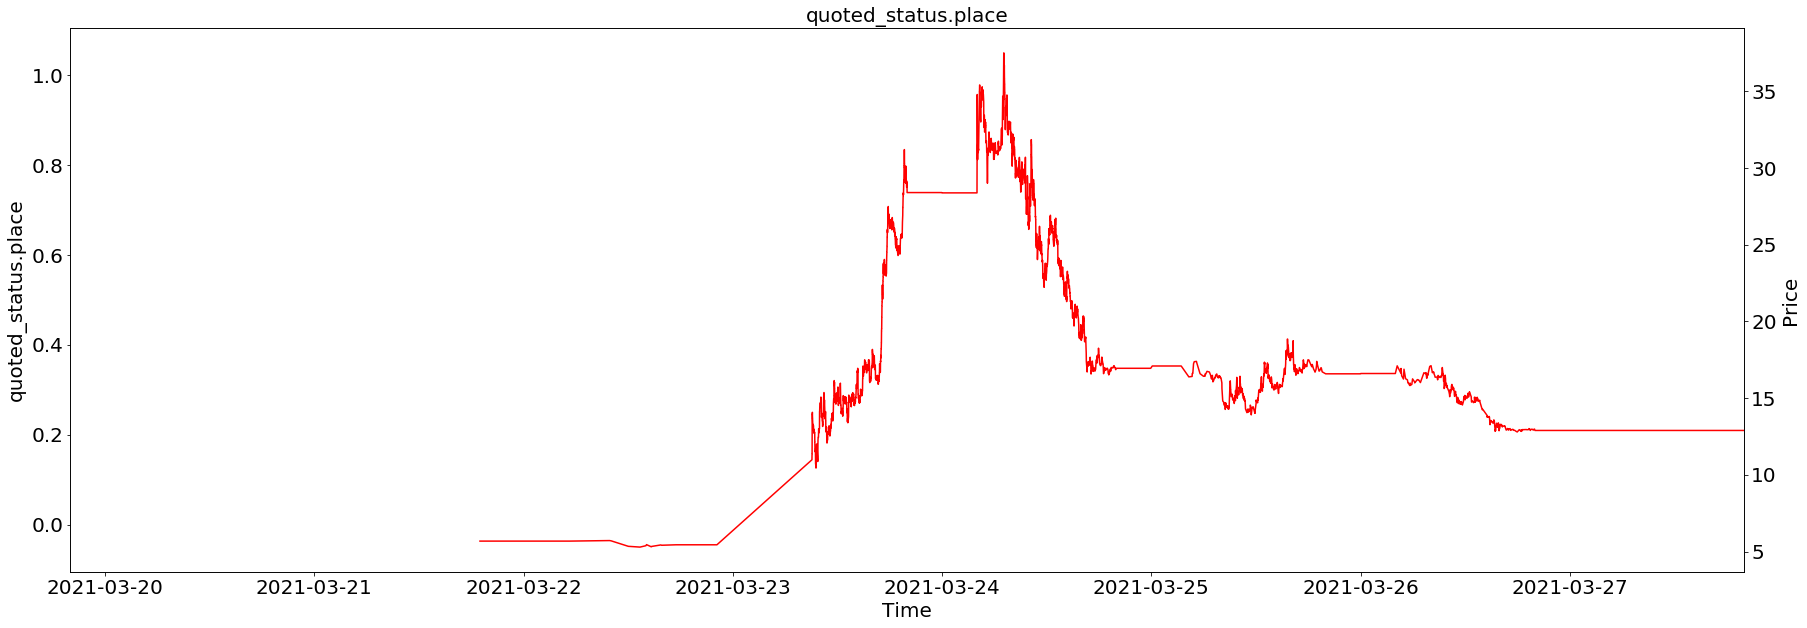

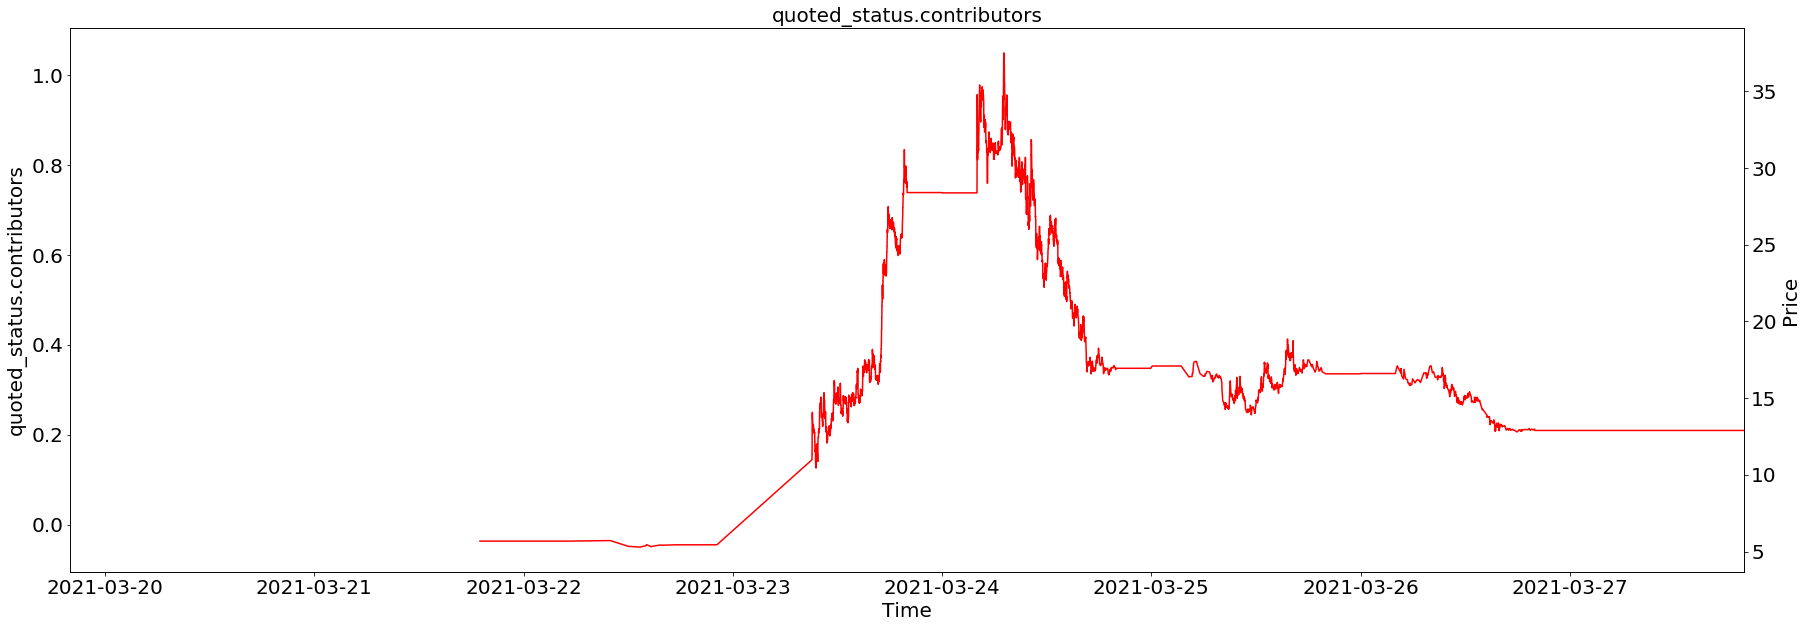

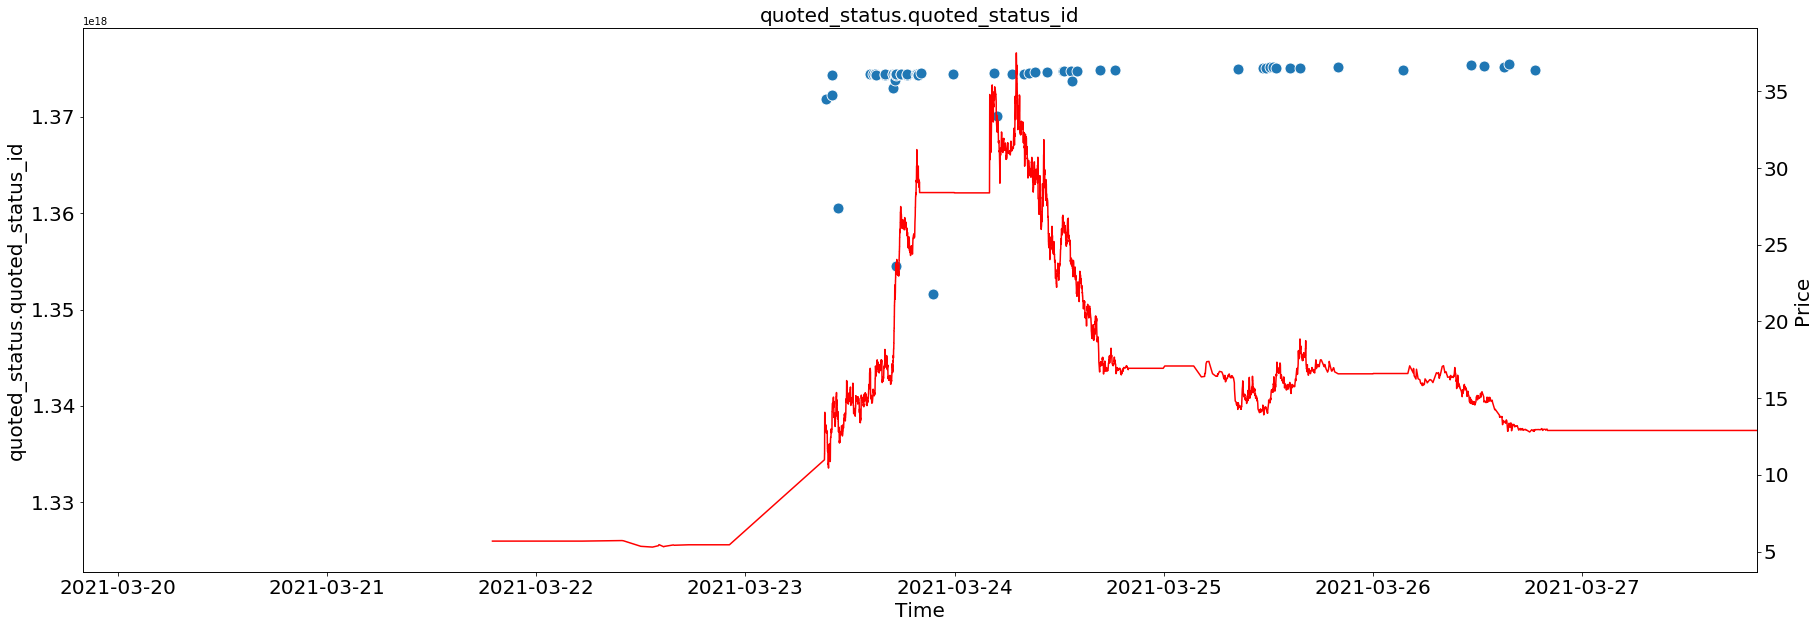

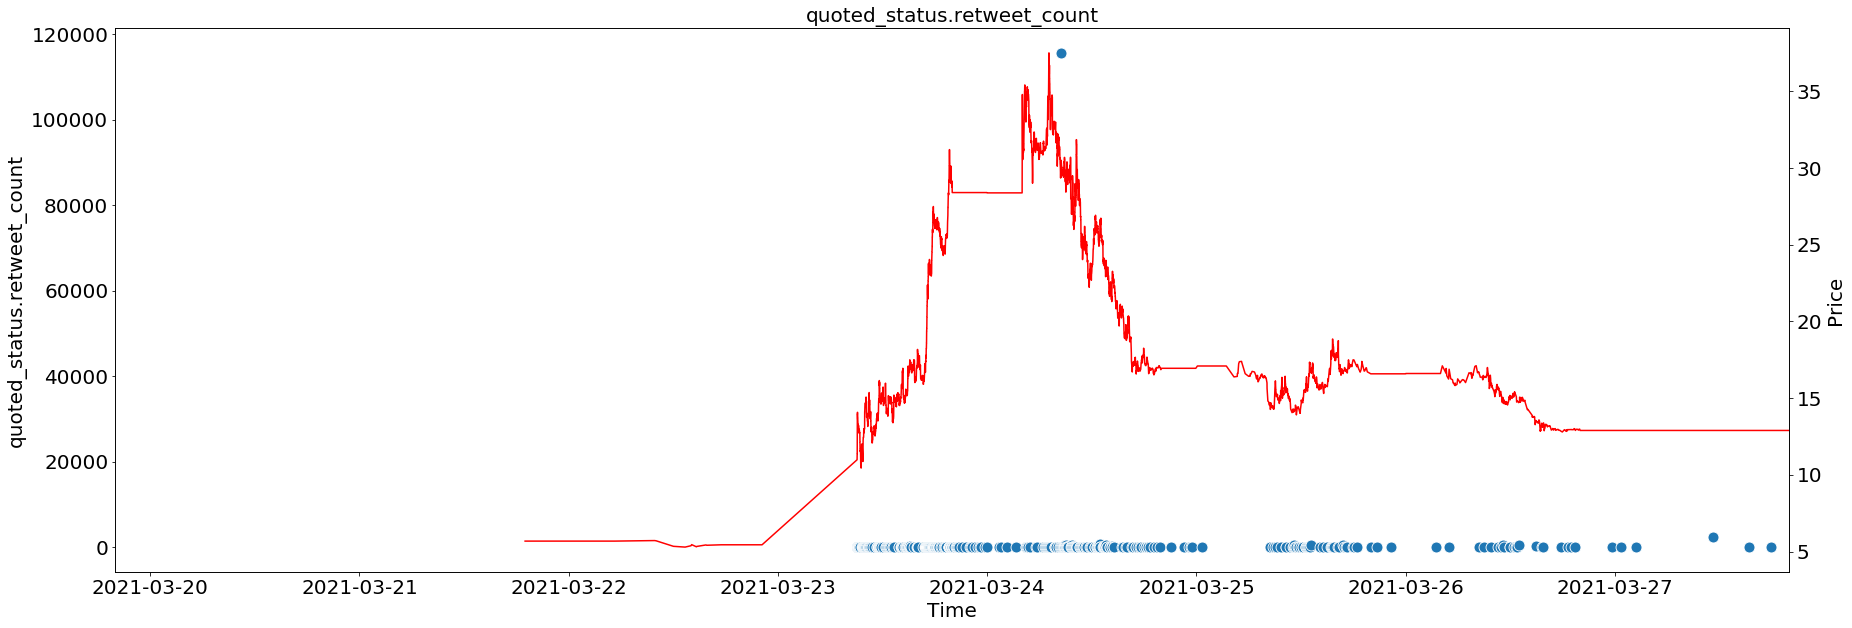

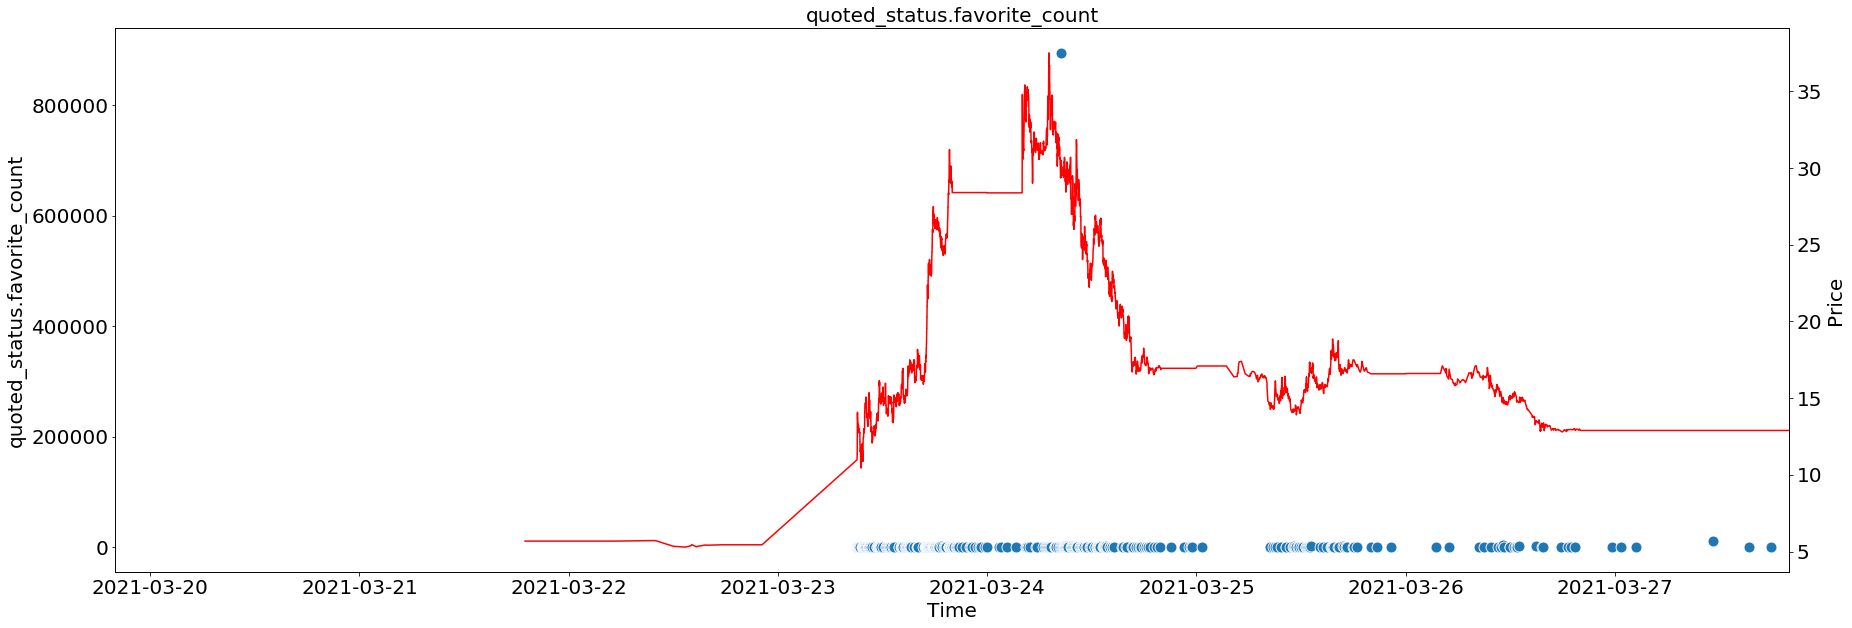

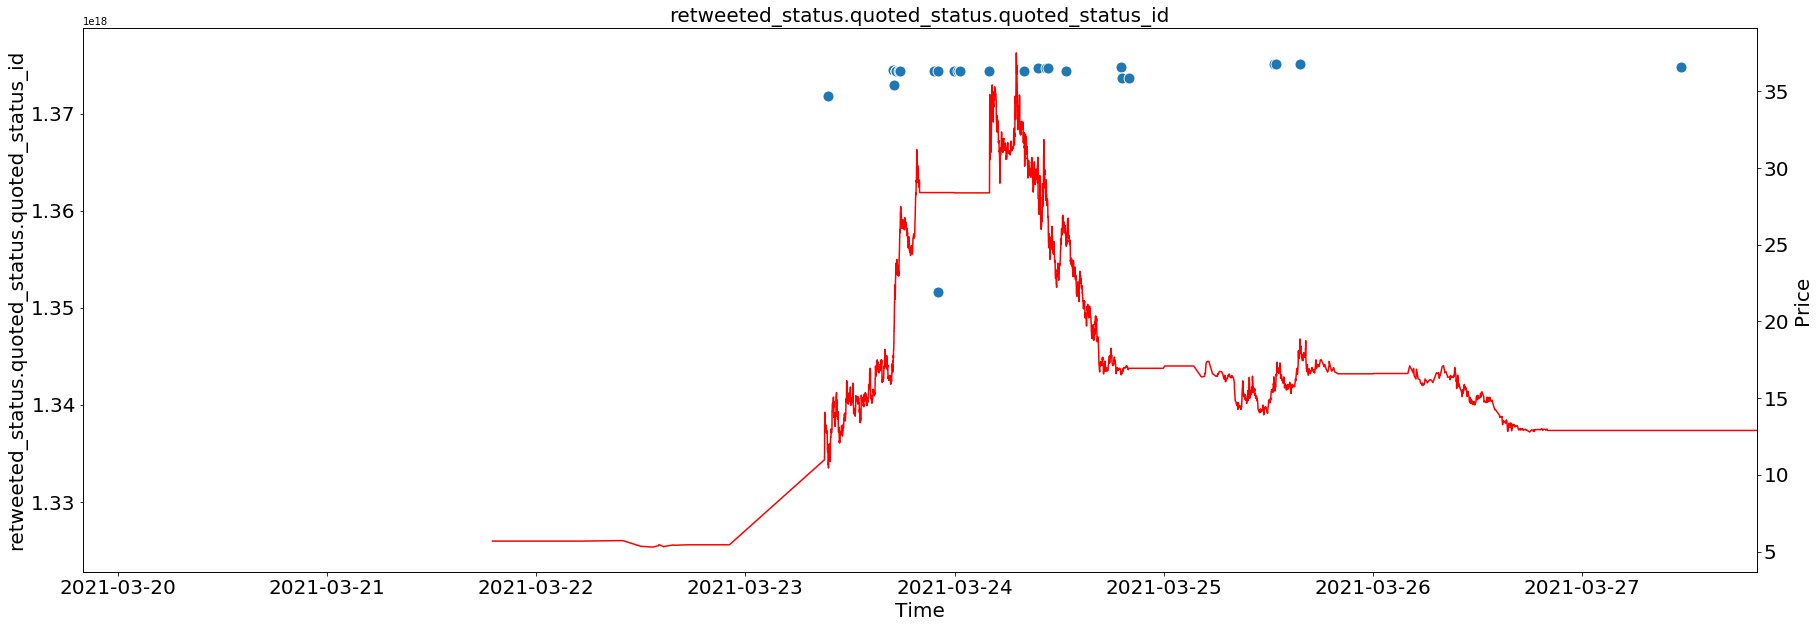

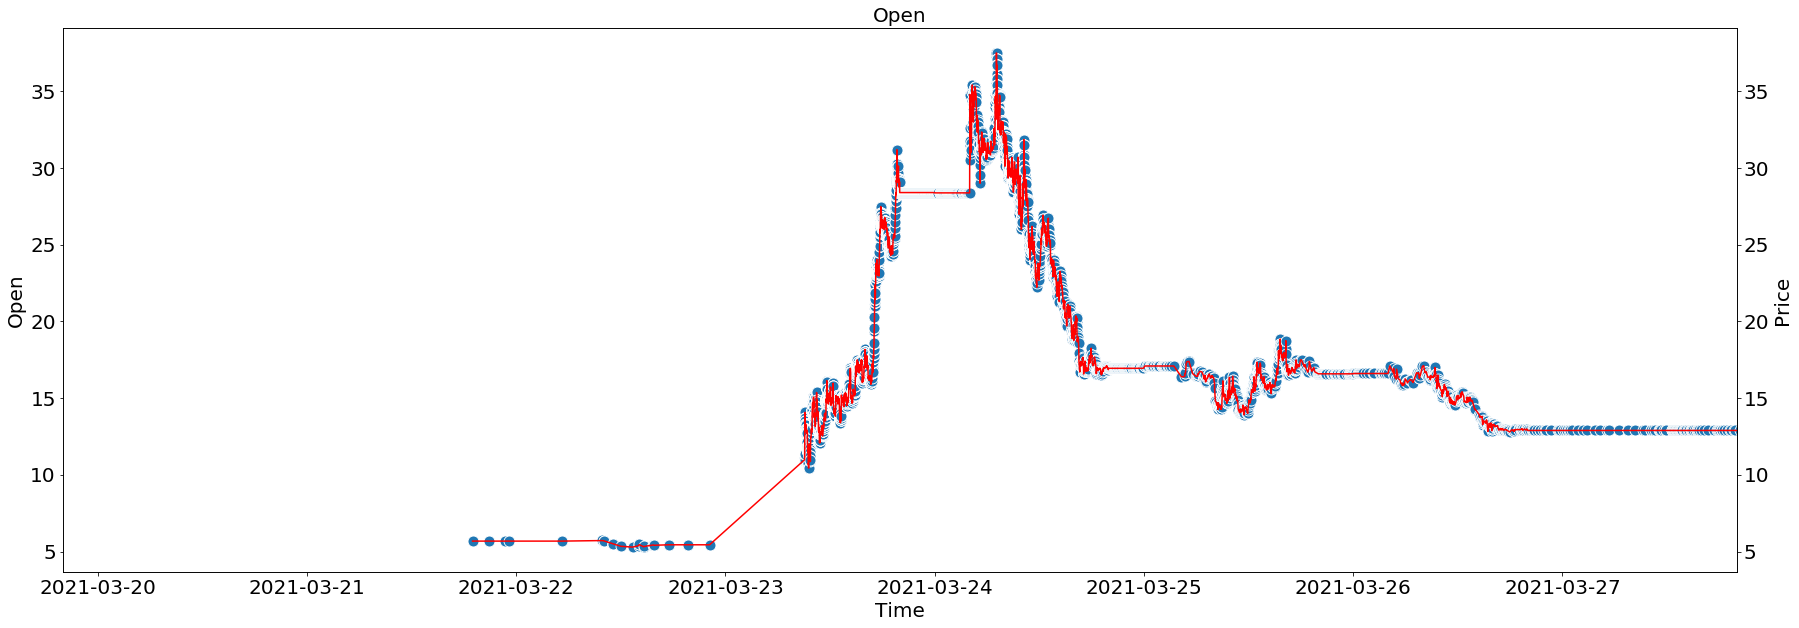

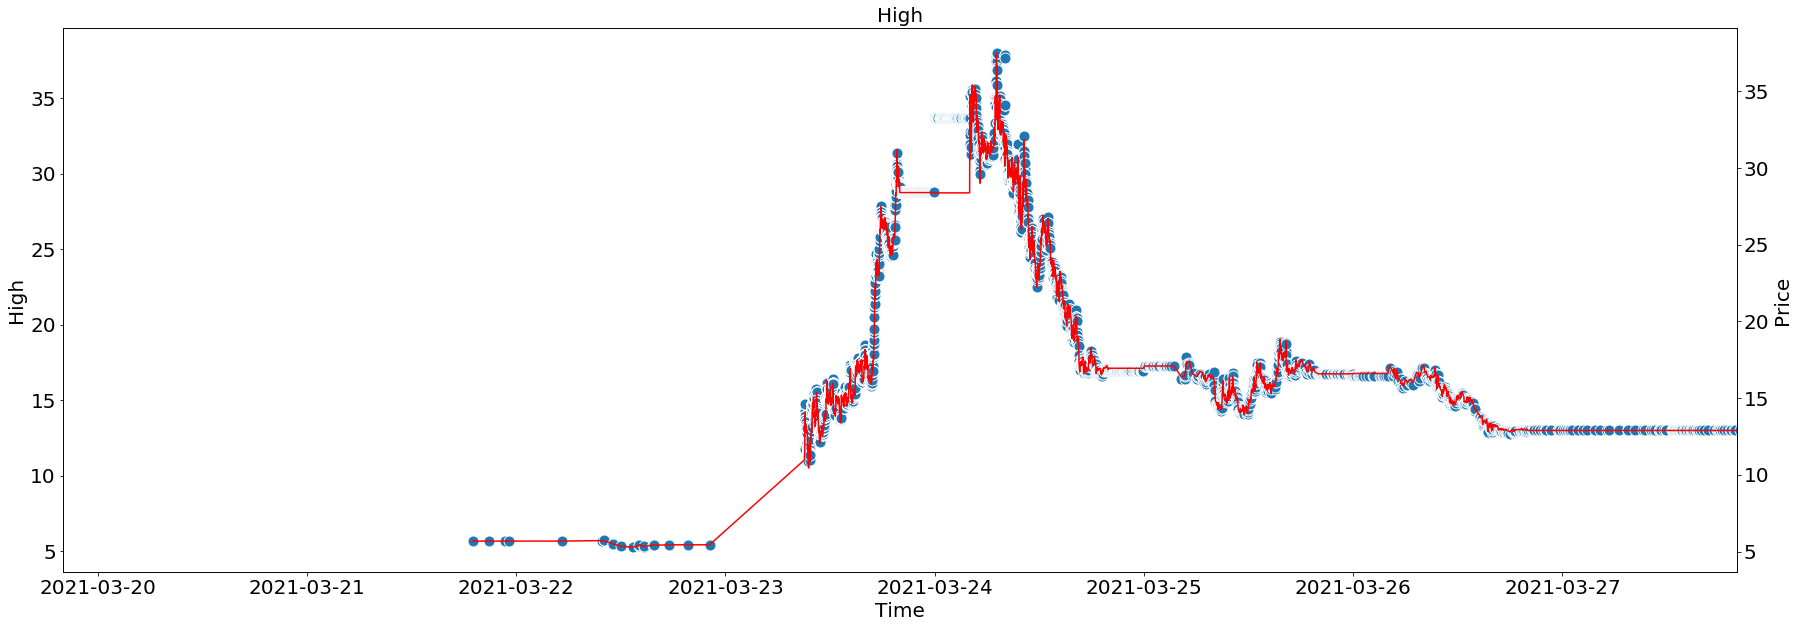

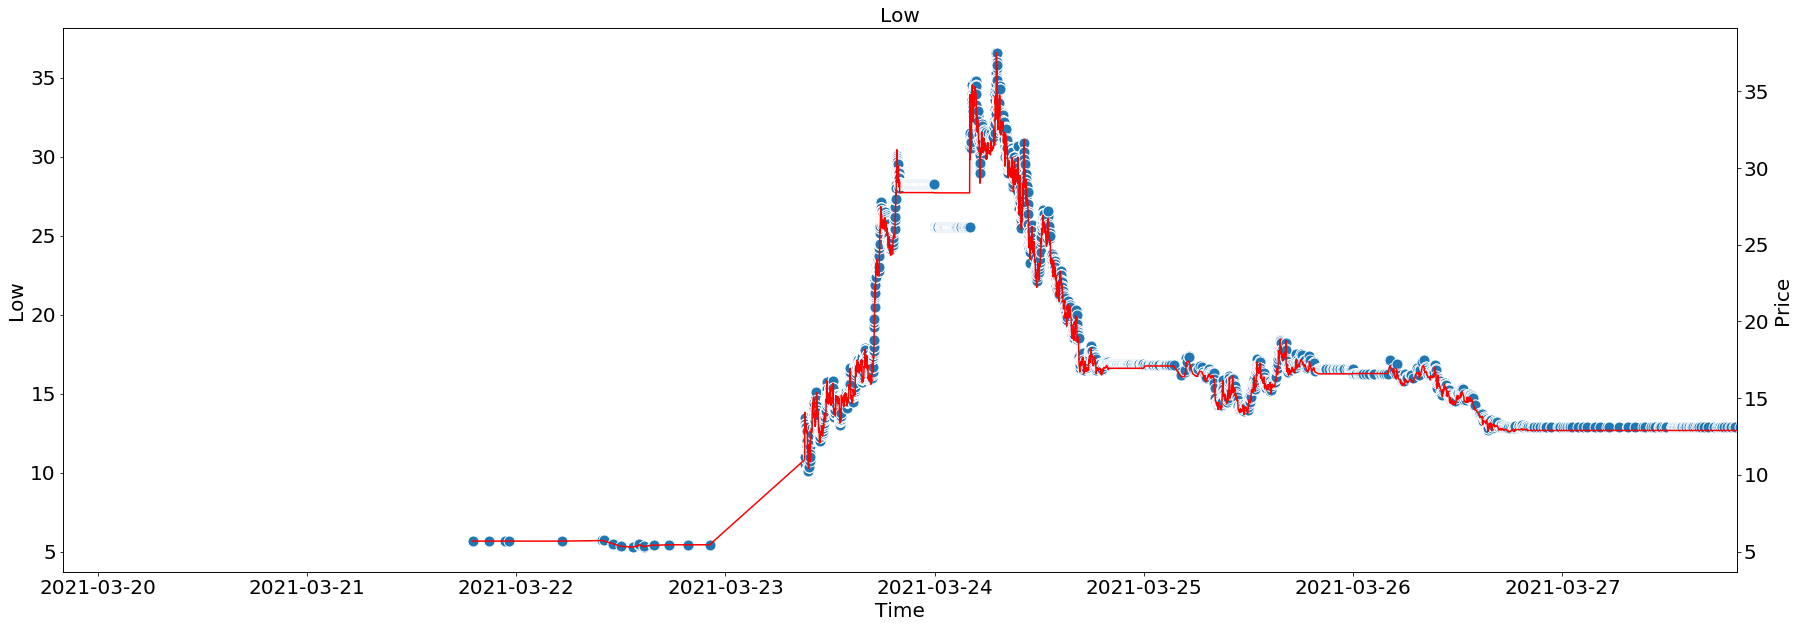

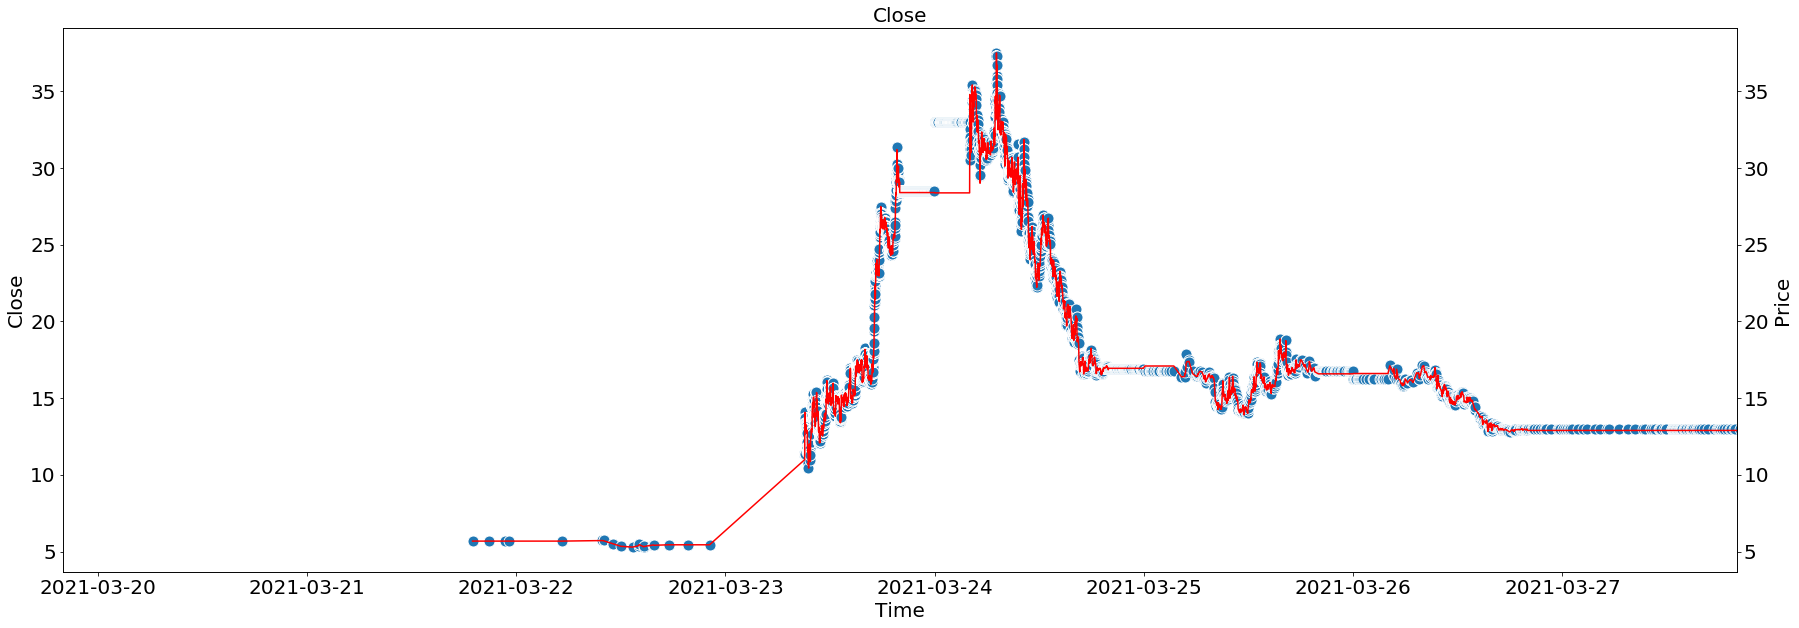

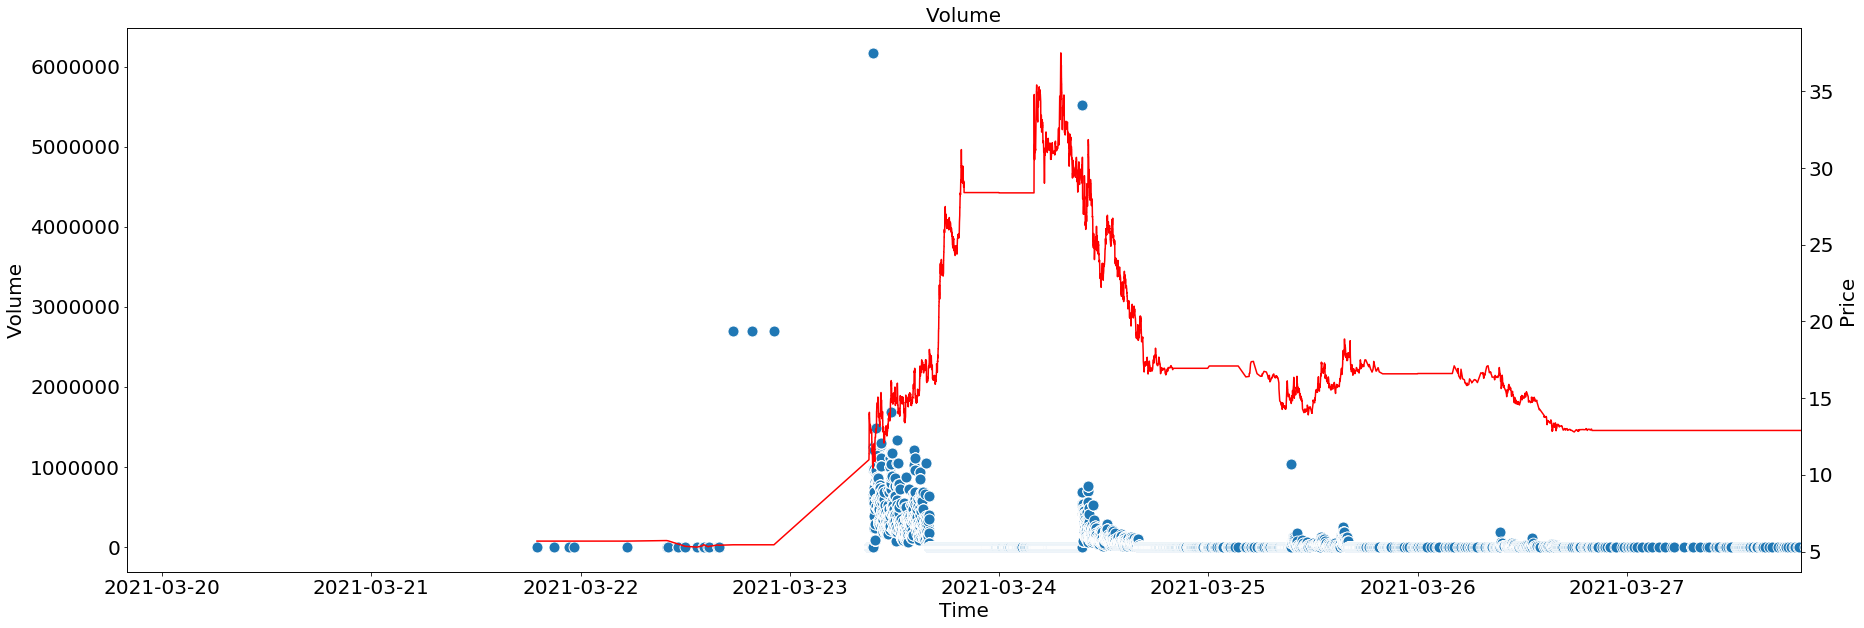

In [32]:
for col in twitter_stonks_num.columns:
    plot_vs_price(twitter_stonks, col, '2021-03-20', '2021-03-28')

In [43]:
twitter_stonks[twitter_stonks['user.followers_count'] > 200000][['user.name', 'Datetime','text']]

user.name                  Datetime  \
32          PJ Matlock 2021-03-23 09:04:04-04:00   
306   The Stock Sniper 2021-03-23 09:29:42-04:00   
344   The Stock Sniper 2021-03-23 09:37:07-04:00   
398         PJ Matlock 2021-03-23 09:48:23-04:00   
493         PJ Matlock 2021-03-23 09:59:54-04:00   
615   The Stock Sniper 2021-03-23 10:08:24-04:00   
774         PJ Matlock 2021-03-23 10:26:54-04:00   
798       Jon Najarian 2021-03-23 10:30:58-04:00   
830         PJ Matlock 2021-03-23 10:33:23-04:00   
1126  The Stock Sniper 2021-03-23 11:34:34-04:00   
1237        PJ Matlock 2021-03-23 11:46:31-04:00   
1329         TheStreet 2021-03-23 12:01:42-04:00   
1544     Timothy Sykes 2021-03-23 12:42:05-04:00   
1610     Timothy Sykes 2021-03-23 12:59:13-04:00   
1874        PJ Matlock 2021-03-23 13:41:25-04:00   
2031        PJ Matlock 2021-03-23 14:14:41-04:00   
2332        PJ Matlock 2021-03-23 15:05:43-04:00   
2550        PJ Matlock 2021-03-23 15:59:44-04:00   
2605  The Stock Sniper 2021-03-23 16:05:26-04:00   
2778  The Stock Sniper 2021-03-23 16:51:37-04:00   
2807        PJ Matlock 2021-03-23 16:55:12-04:00   
2869        PJ Matlock 2021-03-23 16:58:58-04:00   
2918        PJ Matlock 2021-03-23 17:02:39-04:00   
2947  The Stock Sniper 2021-03-23 17:04:06-04:00   
3015        PJ Matlock 2021-03-23 17:07:58-04:00   
3039  The Stock Sniper 2021-03-23 17:09:01-04:00   
3191  The Stock Sniper 2021-03-23 17:16:03-04:00   
3243     Timothy Sykes 2021-03-23 17:19:00-04:00   
3324        PJ Matlock 2021-03-23 17:26:05-04:00   
3467  The Stock Sniper 2021-03-23 17:43:56-04:00   
4244  The Stock Sniper 2021-03-23 19:56:10-04:00   
5002     Timothy Sykes 2021-03-24 01:02:02-04:00   
5152  The Stock Sniper 2021-03-24 04:19:02-04:00   
5627         TheStreet 2021-03-24 07:44:47-04:00   
5631         TheStreet 2021-03-24 07:46:05-04:00   
5974      Jon Najarian 2021-03-24 09:03:58-04:00   
6399         TheStreet 2021-03-24 10:02:41-04:00   
6570     Timothy Sykes 2021-03-24 10:37:15-04:00   
6588        PJ Matlock 2021-03-24 10:42:05-04:00   
7345     Timothy Sykes 2021-03-24 16:01:37-04:00   
7438     Timothy Sykes 2021-03-24 16:57:00-04:00   
7466  The Stock Sniper 2021-03-24 17:14:54-04:00   
7475  The Stock Sniper 2021-03-24 17:18:22-04:00   
7662     Timothy Sykes 2021-03-24 20:43:14-04:00   
9793     Timothy Sykes 2021-03-29 17:22:03-04:00   

                                                                                                                                                       text  
32              $DLPN Dolphin Entertainment Launches Non-Fungible Tokens (NFTs)  Creation and Marketing Division; Expects First Partnership in Collectibles  
306                                                                                                                                         $DLPN NAILED IT  
344                                                                 Who held $DLPN !?! Over 100% ripper sold a few chunks premarket https://t.co/5ICXX16Ak5  
398                                                                                                          $DLPN halted up. Worth watching on the unhalt.  
493                                                                                                                                      $DLPN halted 14.76  
615                                                                                                                                         $DLPN NEW HIGHS  
774                                                                                                                             $DLPN new high of day here.  
798   RT @MarketRebels: Early volume leaders\n\n$SNDL 55m\n$YVR 53m\n$HOTH 35m\n$BNTC 33m\n$ZOM 33m\n$DLPN 30m\n$HOFV 24m\n$SNMP 18m\n$GNUS 18m\n$AMC 16...  
830          $AESE news this morning, same sector as $DLPN \n\nAllied Esports Teams Up with Xsens for World’s First Professional E… https://t.co/xzpXy7QCEJ  
1126            $JAKK Next logical NFT p

In [45]:
twitter_stonks[twitter_stonks['user.favourites_count'] > 200000][['user.name', 'Datetime','text']]

user.name                  Datetime  \
288          Jeffrey A. Williams 2021-03-23 09:28:06-04:00   
742         David Jr Stock Forte 2021-03-23 10:25:10-04:00   
1492         Jeffrey A. Williams 2021-03-23 12:27:24-04:00   
1848             Time=Best Stock 2021-03-23 13:35:37-04:00   
2896                          JC 2021-03-23 17:01:04-04:00   
3363         😷HEDG€FUND📈$TRAT£G¥ 2021-03-23 17:29:11-04:00   
3827  Jacaré que Não virou Bolsa 2021-03-23 18:31:38-04:00   
4348                   Beef Ent. 2021-03-23 20:05:21-04:00   
4350                   Beef Ent. 2021-03-23 20:05:30-04:00   
4533                    αεΣ tomo 2021-03-23 20:48:43-04:00   
6050         😷HEDG€FUND📈$TRAT£G¥ 2021-03-24 09:16:02-04:00   
7175         😷HEDG€FUND📈$TRAT£G¥ 2021-03-24 14:14:12-04:00   
7368                   Beef Ent. 2021-03-24 16:10:31-04:00   
7591             Time=Best Stock 2021-03-24 18:47:57-04:00   
7592             Time=Best Stock 2021-03-24 18:48:06-04:00   
7595             Time=Best Stock 2021-03-24 18:49:01-04:00   
7596             Time=Best Stock 2021-03-24 18:49:05-04:00   
9080                   Beef Ent. 2021-03-28 00:42:44-04:00   
9590                   Beef Ent. 2021-03-29 11:50:44-04:00   
9688                   Beef Ent. 2021-03-29 13:55:05-04:00   

                                                                                                                                                       text  
288            $DLPN - up huge now pre-market +113.21% @ $11.67.  In @ $5.45 at close yesterday.  So selling now bid $12.25.  See:… https://t.co/l2NSFmzzM8  
742                                                                                       $DLPN here comes tons of NFT division creations.\n\nTake care.  🤣  
1492           @ProfitTradeRoom Bought $DLPN and sold it quick for a nice big profit.  Re-bought $TKAT again today and got in low.… https://t.co/1VBeyyDiJV  
1848                       RT @Super1NYC: Top % Gainers: $DLPN 173%, $BNTC $YVR $TKAT $SNMP $GNUS $CIDM $LIVX $HOTH $GRNQ $CJJD $ZM https://t.co/pfHP9xHIRm  
2896           RT @StocksToTrade: Another amazing call from the @SmallCapRockets by @mono_trader on $DLPN! Want to learn how he does it in real-time?! Com…  
3363    RT @CaptSolutions: Here are stocks trending in conversation across top traders on FinTwit:\n\n1. $TSLA\n2. $AZN\n3. $GME\n4. $DLPN\n5. $TKAT\n6. $…  
3827                                                       RT @FabricioCarlet1: $DLPN 236% de alta\n\n36% no after\n\nQue loucura.. https://t.co/IakWd2pDlK  
4348                                                                                               RT @anyatrades: $DLPN still moving already up +210% 👌🏼😎🔥  
4350                                                                           RT @TheLioncom: $DLPN $HOFV the other #NFT runners the sector is red hot. ⚠️  
4533                                                                                               RT @ripster47: $DLPN #update 🚀💸💰 https://t.co/VWnJyAZ4Md  
6050  RT @MarketRebels: Premarket movers\n\n$HOFV +73.7%\n$DLPN +63.0%\n$ALYA +43.6%\n$APTO +40.6%\n$ZKIN +26.6%\n$LIVX +17.7%\n$PLBY +14.5%\n$FREQ +13.8%…  
7175    RT @CaptSolutions: Stocks trending in conversation across FinTwit since yesterday's AH:\n\n1. $TSLA\n2. $HOFV\n3. $AZN\n4. $PTON\n5. $GME\n6. $DLP…  
7368                                                                                             RT @StocksThatGo: Top watches: $HOFV $DLPN $CSCW $ODT $RLX  
7591           RT @Super1NYC: Top % Gainers: $HPR 118%, $WKEY 82%, $APTO $CSCW $HOFV $FENG $PIXY $GIGM $ONCY $DLPN $CIDM $FNKO $AMAT https://t.co/PdVwEesj…  
7592                            RT @Super1NYC: Top % Gainers: $APTO 81%, $HOFV 77%, $DLPN $CSCW $CIDM $AUVI $BBIG $ALYA $GNUS $ZKIN https://t.co/q1NDxQn4Qn  
7595              RT @Super1NYC: #Premarket  Top % Gainers:\n\n$HOFV 80%, $DLPN $APTO $ALYA $ZKIN $CSCW $CIDM $AUVI $BCLI $SOS $CAN $UGRO $FREQ $RIOT $MARA  
7596           RT @Super1NYC: #Pre

# Test approach on another stock

In [ ]:
start_date = dt.date(year=2021, month=3, day=21)
end_date = dt.date(year=2021, month=3, day=28)

In [ ]:
XXXX_df = twitter_data.generate_df(['DPLN'], start_date, None)